In [1]:
# Generative Adversarial Networks: generate MNIST handwritten digit images
# Shomik Jain, USC CAIS++

In [2]:
# Generative Models: capable of generating images that look more or less like real photos
# give model unlabeled images
# model learns to create new images that look like they could belong in dataset

In [3]:
# General Adversarial Networks (GANs): 2 separate networks
# generative model: generates new images
# discriminator (classifier): judges the images to see how well they match training set
# two networks trained simultaneously
    # "generator tries to fool discriminator, discriminator tries not to get fooled"

In [4]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
# 1. Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# Portion of dataset to work with
# x_train = x_train[:10000]
# y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

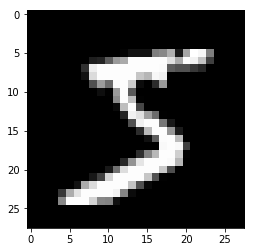

In [6]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
# 2. Define the Generator: generates new images 

# Noise dimensions our generator should take in
NOISE_DIM = 100 

def generator():
    model = Sequential()
    
    # Fully connected (Dense) from # noise dimensions to 256
    model.add(Dense(256, input_dim=NOISE_DIM, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())  # LeakyReLU

    # Fully connected from 256 to 512
    model.add(Dense(units=512))
    model.add(LeakyReLU())

    # Fully connected from 512 to 1024
    model.add(Dense(units=1024)) 
    model.add(LeakyReLU())

    # Fully connected from 1024 to 784 (28*28)
    model.add(Dense(units=784))
    # tanh (To normalize our output from -1 to 1)
    model.add(Activation('tanh'))
    
    return model

In [8]:
# 3. Define the Discriminator: judges(classifies) generated images

def discriminator():
    model = Sequential()
    
    # Fully connected (Dense) from 784 (28*28) to 1024
    model.add(Dense(1024, input_shape=(784,), kernel_initializer=initializers.RandomNormal(stddev=0.02)))    
    model.add(LeakyReLU())  # LeakyReLU
    model.add(Dropout(0.3)) # Dropout with p = 0.3

    # Fully connected from 1024 to 512
    model.add(Dense(units=512)) 
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    # Fully connected from 512 to 256
    model.add(Dense(units=256))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    # Fully connected from 256 to 1
    model.add(Dense(units=1)) 
    # sigmoid (to get our probability)
    model.add(Activation('sigmoid'))

    return model

In [9]:
# 4. Feed generated image into discriminator
# use to train generator end-to-end later on while leaving dicriminator weights untouched

# Notes: 
# adding existing Sequential() models to new models: parameters passed by reference, same weights used
# freeze layers to be untrainable
    # https://keras.io/getting-started/faq/#how-can-i-freeze-keras-layers

def combine(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)        
    return model

In [10]:
# 5. Compile the discriminator, generator, and full GAN. 

# Define Optimator and Loss 
optimizer = Adam(lr=0.0002, beta_1=0.5)
loss = 'binary_crossentropy'

# Discriminator
d = discriminator()
d.compile(loss=loss, optimizer=optimizer)

# Generator
g = generator()
g.compile(loss=loss, optimizer=optimizer)

# Full gan
gd = combine(g, d)
gd.compile(loss=loss, optimizer=optimizer)

In [11]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


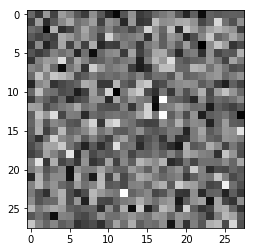

Number batches 468
0(0/468) D: 0.7765, G: 0.6899
0(1/468) D: 0.4187, G: 0.6780
0(2/468) D: 0.3795, G: 0.6609
0(3/468) D: 0.3833, G: 0.6422
0(4/468) D: 0.3978, G: 0.6221
0(5/468) D: 0.4135, G: 0.6071
0(6/468) D: 0.4301, G: 0.5975
0(7/468) D: 0.4361, G: 0.5993
0(8/468) D: 0.4363, G: 0.6209
0(9/468) D: 0.4280, G: 0.6573
0(10/468) D: 0.4141, G: 0.7062
0(11/468) D: 0.4003, G: 0.7536
0(12/468) D: 0.3924, G: 0.7655
0(13/468) D: 0.3938, G: 0.8040
0(14/468) D: 0.4022, G: 0.8065
0(15/468) D: 0.4072, G: 0.8388
0(16/468) D: 0.4202, G: 0.8041
0(17/468) D: 0.4356, G: 0.8106
0(18/468) D: 0.4425, G: 0.7735
0(19/468) D: 0.4394, G: 0.8518
0(20/468) D: 0.4256, G: 0.8266
0(21/468) D: 0.4078, G: 0.8946
0(22/468) D: 0.3862, G: 0.9148
0(23/468) D: 0.3778, G: 0.9421
0(24/468) D: 0.3815, G: 0.9337
0(25/468) D: 0.3968, G: 0.9732
0(26/468) D: 0.4283, G: 0.7962
0(27/468) D: 0.4676, G: 0.8542
0(28/468) D: 0.4660, G: 0.8254
0(29/468) D: 0.4343, G: 0.9351
0(30/468) D: 0.4027, G: 0.9327
0(31/468) D: 0.3709, G: 1.0237

0(259/468) D: 0.3037, G: 2.4883
0(260/468) D: 0.2292, G: 2.3924
0(261/468) D: 0.2166, G: 2.2674
0(262/468) D: 0.2870, G: 2.5559
0(263/468) D: 0.3247, G: 1.4185
0(264/468) D: 0.4642, G: 4.3543
0(265/468) D: 0.9836, G: 0.1774
0(266/468) D: 1.4066, G: 1.1080
0(267/468) D: 0.3175, G: 2.8898
0(268/468) D: 0.3024, G: 2.1305
0(269/468) D: 0.2214, G: 1.4935
0(270/468) D: 0.2804, G: 1.9256
0(271/468) D: 0.2464, G: 2.4431
0(272/468) D: 0.2532, G: 1.7799
0(273/468) D: 0.2655, G: 1.7159
0(274/468) D: 0.2855, G: 2.5080
0(275/468) D: 0.2611, G: 1.7906
0(276/468) D: 0.3029, G: 2.2230
0(277/468) D: 0.2576, G: 2.3441
0(278/468) D: 0.2782, G: 1.5580
0(279/468) D: 0.3810, G: 2.2084
0(280/468) D: 0.2694, G: 2.0601
0(281/468) D: 0.2427, G: 3.5158
0(282/468) D: 0.3242, G: 0.7954
0(283/468) D: 0.8520, G: 3.2667
0(284/468) D: 0.4803, G: 1.6427
0(285/468) D: 0.2877, G: 1.9614
0(286/468) D: 0.1765, G: 2.4160
0(287/468) D: 0.2350, G: 1.6580
0(288/468) D: 0.2422, G: 2.2215
0(289/468) D: 0.2104, G: 2.2914
0(290/46

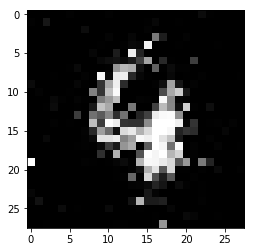

Number batches 468
1(0/468) D: 0.4305, G: 2.0620
1(1/468) D: 0.3376, G: 2.0561
1(2/468) D: 0.2828, G: 2.0174
1(3/468) D: 0.3708, G: 2.5182
1(4/468) D: 0.2943, G: 2.1063
1(5/468) D: 0.3605, G: 3.6689
1(6/468) D: 0.4750, G: 0.7057
1(7/468) D: 0.9116, G: 3.6578
1(8/468) D: 0.6794, G: 1.6127
1(9/468) D: 0.3011, G: 2.1894
1(10/468) D: 0.2265, G: 2.6163
1(11/468) D: 0.2749, G: 2.0255
1(12/468) D: 0.2692, G: 1.6806
1(13/468) D: 0.3052, G: 2.4991
1(14/468) D: 0.2865, G: 1.7277
1(15/468) D: 0.3052, G: 2.7651
1(16/468) D: 0.3377, G: 1.9307
1(17/468) D: 0.3226, G: 2.6673
1(18/468) D: 0.4847, G: 1.1264
1(19/468) D: 0.5980, G: 3.8764
1(20/468) D: 0.6542, G: 1.2913
1(21/468) D: 0.3739, G: 1.9108
1(22/468) D: 0.2631, G: 2.6348
1(23/468) D: 0.2758, G: 1.9691
1(24/468) D: 0.2606, G: 2.0432
1(25/468) D: 0.2579, G: 2.1710
1(26/468) D: 0.2217, G: 2.8217
1(27/468) D: 0.2415, G: 1.7947
1(28/468) D: 0.3144, G: 4.1389
1(29/468) D: 0.4715, G: 0.4759
1(30/468) D: 0.8626, G: 6.2457
1(31/468) D: 1.3743, G: 1.4291

1(259/468) D: 0.2420, G: 2.2177
1(260/468) D: 0.2825, G: 2.5244
1(261/468) D: 0.3226, G: 1.2523
1(262/468) D: 0.3811, G: 3.5763
1(263/468) D: 0.4879, G: 1.2801
1(264/468) D: 0.3670, G: 2.8292
1(265/468) D: 0.2742, G: 2.2264
1(266/468) D: 0.2053, G: 1.9750
1(267/468) D: 0.2614, G: 2.5650
1(268/468) D: 0.2355, G: 2.0681
1(269/468) D: 0.2869, G: 2.8609
1(270/468) D: 0.2266, G: 1.9890
1(271/468) D: 0.2813, G: 3.4664
1(272/468) D: 0.3108, G: 1.0939
1(273/468) D: 0.4903, G: 4.9480
1(274/468) D: 0.8540, G: 1.5767
1(275/468) D: 0.2830, G: 1.5624
1(276/468) D: 0.3354, G: 3.3034
1(277/468) D: 0.2460, G: 2.8466
1(278/468) D: 0.2173, G: 1.7583
1(279/468) D: 0.2664, G: 2.5636
1(280/468) D: 0.2489, G: 2.3310
1(281/468) D: 0.2020, G: 2.3053
1(282/468) D: 0.2351, G: 2.7586
1(283/468) D: 0.2461, G: 1.9332
1(284/468) D: 0.2449, G: 2.4584
1(285/468) D: 0.2730, G: 2.4405
1(286/468) D: 0.2542, G: 2.5012
1(287/468) D: 0.2524, G: 2.7477
1(288/468) D: 0.2628, G: 2.0522
1(289/468) D: 0.2961, G: 2.6487
1(290/46

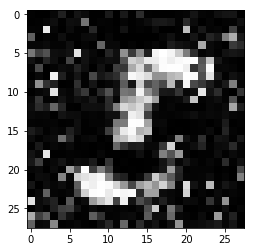

Number batches 468
2(0/468) D: 0.4492, G: 1.5070
2(1/468) D: 0.4023, G: 2.1459
2(2/468) D: 0.2466, G: 2.8797
2(3/468) D: 0.2484, G: 2.6092
2(4/468) D: 0.2377, G: 1.7933
2(5/468) D: 0.2244, G: 2.4888
2(6/468) D: 0.2060, G: 2.5055
2(7/468) D: 0.2605, G: 2.3311
2(8/468) D: 0.3285, G: 1.9762
2(9/468) D: 0.3150, G: 3.1900
2(10/468) D: 0.3469, G: 1.8132
2(11/468) D: 0.3328, G: 2.2595
2(12/468) D: 0.2887, G: 2.6528
2(13/468) D: 0.3338, G: 1.4996
2(14/468) D: 0.3671, G: 3.5053
2(15/468) D: 0.3218, G: 2.2691
2(16/468) D: 0.3157, G: 2.2807
2(17/468) D: 0.3058, G: 3.0881
2(18/468) D: 0.3227, G: 1.9545
2(19/468) D: 0.3287, G: 3.2210
2(20/468) D: 0.3115, G: 2.5046
2(21/468) D: 0.2733, G: 2.6727
2(22/468) D: 0.3075, G: 2.5775
2(23/468) D: 0.3598, G: 1.8115
2(24/468) D: 0.4447, G: 3.3812
2(25/468) D: 0.4707, G: 1.1672
2(26/468) D: 0.6360, G: 5.6498
2(27/468) D: 1.1833, G: 1.1655
2(28/468) D: 0.4841, G: 1.9780
2(29/468) D: 0.3207, G: 3.5213
2(30/468) D: 0.4283, G: 1.9078
2(31/468) D: 0.2724, G: 1.8706

2(259/468) D: 0.3073, G: 3.6052
2(260/468) D: 0.3549, G: 1.7371
2(261/468) D: 0.3546, G: 2.6222
2(262/468) D: 0.3852, G: 1.9280
2(263/468) D: 0.2749, G: 2.6411
2(264/468) D: 0.2733, G: 2.0142
2(265/468) D: 0.3934, G: 2.8425
2(266/468) D: 0.3824, G: 1.5681
2(267/468) D: 0.3647, G: 2.8002
2(268/468) D: 0.3665, G: 1.7102
2(269/468) D: 0.3568, G: 3.7037
2(270/468) D: 0.4783, G: 0.9966
2(271/468) D: 0.4867, G: 4.1513
2(272/468) D: 0.5604, G: 2.1388
2(273/468) D: 0.2926, G: 1.4363
2(274/468) D: 0.4286, G: 3.1534
2(275/468) D: 0.3852, G: 2.0058
2(276/468) D: 0.2596, G: 2.0026
2(277/468) D: 0.2767, G: 2.7437
2(278/468) D: 0.2991, G: 1.9555
2(279/468) D: 0.4003, G: 1.6825
2(280/468) D: 0.3725, G: 2.5788
2(281/468) D: 0.3830, G: 0.8211
2(282/468) D: 0.5044, G: 3.9732
2(283/468) D: 0.6213, G: 2.2143
2(284/468) D: 0.3760, G: 1.2796
2(285/468) D: 0.4294, G: 3.0447
2(286/468) D: 0.3572, G: 2.0886
2(287/468) D: 0.2935, G: 1.4956
2(288/468) D: 0.3952, G: 3.0545
2(289/468) D: 0.3554, G: 1.9742
2(290/46

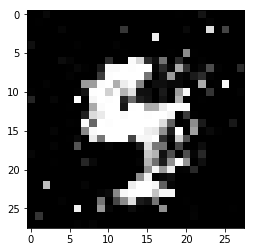

Number batches 468
3(0/468) D: 0.2520, G: 2.3621
3(1/468) D: 0.2652, G: 3.3123
3(2/468) D: 0.2573, G: 2.7702
3(3/468) D: 0.2330, G: 2.3023
3(4/468) D: 0.2476, G: 4.3307
3(5/468) D: 0.3319, G: 1.8354
3(6/468) D: 0.3325, G: 4.9053
3(7/468) D: 0.4444, G: 1.7934
3(8/468) D: 0.3387, G: 2.7798
3(9/468) D: 0.2644, G: 2.6900
3(10/468) D: 0.2321, G: 2.3223
3(11/468) D: 0.2708, G: 3.2368
3(12/468) D: 0.2792, G: 1.6455
3(13/468) D: 0.3979, G: 4.0708
3(14/468) D: 0.4375, G: 1.5665
3(15/468) D: 0.3849, G: 3.7867
3(16/468) D: 0.3853, G: 2.4678
3(17/468) D: 0.2527, G: 1.5544
3(18/468) D: 0.3337, G: 3.6925
3(19/468) D: 0.2920, G: 2.2945
3(20/468) D: 0.2307, G: 1.7628
3(21/468) D: 0.3328, G: 3.1514
3(22/468) D: 0.2997, G: 2.4394
3(23/468) D: 0.2776, G: 2.1290
3(24/468) D: 0.2747, G: 2.1846
3(25/468) D: 0.2748, G: 2.0279
3(26/468) D: 0.2997, G: 2.6771
3(27/468) D: 0.3588, G: 1.6134
3(28/468) D: 0.3370, G: 3.1959
3(29/468) D: 0.2974, G: 1.3610
3(30/468) D: 0.2836, G: 3.2092
3(31/468) D: 0.2022, G: 3.1475

3(259/468) D: 0.3795, G: 3.9173
3(260/468) D: 0.3551, G: 2.9543
3(261/468) D: 0.2800, G: 1.4349
3(262/468) D: 0.3495, G: 2.8150
3(263/468) D: 0.2491, G: 2.5220
3(264/468) D: 0.2836, G: 1.7537
3(265/468) D: 0.2680, G: 2.6059
3(266/468) D: 0.2350, G: 2.9732
3(267/468) D: 0.3157, G: 1.7339
3(268/468) D: 0.2639, G: 2.6203
3(269/468) D: 0.2166, G: 3.0495
3(270/468) D: 0.2614, G: 2.3349
3(271/468) D: 0.2481, G: 2.6137
3(272/468) D: 0.2676, G: 2.7755
3(273/468) D: 0.3097, G: 1.8525
3(274/468) D: 0.2286, G: 2.7692
3(275/468) D: 0.2489, G: 2.5256
3(276/468) D: 0.2102, G: 1.8538
3(277/468) D: 0.3052, G: 3.6786
3(278/468) D: 0.3200, G: 2.4631
3(279/468) D: 0.3276, G: 1.3988
3(280/468) D: 0.4468, G: 3.7296
3(281/468) D: 0.4468, G: 1.7506
3(282/468) D: 0.3129, G: 2.5314
3(283/468) D: 0.2904, G: 2.7590
3(284/468) D: 0.2895, G: 1.9367
3(285/468) D: 0.2885, G: 2.9382
3(286/468) D: 0.2381, G: 2.6852
3(287/468) D: 0.2190, G: 2.4650
3(288/468) D: 0.2848, G: 2.7177
3(289/468) D: 0.2453, G: 1.7716
3(290/46

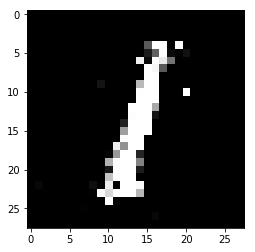

Number batches 468
4(0/468) D: 0.3154, G: 2.2544
4(1/468) D: 0.2799, G: 2.6383
4(2/468) D: 0.2751, G: 1.6374
4(3/468) D: 0.3095, G: 2.5843
4(4/468) D: 0.2382, G: 3.5600
4(5/468) D: 0.2209, G: 2.5717
4(6/468) D: 0.2414, G: 1.5608
4(7/468) D: 0.2830, G: 4.1598
4(8/468) D: 0.4238, G: 1.9491
4(9/468) D: 0.3317, G: 2.8493
4(10/468) D: 0.2062, G: 3.2550
4(11/468) D: 0.2590, G: 2.0708
4(12/468) D: 0.2255, G: 2.2261
4(13/468) D: 0.2864, G: 2.2712
4(14/468) D: 0.2607, G: 3.3234
4(15/468) D: 0.2764, G: 2.2749
4(16/468) D: 0.2443, G: 2.1520
4(17/468) D: 0.2215, G: 3.7722
4(18/468) D: 0.2310, G: 2.7185
4(19/468) D: 0.1950, G: 2.5854
4(20/468) D: 0.2077, G: 2.3474
4(21/468) D: 0.2053, G: 2.7784
4(22/468) D: 0.2295, G: 2.5020
4(23/468) D: 0.1466, G: 2.8818
4(24/468) D: 0.2392, G: 2.0958
4(25/468) D: 0.2509, G: 2.7839
4(26/468) D: 0.1954, G: 2.1854
4(27/468) D: 0.2628, G: 2.6467
4(28/468) D: 0.1901, G: 3.0976
4(29/468) D: 0.2105, G: 2.2133
4(30/468) D: 0.2225, G: 2.5471
4(31/468) D: 0.1672, G: 3.0385

4(260/468) D: 0.2375, G: 2.0492
4(261/468) D: 0.2505, G: 2.6552
4(262/468) D: 0.1770, G: 2.7597
4(263/468) D: 0.1804, G: 2.7633
4(264/468) D: 0.1952, G: 2.9387
4(265/468) D: 0.2270, G: 2.4550
4(266/468) D: 0.1995, G: 2.9087
4(267/468) D: 0.2210, G: 2.7454
4(268/468) D: 0.1919, G: 3.3059
4(269/468) D: 0.1852, G: 2.6206
4(270/468) D: 0.2639, G: 2.8802
4(271/468) D: 0.2209, G: 2.1460
4(272/468) D: 0.2908, G: 2.8798
4(273/468) D: 0.2301, G: 3.3512
4(274/468) D: 0.2054, G: 2.6679
4(275/468) D: 0.1940, G: 2.5462
4(276/468) D: 0.2393, G: 2.7402
4(277/468) D: 0.1894, G: 2.6531
4(278/468) D: 0.2222, G: 2.4055
4(279/468) D: 0.2581, G: 3.2693
4(280/468) D: 0.2696, G: 2.2032
4(281/468) D: 0.2619, G: 2.6862
4(282/468) D: 0.2374, G: 3.5656
4(283/468) D: 0.1921, G: 2.9250
4(284/468) D: 0.2672, G: 1.7793
4(285/468) D: 0.2868, G: 4.3810
4(286/468) D: 0.2457, G: 3.2069
4(287/468) D: 0.1716, G: 1.9634
4(288/468) D: 0.2028, G: 2.7669
4(289/468) D: 0.2239, G: 2.8420
4(290/468) D: 0.1937, G: 3.1459
4(291/46

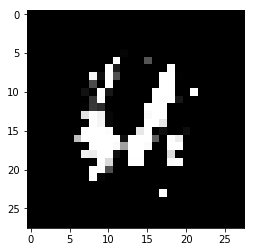

Number batches 468
5(0/468) D: 0.3220, G: 1.3787
5(1/468) D: 0.4095, G: 3.8025
5(2/468) D: 0.3241, G: 2.8705
5(3/468) D: 0.2852, G: 1.4310
5(4/468) D: 0.3491, G: 3.4855
5(5/468) D: 0.2772, G: 3.0632
5(6/468) D: 0.1936, G: 2.2601
5(7/468) D: 0.2459, G: 2.6722
5(8/468) D: 0.2711, G: 2.4295
5(9/468) D: 0.2380, G: 2.7332
5(10/468) D: 0.1706, G: 3.4186
5(11/468) D: 0.3725, G: 1.5573
5(12/468) D: 0.3643, G: 3.3630
5(13/468) D: 0.3456, G: 2.1329
5(14/468) D: 0.2074, G: 2.2546
5(15/468) D: 0.2325, G: 3.0078
5(16/468) D: 0.2808, G: 2.4149
5(17/468) D: 0.2258, G: 2.3714
5(18/468) D: 0.2456, G: 2.2170
5(19/468) D: 0.2754, G: 2.3546
5(20/468) D: 0.2482, G: 3.1299
5(21/468) D: 0.2590, G: 1.7220
5(22/468) D: 0.3058, G: 3.1646
5(23/468) D: 0.2629, G: 2.4268
5(24/468) D: 0.2444, G: 1.7476
5(25/468) D: 0.2740, G: 3.9196
5(26/468) D: 0.3888, G: 1.8325
5(27/468) D: 0.3078, G: 2.6996
5(28/468) D: 0.2800, G: 2.5475
5(29/468) D: 0.2463, G: 1.7406
5(30/468) D: 0.3190, G: 3.3962
5(31/468) D: 0.2652, G: 2.8550

5(260/468) D: 0.2331, G: 2.8279
5(261/468) D: 0.2694, G: 2.1380
5(262/468) D: 0.2746, G: 2.7783
5(263/468) D: 0.2528, G: 2.5146
5(264/468) D: 0.3072, G: 2.3784
5(265/468) D: 0.2789, G: 2.3087
5(266/468) D: 0.2474, G: 2.4094
5(267/468) D: 0.1896, G: 2.6257
5(268/468) D: 0.2440, G: 2.4924
5(269/468) D: 0.2169, G: 2.7802
5(270/468) D: 0.2566, G: 2.4745
5(271/468) D: 0.1947, G: 2.3206
5(272/468) D: 0.2139, G: 2.6986
5(273/468) D: 0.1729, G: 2.5072
5(274/468) D: 0.1557, G: 2.8072
5(275/468) D: 0.2551, G: 3.2308
5(276/468) D: 0.2210, G: 2.2986
5(277/468) D: 0.2113, G: 2.7012
5(278/468) D: 0.2208, G: 3.2315
5(279/468) D: 0.3551, G: 1.4317
5(280/468) D: 0.3545, G: 4.5954
5(281/468) D: 0.4831, G: 2.0524
5(282/468) D: 0.4040, G: 2.8802
5(283/468) D: 0.2644, G: 2.5931
5(284/468) D: 0.2532, G: 2.0431
5(285/468) D: 0.2179, G: 2.6123
5(286/468) D: 0.1905, G: 3.0468
5(287/468) D: 0.1915, G: 2.2453
5(288/468) D: 0.2224, G: 2.4495
5(289/468) D: 0.2840, G: 3.0489
5(290/468) D: 0.2192, G: 2.3506
5(291/46

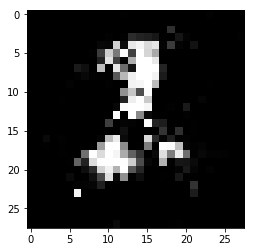

Number batches 468
6(0/468) D: 0.3251, G: 2.2686
6(1/468) D: 0.2172, G: 2.5545
6(2/468) D: 0.3077, G: 2.0351
6(3/468) D: 0.2686, G: 2.5062
6(4/468) D: 0.2571, G: 2.3892
6(5/468) D: 0.2846, G: 2.9096
6(6/468) D: 0.1927, G: 2.7619
6(7/468) D: 0.2261, G: 1.8228
6(8/468) D: 0.3110, G: 2.9358
6(9/468) D: 0.2491, G: 2.5223
6(10/468) D: 0.1773, G: 2.9934
6(11/468) D: 0.3365, G: 1.2268
6(12/468) D: 0.3383, G: 4.1894
6(13/468) D: 0.4438, G: 2.5544
6(14/468) D: 0.2609, G: 1.4574
6(15/468) D: 0.3753, G: 3.4713
6(16/468) D: 0.2427, G: 3.3284
6(17/468) D: 0.1826, G: 2.2277
6(18/468) D: 0.2455, G: 2.4724
6(19/468) D: 0.2056, G: 2.5400
6(20/468) D: 0.2209, G: 2.4397
6(21/468) D: 0.2323, G: 2.2963
6(22/468) D: 0.2108, G: 2.3418
6(23/468) D: 0.1859, G: 2.6617
6(24/468) D: 0.2017, G: 2.8713
6(25/468) D: 0.2094, G: 2.6084
6(26/468) D: 0.2059, G: 1.7730
6(27/468) D: 0.2719, G: 4.0360
6(28/468) D: 0.2116, G: 2.9995
6(29/468) D: 0.1902, G: 1.8646
6(30/468) D: 0.2519, G: 3.8535
6(31/468) D: 0.3223, G: 2.1540

6(259/468) D: 0.2231, G: 3.0549
6(260/468) D: 0.2380, G: 2.4194
6(261/468) D: 0.2243, G: 1.9728
6(262/468) D: 0.2525, G: 2.6457
6(263/468) D: 0.2553, G: 3.5858
6(264/468) D: 0.3187, G: 1.9312
6(265/468) D: 0.2620, G: 2.4905
6(266/468) D: 0.2078, G: 2.6497
6(267/468) D: 0.2666, G: 1.7344
6(268/468) D: 0.2427, G: 2.7653
6(269/468) D: 0.1711, G: 3.6671
6(270/468) D: 0.3391, G: 2.0198
6(271/468) D: 0.2565, G: 3.0594
6(272/468) D: 0.2844, G: 2.3213
6(273/468) D: 0.1702, G: 2.1195
6(274/468) D: 0.1957, G: 3.0793
6(275/468) D: 0.2134, G: 2.7069
6(276/468) D: 0.2467, G: 2.2574
6(277/468) D: 0.2390, G: 2.9582
6(278/468) D: 0.1827, G: 3.0874
6(279/468) D: 0.3056, G: 1.8403
6(280/468) D: 0.2346, G: 2.1877
6(281/468) D: 0.2407, G: 2.5770
6(282/468) D: 0.2635, G: 2.2480
6(283/468) D: 0.2119, G: 2.6178
6(284/468) D: 0.2583, G: 2.0891
6(285/468) D: 0.2719, G: 2.8072
6(286/468) D: 0.2448, G: 2.3777
6(287/468) D: 0.1839, G: 2.4643
6(288/468) D: 0.2558, G: 2.5618
6(289/468) D: 0.3043, G: 1.6923
6(290/46

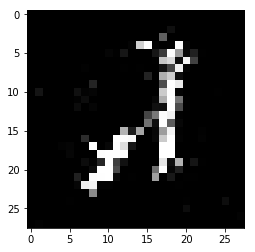

Number batches 468
7(0/468) D: 0.3846, G: 1.0033
7(1/468) D: 0.4451, G: 3.4924
7(2/468) D: 0.3679, G: 3.2982
7(3/468) D: 0.3942, G: 1.5083
7(4/468) D: 0.4727, G: 2.9937
7(5/468) D: 0.2596, G: 2.6686
7(6/468) D: 0.2133, G: 1.9452
7(7/468) D: 0.2338, G: 2.1622
7(8/468) D: 0.2207, G: 2.2656
7(9/468) D: 0.2714, G: 2.0709
7(10/468) D: 0.2330, G: 2.8901
7(11/468) D: 0.2480, G: 2.5602
7(12/468) D: 0.2361, G: 1.9759
7(13/468) D: 0.2772, G: 2.3406
7(14/468) D: 0.2178, G: 2.3299
7(15/468) D: 0.2273, G: 2.5126
7(16/468) D: 0.2706, G: 2.3053
7(17/468) D: 0.2150, G: 2.8617
7(18/468) D: 0.2503, G: 2.3870
7(19/468) D: 0.1813, G: 2.6698
7(20/468) D: 0.2555, G: 2.4043
7(21/468) D: 0.2957, G: 2.2763
7(22/468) D: 0.3368, G: 2.9659
7(23/468) D: 0.2700, G: 2.2813
7(24/468) D: 0.2172, G: 2.3084
7(25/468) D: 0.2526, G: 2.3653
7(26/468) D: 0.2488, G: 2.5939
7(27/468) D: 0.2493, G: 1.8128
7(28/468) D: 0.2954, G: 3.6639
7(29/468) D: 0.3964, G: 1.8921
7(30/468) D: 0.3218, G: 2.5251
7(31/468) D: 0.2782, G: 2.4910

7(259/468) D: 0.2506, G: 2.2283
7(260/468) D: 0.2824, G: 2.4581
7(261/468) D: 0.3133, G: 2.2850
7(262/468) D: 0.2789, G: 1.8254
7(263/468) D: 0.3323, G: 3.2565
7(264/468) D: 0.3629, G: 2.2832
7(265/468) D: 0.3609, G: 1.5874
7(266/468) D: 0.3289, G: 3.7681
7(267/468) D: 0.4051, G: 1.8171
7(268/468) D: 0.3262, G: 2.1048
7(269/468) D: 0.2498, G: 3.0633
7(270/468) D: 0.3360, G: 1.9361
7(271/468) D: 0.2626, G: 1.9318
7(272/468) D: 0.2694, G: 2.4471
7(273/468) D: 0.2596, G: 2.1374
7(274/468) D: 0.2547, G: 2.6009
7(275/468) D: 0.2707, G: 2.6005
7(276/468) D: 0.2501, G: 2.3186
7(277/468) D: 0.2087, G: 2.8601
7(278/468) D: 0.3032, G: 2.2597
7(279/468) D: 0.3536, G: 1.9039
7(280/468) D: 0.2616, G: 2.6718
7(281/468) D: 0.2823, G: 1.7723
7(282/468) D: 0.3428, G: 2.9557
7(283/468) D: 0.2932, G: 2.8647
7(284/468) D: 0.3264, G: 1.6025
7(285/468) D: 0.3676, G: 3.6245
7(286/468) D: 0.4038, G: 1.8745
7(287/468) D: 0.3629, G: 2.7379
7(288/468) D: 0.3202, G: 2.4779
7(289/468) D: 0.3444, G: 1.7273
7(290/46

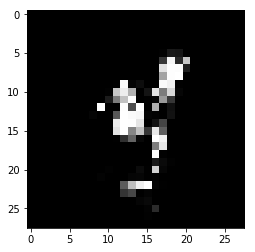

Number batches 468
8(0/468) D: 0.2821, G: 2.6096
8(1/468) D: 0.2721, G: 2.5236
8(2/468) D: 0.3014, G: 1.7752
8(3/468) D: 0.3110, G: 2.6987
8(4/468) D: 0.2565, G: 2.7734
8(5/468) D: 0.2125, G: 2.4940
8(6/468) D: 0.2123, G: 2.7351
8(7/468) D: 0.2149, G: 2.5304
8(8/468) D: 0.3315, G: 2.0452
8(9/468) D: 0.3216, G: 2.9450
8(10/468) D: 0.2597, G: 2.0988
8(11/468) D: 0.2760, G: 2.0957
8(12/468) D: 0.2984, G: 2.7678
8(13/468) D: 0.3416, G: 2.2098
8(14/468) D: 0.2594, G: 2.3904
8(15/468) D: 0.3069, G: 2.2721
8(16/468) D: 0.2750, G: 2.4688
8(17/468) D: 0.2082, G: 2.8534
8(18/468) D: 0.3204, G: 1.8246
8(19/468) D: 0.2568, G: 2.4986
8(20/468) D: 0.2687, G: 2.6482
8(21/468) D: 0.2664, G: 2.1822
8(22/468) D: 0.3083, G: 1.9283
8(23/468) D: 0.3358, G: 2.3495
8(24/468) D: 0.3409, G: 2.3165
8(25/468) D: 0.2923, G: 1.4398
8(26/468) D: 0.4399, G: 3.1325
8(27/468) D: 0.3802, G: 1.6846
8(28/468) D: 0.2916, G: 2.7196
8(29/468) D: 0.2712, G: 2.4465
8(30/468) D: 0.2976, G: 1.8688
8(31/468) D: 0.2637, G: 2.5981

8(259/468) D: 0.3249, G: 3.0526
8(260/468) D: 0.2769, G: 2.1421
8(261/468) D: 0.2672, G: 2.3495
8(262/468) D: 0.2796, G: 2.0761
8(263/468) D: 0.3168, G: 2.0658
8(264/468) D: 0.2829, G: 2.6120
8(265/468) D: 0.3489, G: 1.6049
8(266/468) D: 0.3938, G: 3.6276
8(267/468) D: 0.4225, G: 1.6011
8(268/468) D: 0.3500, G: 2.4922
8(269/468) D: 0.2554, G: 2.3987
8(270/468) D: 0.2888, G: 1.7839
8(271/468) D: 0.2925, G: 2.6115
8(272/468) D: 0.3273, G: 2.1021
8(273/468) D: 0.3253, G: 1.7611
8(274/468) D: 0.2536, G: 2.4212
8(275/468) D: 0.2644, G: 2.2552
8(276/468) D: 0.2393, G: 1.7498
8(277/468) D: 0.2952, G: 3.2598
8(278/468) D: 0.3207, G: 2.1184
8(279/468) D: 0.3566, G: 1.5003
8(280/468) D: 0.3608, G: 3.4282
8(281/468) D: 0.3804, G: 1.6880
8(282/468) D: 0.3267, G: 2.6536
8(283/468) D: 0.2569, G: 2.4271
8(284/468) D: 0.3334, G: 1.8273
8(285/468) D: 0.3137, G: 2.3115
8(286/468) D: 0.2159, G: 2.7595
8(287/468) D: 0.2846, G: 1.8695
8(288/468) D: 0.3404, G: 2.3788
8(289/468) D: 0.3050, G: 2.8414
8(290/46

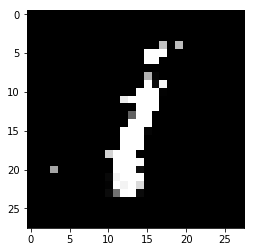

Number batches 468
9(0/468) D: 0.3028, G: 2.1635
9(1/468) D: 0.3621, G: 2.9839
9(2/468) D: 0.3706, G: 1.2840
9(3/468) D: 0.3819, G: 3.1752
9(4/468) D: 0.4305, G: 1.6516
9(5/468) D: 0.3086, G: 2.2201
9(6/468) D: 0.2299, G: 2.6529
9(7/468) D: 0.2875, G: 1.8864
9(8/468) D: 0.3463, G: 2.5300
9(9/468) D: 0.3767, G: 1.8525
9(10/468) D: 0.3332, G: 3.1771
9(11/468) D: 0.3439, G: 1.7910
9(12/468) D: 0.3820, G: 1.9110
9(13/468) D: 0.3427, G: 2.3047
9(14/468) D: 0.2948, G: 2.1435
9(15/468) D: 0.3213, G: 2.0370
9(16/468) D: 0.2843, G: 2.1793
9(17/468) D: 0.2534, G: 2.5765
9(18/468) D: 0.3076, G: 1.9572
9(19/468) D: 0.2659, G: 2.2844
9(20/468) D: 0.2484, G: 2.5006
9(21/468) D: 0.2677, G: 2.0280
9(22/468) D: 0.2868, G: 2.1280
9(23/468) D: 0.2615, G: 2.2609
9(24/468) D: 0.3266, G: 1.8712
9(25/468) D: 0.3168, G: 2.0788
9(26/468) D: 0.4195, G: 2.4330
9(27/468) D: 0.4173, G: 1.5360
9(28/468) D: 0.3584, G: 2.9350
9(29/468) D: 0.3669, G: 1.9375
9(30/468) D: 0.3513, G: 1.9185
9(31/468) D: 0.3275, G: 2.7129

9(260/468) D: 0.4190, G: 2.5029
9(261/468) D: 0.4945, G: 1.8239
9(262/468) D: 0.3501, G: 2.7508
9(263/468) D: 0.4191, G: 1.9035
9(264/468) D: 0.3472, G: 2.1356
9(265/468) D: 0.2860, G: 1.9210
9(266/468) D: 0.3307, G: 2.1346
9(267/468) D: 0.3069, G: 2.3112
9(268/468) D: 0.3117, G: 1.9610
9(269/468) D: 0.3058, G: 2.2801
9(270/468) D: 0.3461, G: 2.2684
9(271/468) D: 0.3712, G: 1.5258
9(272/468) D: 0.3685, G: 2.9085
9(273/468) D: 0.3697, G: 1.8014
9(274/468) D: 0.3095, G: 2.4448
9(275/468) D: 0.3825, G: 2.1571
9(276/468) D: 0.3317, G: 2.1455
9(277/468) D: 0.3061, G: 2.3276
9(278/468) D: 0.2954, G: 2.0587
9(279/468) D: 0.3265, G: 2.6085
9(280/468) D: 0.2806, G: 1.7360
9(281/468) D: 0.3411, G: 2.5294
9(282/468) D: 0.2382, G: 2.9519
9(283/468) D: 0.2740, G: 2.0315
9(284/468) D: 0.3065, G: 2.7533
9(285/468) D: 0.3394, G: 1.6370
9(286/468) D: 0.3324, G: 3.5583
9(287/468) D: 0.3661, G: 2.5796
9(288/468) D: 0.3457, G: 1.7489
9(289/468) D: 0.5306, G: 3.5296
9(290/468) D: 0.3701, G: 1.4017
9(291/46

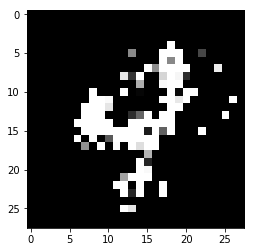

Number batches 468
10(0/468) D: 0.4352, G: 2.2257
10(1/468) D: 0.3909, G: 1.6103
10(2/468) D: 0.4153, G: 2.8672
10(3/468) D: 0.3921, G: 1.7148
10(4/468) D: 0.3288, G: 2.1345
10(5/468) D: 0.3489, G: 2.2923
10(6/468) D: 0.3015, G: 2.2215
10(7/468) D: 0.3811, G: 3.0097
10(8/468) D: 0.4415, G: 0.9518
10(9/468) D: 0.6408, G: 3.5656
10(10/468) D: 0.6875, G: 1.2256
10(11/468) D: 0.4387, G: 1.7233
10(12/468) D: 0.2920, G: 2.4005
10(13/468) D: 0.3402, G: 1.5947
10(14/468) D: 0.3056, G: 2.0987
10(15/468) D: 0.3413, G: 2.2493
10(16/468) D: 0.3112, G: 1.9387
10(17/468) D: 0.2716, G: 2.2615
10(18/468) D: 0.3007, G: 1.8613
10(19/468) D: 0.2968, G: 2.1846
10(20/468) D: 0.2575, G: 2.2056
10(21/468) D: 0.3450, G: 1.8373
10(22/468) D: 0.2902, G: 1.9010
10(23/468) D: 0.2923, G: 2.0575
10(24/468) D: 0.2877, G: 1.7704
10(25/468) D: 0.3568, G: 1.9443
10(26/468) D: 0.3578, G: 2.2603
10(27/468) D: 0.2949, G: 1.9355
10(28/468) D: 0.2930, G: 2.3561
10(29/468) D: 0.3218, G: 1.8829
10(30/468) D: 0.3102, G: 2.0032

10(252/468) D: 0.3305, G: 2.3224
10(253/468) D: 0.2589, G: 2.1268
10(254/468) D: 0.3088, G: 2.0853
10(255/468) D: 0.3302, G: 2.0465
10(256/468) D: 0.2949, G: 2.2434
10(257/468) D: 0.2324, G: 2.4782
10(258/468) D: 0.2552, G: 1.6544
10(259/468) D: 0.3050, G: 3.1775
10(260/468) D: 0.4025, G: 1.2501
10(261/468) D: 0.4358, G: 3.2184
10(262/468) D: 0.3764, G: 1.7282
10(263/468) D: 0.3418, G: 1.4257
10(264/468) D: 0.3773, G: 2.4956
10(265/468) D: 0.3909, G: 1.9250
10(266/468) D: 0.2930, G: 1.7454
10(267/468) D: 0.2774, G: 2.2792
10(268/468) D: 0.3127, G: 2.1843
10(269/468) D: 0.2760, G: 2.0108
10(270/468) D: 0.3048, G: 2.0553
10(271/468) D: 0.3905, G: 1.7167
10(272/468) D: 0.3302, G: 2.6154
10(273/468) D: 0.3508, G: 2.1349
10(274/468) D: 0.2734, G: 2.8316
10(275/468) D: 0.4123, G: 1.3622
10(276/468) D: 0.3850, G: 3.2314
10(277/468) D: 0.2939, G: 2.0382
10(278/468) D: 0.2621, G: 1.7170
10(279/468) D: 0.3712, G: 2.6994
10(280/468) D: 0.3767, G: 1.7810
10(281/468) D: 0.3665, G: 1.8769
10(282/468

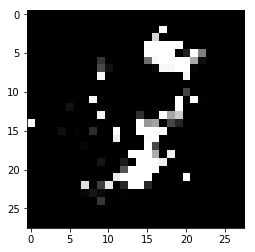

Number batches 468
11(0/468) D: 0.4123, G: 1.2316
11(1/468) D: 0.4841, G: 3.0608
11(2/468) D: 0.4930, G: 1.2384
11(3/468) D: 0.4328, G: 2.2719
11(4/468) D: 0.3331, G: 2.0774
11(5/468) D: 0.3375, G: 1.5457
11(6/468) D: 0.3730, G: 2.0275
11(7/468) D: 0.2829, G: 2.1852
11(8/468) D: 0.3644, G: 1.7580
11(9/468) D: 0.3930, G: 1.6644
11(10/468) D: 0.3589, G: 2.5083
11(11/468) D: 0.3024, G: 1.4155
11(12/468) D: 0.4003, G: 2.8101
11(13/468) D: 0.3749, G: 1.5781
11(14/468) D: 0.3638, G: 2.1875
11(15/468) D: 0.3034, G: 1.7591
11(16/468) D: 0.3217, G: 2.2537
11(17/468) D: 0.2910, G: 2.0296
11(18/468) D: 0.3049, G: 2.0726
11(19/468) D: 0.2826, G: 1.8139
11(20/468) D: 0.3601, G: 2.8279
11(21/468) D: 0.3499, G: 1.5979
11(22/468) D: 0.3206, G: 2.1670
11(23/468) D: 0.2607, G: 2.0463
11(24/468) D: 0.3497, G: 1.9531
11(25/468) D: 0.3671, G: 1.9452
11(26/468) D: 0.3659, G: 1.9738
11(27/468) D: 0.2887, G: 2.1854
11(28/468) D: 0.3207, G: 2.2814
11(29/468) D: 0.3151, G: 2.0319
11(30/468) D: 0.3735, G: 1.9184

11(253/468) D: 0.3756, G: 2.4340
11(254/468) D: 0.3455, G: 1.7236
11(255/468) D: 0.3398, G: 2.0141
11(256/468) D: 0.3290, G: 2.0276
11(257/468) D: 0.3056, G: 2.2697
11(258/468) D: 0.3343, G: 1.5604
11(259/468) D: 0.3611, G: 2.2739
11(260/468) D: 0.3245, G: 2.1660
11(261/468) D: 0.3621, G: 1.3529
11(262/468) D: 0.4681, G: 3.0545
11(263/468) D: 0.4688, G: 1.5765
11(264/468) D: 0.4066, G: 1.9568
11(265/468) D: 0.3877, G: 2.4429
11(266/468) D: 0.3741, G: 1.7558
11(267/468) D: 0.2784, G: 1.7777
11(268/468) D: 0.3592, G: 2.1937
11(269/468) D: 0.3132, G: 2.2209
11(270/468) D: 0.3568, G: 1.6252
11(271/468) D: 0.3502, G: 2.4977
11(272/468) D: 0.3605, G: 1.4457
11(273/468) D: 0.3218, G: 2.3854
11(274/468) D: 0.3494, G: 2.2338
11(275/468) D: 0.3536, G: 1.9784
11(276/468) D: 0.3886, G: 2.4224
11(277/468) D: 0.4063, G: 2.2031
11(278/468) D: 0.3516, G: 2.0799
11(279/468) D: 0.3959, G: 1.5929
11(280/468) D: 0.3582, G: 1.9668
11(281/468) D: 0.3833, G: 2.1717
11(282/468) D: 0.3537, G: 2.1065
11(283/468

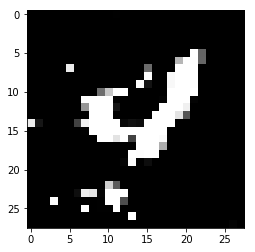

Number batches 468
12(0/468) D: 0.4046, G: 1.6742
12(1/468) D: 0.4026, G: 2.3868
12(2/468) D: 0.3978, G: 1.3141
12(3/468) D: 0.4121, G: 2.7086
12(4/468) D: 0.4201, G: 1.3517
12(5/468) D: 0.3583, G: 2.3739
12(6/468) D: 0.2970, G: 2.1565
12(7/468) D: 0.3030, G: 2.2734
12(8/468) D: 0.3732, G: 1.3531
12(9/468) D: 0.4831, G: 2.5274
12(10/468) D: 0.4059, G: 2.1662
12(11/468) D: 0.3322, G: 1.7617
12(12/468) D: 0.3001, G: 1.7069
12(13/468) D: 0.3390, G: 1.8971
12(14/468) D: 0.3503, G: 2.0039
12(15/468) D: 0.3821, G: 1.9839
12(16/468) D: 0.3564, G: 1.4948
12(17/468) D: 0.3406, G: 2.4687
12(18/468) D: 0.3412, G: 2.0106
12(19/468) D: 0.3219, G: 1.7809
12(20/468) D: 0.3332, G: 2.3296
12(21/468) D: 0.3663, G: 1.4685
12(22/468) D: 0.3520, G: 2.2814
12(23/468) D: 0.2912, G: 1.8209
12(24/468) D: 0.3359, G: 1.7117
12(25/468) D: 0.3915, G: 1.9684
12(26/468) D: 0.3685, G: 2.2402
12(27/468) D: 0.3504, G: 1.5416
12(28/468) D: 0.3041, G: 2.4046
12(29/468) D: 0.3256, G: 2.2612
12(30/468) D: 0.3781, G: 1.6275

12(252/468) D: 0.4744, G: 2.3359
12(253/468) D: 0.3247, G: 2.4500
12(254/468) D: 0.3280, G: 1.5387
12(255/468) D: 0.3837, G: 1.9376
12(256/468) D: 0.4220, G: 1.7586
12(257/468) D: 0.2950, G: 2.2386
12(258/468) D: 0.4142, G: 1.7556
12(259/468) D: 0.3519, G: 1.7818
12(260/468) D: 0.3646, G: 1.9380
12(261/468) D: 0.3415, G: 1.4903
12(262/468) D: 0.3431, G: 1.9806
12(263/468) D: 0.3510, G: 1.6714
12(264/468) D: 0.3251, G: 1.9127
12(265/468) D: 0.3754, G: 1.8265
12(266/468) D: 0.3768, G: 1.7549
12(267/468) D: 0.3291, G: 1.8919
12(268/468) D: 0.3488, G: 2.1891
12(269/468) D: 0.3341, G: 1.7399
12(270/468) D: 0.4266, G: 2.3877
12(271/468) D: 0.4760, G: 0.8671
12(272/468) D: 0.6302, G: 3.5639
12(273/468) D: 0.5963, G: 1.9278
12(274/468) D: 0.3889, G: 1.5671
12(275/468) D: 0.4044, G: 1.8593
12(276/468) D: 0.4039, G: 1.6349
12(277/468) D: 0.3256, G: 1.5390
12(278/468) D: 0.4067, G: 1.8468
12(279/468) D: 0.4575, G: 1.4899
12(280/468) D: 0.3576, G: 1.9544
12(281/468) D: 0.4006, G: 1.8435
12(282/468

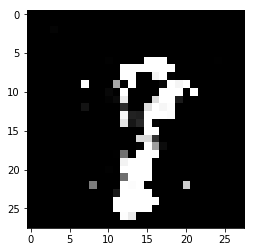

Number batches 468
13(0/468) D: 0.3796, G: 1.6525
13(1/468) D: 0.3544, G: 1.8559
13(2/468) D: 0.3843, G: 2.0143
13(3/468) D: 0.3931, G: 1.6351
13(4/468) D: 0.3966, G: 2.2411
13(5/468) D: 0.3842, G: 1.8251
13(6/468) D: 0.3818, G: 2.2165
13(7/468) D: 0.3776, G: 1.7999
13(8/468) D: 0.4027, G: 1.6119
13(9/468) D: 0.5224, G: 1.9668
13(10/468) D: 0.4186, G: 1.7529
13(11/468) D: 0.3725, G: 1.8413
13(12/468) D: 0.3784, G: 1.8937
13(13/468) D: 0.3535, G: 1.9891
13(14/468) D: 0.3639, G: 1.5052
13(15/468) D: 0.3848, G: 1.8056
13(16/468) D: 0.3703, G: 2.5973
13(17/468) D: 0.3070, G: 2.1853
13(18/468) D: 0.4473, G: 0.9631
13(19/468) D: 0.5987, G: 3.2810
13(20/468) D: 0.5242, G: 1.9194
13(21/468) D: 0.4473, G: 1.0035
13(22/468) D: 0.4279, G: 1.7188
13(23/468) D: 0.3457, G: 1.9997
13(24/468) D: 0.4082, G: 1.5674
13(25/468) D: 0.3705, G: 1.3979
13(26/468) D: 0.3840, G: 1.8502
13(27/468) D: 0.3673, G: 1.7796
13(28/468) D: 0.2919, G: 2.1191
13(29/468) D: 0.3689, G: 1.7532
13(30/468) D: 0.3802, G: 1.4952

13(252/468) D: 0.3700, G: 1.8664
13(253/468) D: 0.3594, G: 1.8165
13(254/468) D: 0.3685, G: 2.2560
13(255/468) D: 0.4650, G: 1.4054
13(256/468) D: 0.4377, G: 1.9350
13(257/468) D: 0.2896, G: 2.3749
13(258/468) D: 0.3867, G: 1.3076
13(259/468) D: 0.3993, G: 2.0005
13(260/468) D: 0.4045, G: 1.4703
13(261/468) D: 0.3991, G: 1.6419
13(262/468) D: 0.3733, G: 1.9496
13(263/468) D: 0.4338, G: 1.8997
13(264/468) D: 0.3874, G: 1.6255
13(265/468) D: 0.4067, G: 1.7880
13(266/468) D: 0.3781, G: 1.9184
13(267/468) D: 0.4360, G: 1.6370
13(268/468) D: 0.4320, G: 1.9329
13(269/468) D: 0.4093, G: 1.5041
13(270/468) D: 0.3998, G: 2.0808
13(271/468) D: 0.4285, G: 1.2894
13(272/468) D: 0.3941, G: 2.4096
13(273/468) D: 0.3625, G: 1.6409
13(274/468) D: 0.3431, G: 1.5127
13(275/468) D: 0.3592, G: 2.2448
13(276/468) D: 0.3469, G: 1.9405
13(277/468) D: 0.3109, G: 2.0695
13(278/468) D: 0.3341, G: 2.0556
13(279/468) D: 0.4635, G: 1.1820
13(280/468) D: 0.4093, G: 2.5050
13(281/468) D: 0.3884, G: 1.5661
13(282/468

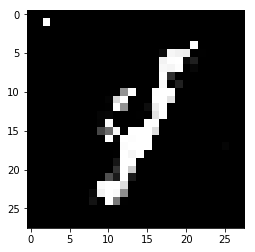

Number batches 468
14(0/468) D: 0.5342, G: 1.6988
14(1/468) D: 0.4673, G: 1.9181
14(2/468) D: 0.4602, G: 1.7052
14(3/468) D: 0.3909, G: 1.5071
14(4/468) D: 0.4240, G: 1.6152
14(5/468) D: 0.4095, G: 1.9547
14(6/468) D: 0.4270, G: 1.6865
14(7/468) D: 0.3652, G: 1.7071
14(8/468) D: 0.4159, G: 1.7541
14(9/468) D: 0.4821, G: 1.8881
14(10/468) D: 0.4565, G: 1.7036
14(11/468) D: 0.3404, G: 2.3156
14(12/468) D: 0.4053, G: 1.6772
14(13/468) D: 0.3944, G: 2.3086
14(14/468) D: 0.3930, G: 1.7248
14(15/468) D: 0.3324, G: 1.6982
14(16/468) D: 0.3741, G: 1.8943
14(17/468) D: 0.4044, G: 1.8670
14(18/468) D: 0.3936, G: 1.4125
14(19/468) D: 0.3637, G: 1.9685
14(20/468) D: 0.3485, G: 2.2729
14(21/468) D: 0.4866, G: 1.4014
14(22/468) D: 0.3884, G: 1.8858
14(23/468) D: 0.3361, G: 2.0454
14(24/468) D: 0.4327, G: 1.5116
14(25/468) D: 0.4259, G: 2.4951
14(26/468) D: 0.4323, G: 1.6097
14(27/468) D: 0.3759, G: 1.7388
14(28/468) D: 0.3266, G: 2.6117
14(29/468) D: 0.3525, G: 1.7683
14(30/468) D: 0.3655, G: 1.8219

14(253/468) D: 0.3745, G: 1.4340
14(254/468) D: 0.3340, G: 2.0541
14(255/468) D: 0.4197, G: 1.7789
14(256/468) D: 0.4062, G: 1.4972
14(257/468) D: 0.3635, G: 2.4617
14(258/468) D: 0.3797, G: 1.6082
14(259/468) D: 0.3953, G: 1.7823
14(260/468) D: 0.4167, G: 2.1794
14(261/468) D: 0.3943, G: 1.5860
14(262/468) D: 0.4673, G: 1.3274
14(263/468) D: 0.3560, G: 2.2306
14(264/468) D: 0.3871, G: 1.9867
14(265/468) D: 0.4340, G: 1.5437
14(266/468) D: 0.4054, G: 1.9914
14(267/468) D: 0.3659, G: 2.0657
14(268/468) D: 0.3457, G: 1.4528
14(269/468) D: 0.3761, G: 1.8618
14(270/468) D: 0.3892, G: 1.7289
14(271/468) D: 0.3272, G: 1.8703
14(272/468) D: 0.3260, G: 1.7186
14(273/468) D: 0.3407, G: 2.6151
14(274/468) D: 0.3929, G: 1.1646
14(275/468) D: 0.4069, G: 2.6459
14(276/468) D: 0.4905, G: 1.7596
14(277/468) D: 0.3190, G: 1.6125
14(278/468) D: 0.3532, G: 2.1434
14(279/468) D: 0.4501, G: 1.4162
14(280/468) D: 0.4366, G: 1.6151
14(281/468) D: 0.3978, G: 2.1537
14(282/468) D: 0.3674, G: 1.6696
14(283/468

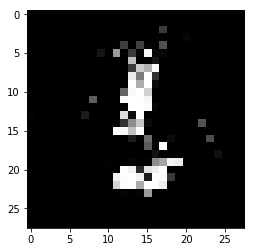

Number batches 468
15(0/468) D: 0.5000, G: 1.1452
15(1/468) D: 0.4894, G: 1.5718
15(2/468) D: 0.4130, G: 1.4099
15(3/468) D: 0.4648, G: 1.6528
15(4/468) D: 0.4314, G: 1.6497
15(5/468) D: 0.4344, G: 1.6062
15(6/468) D: 0.4060, G: 1.8743
15(7/468) D: 0.4404, G: 1.7950
15(8/468) D: 0.4082, G: 1.6080
15(9/468) D: 0.5157, G: 1.2714
15(10/468) D: 0.5144, G: 1.8106
15(11/468) D: 0.4257, G: 1.6502
15(12/468) D: 0.3688, G: 1.6062
15(13/468) D: 0.3936, G: 1.7817
15(14/468) D: 0.4329, G: 1.4933
15(15/468) D: 0.3827, G: 1.8304
15(16/468) D: 0.3560, G: 2.2052
15(17/468) D: 0.3710, G: 1.3811
15(18/468) D: 0.4544, G: 1.9512
15(19/468) D: 0.3979, G: 1.7892
15(20/468) D: 0.4038, G: 1.6980
15(21/468) D: 0.4450, G: 1.3313
15(22/468) D: 0.4510, G: 1.7021
15(23/468) D: 0.4018, G: 1.6965
15(24/468) D: 0.4268, G: 1.2366
15(25/468) D: 0.4578, G: 1.9168
15(26/468) D: 0.4504, G: 1.5315
15(27/468) D: 0.4092, G: 1.8134
15(28/468) D: 0.3645, G: 2.1190
15(29/468) D: 0.3994, G: 1.3185
15(30/468) D: 0.4210, G: 1.6355

15(252/468) D: 0.4462, G: 1.8580
15(253/468) D: 0.3621, G: 1.6493
15(254/468) D: 0.4028, G: 1.7151
15(255/468) D: 0.4344, G: 1.4124
15(256/468) D: 0.3965, G: 1.6427
15(257/468) D: 0.3138, G: 2.3888
15(258/468) D: 0.4630, G: 1.4404
15(259/468) D: 0.4162, G: 1.9149
15(260/468) D: 0.4179, G: 1.6766
15(261/468) D: 0.3929, G: 1.1966
15(262/468) D: 0.4477, G: 1.8350
15(263/468) D: 0.3771, G: 1.8227
15(264/468) D: 0.4233, G: 1.9186
15(265/468) D: 0.4103, G: 1.7359
15(266/468) D: 0.3834, G: 1.6339
15(267/468) D: 0.3630, G: 1.6473
15(268/468) D: 0.4304, G: 1.7818
15(269/468) D: 0.4065, G: 2.0870
15(270/468) D: 0.4502, G: 1.3272
15(271/468) D: 0.4196, G: 2.2926
15(272/468) D: 0.4303, G: 1.2416
15(273/468) D: 0.4109, G: 2.1971
15(274/468) D: 0.3827, G: 1.7564
15(275/468) D: 0.4325, G: 1.5765
15(276/468) D: 0.3860, G: 1.9739
15(277/468) D: 0.3491, G: 1.7321
15(278/468) D: 0.3428, G: 1.9515
15(279/468) D: 0.4910, G: 1.0113
15(280/468) D: 0.5002, G: 2.5226
15(281/468) D: 0.5073, G: 1.0924
15(282/468

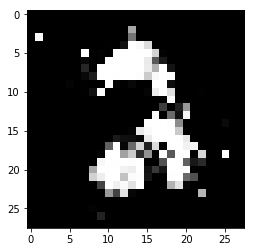

Number batches 468
16(0/468) D: 0.4703, G: 0.9441
16(1/468) D: 0.4678, G: 1.7616
16(2/468) D: 0.4055, G: 1.7214
16(3/468) D: 0.3801, G: 1.3666
16(4/468) D: 0.4287, G: 1.9114
16(5/468) D: 0.4026, G: 1.6597
16(6/468) D: 0.3756, G: 1.3906
16(7/468) D: 0.3969, G: 2.0131
16(8/468) D: 0.4696, G: 1.0549
16(9/468) D: 0.5414, G: 1.7410
16(10/468) D: 0.3995, G: 1.5212
16(11/468) D: 0.3531, G: 1.6274
16(12/468) D: 0.3898, G: 1.4988
16(13/468) D: 0.3780, G: 1.9185
16(14/468) D: 0.4331, G: 1.5239
16(15/468) D: 0.4325, G: 1.8028
16(16/468) D: 0.3572, G: 1.8594
16(17/468) D: 0.3349, G: 1.8208
16(18/468) D: 0.4559, G: 1.2884
16(19/468) D: 0.4192, G: 1.9824
16(20/468) D: 0.4031, G: 1.6643
16(21/468) D: 0.4442, G: 1.4301
16(22/468) D: 0.4394, G: 1.8983
16(23/468) D: 0.3659, G: 1.7720
16(24/468) D: 0.4104, G: 1.5191
16(25/468) D: 0.4251, G: 1.6501
16(26/468) D: 0.4412, G: 1.6261
16(27/468) D: 0.3604, G: 1.7004
16(28/468) D: 0.3948, G: 1.8900
16(29/468) D: 0.3619, G: 1.5343
16(30/468) D: 0.3916, G: 1.8022

16(252/468) D: 0.4837, G: 1.6441
16(253/468) D: 0.3949, G: 1.4511
16(254/468) D: 0.4173, G: 1.6284
16(255/468) D: 0.4415, G: 1.5351
16(256/468) D: 0.4023, G: 1.6842
16(257/468) D: 0.3820, G: 2.0734
16(258/468) D: 0.4264, G: 1.2630
16(259/468) D: 0.4631, G: 1.9603
16(260/468) D: 0.4544, G: 1.6398
16(261/468) D: 0.4073, G: 1.4078
16(262/468) D: 0.4595, G: 1.6311
16(263/468) D: 0.4093, G: 1.7551
16(264/468) D: 0.4540, G: 1.6459
16(265/468) D: 0.4732, G: 1.4015
16(266/468) D: 0.4194, G: 1.5257
16(267/468) D: 0.4269, G: 1.8264
16(268/468) D: 0.4227, G: 1.5649
16(269/468) D: 0.3974, G: 1.6385
16(270/468) D: 0.4362, G: 1.6219
16(271/468) D: 0.4662, G: 1.2096
16(272/468) D: 0.4549, G: 2.0951
16(273/468) D: 0.3990, G: 1.3313
16(274/468) D: 0.3986, G: 1.7903
16(275/468) D: 0.3997, G: 1.7354
16(276/468) D: 0.4563, G: 1.6389
16(277/468) D: 0.4124, G: 1.8873
16(278/468) D: 0.4424, G: 1.6433
16(279/468) D: 0.4613, G: 1.2960
16(280/468) D: 0.4099, G: 1.6712
16(281/468) D: 0.4005, G: 1.6878
16(282/468

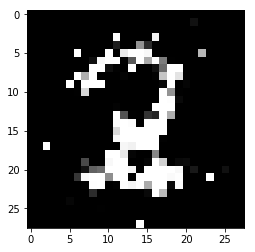

Number batches 468
17(0/468) D: 0.5401, G: 0.7537
17(1/468) D: 0.6153, G: 2.5787
17(2/468) D: 0.6423, G: 1.4710
17(3/468) D: 0.3921, G: 1.1207
17(4/468) D: 0.4880, G: 1.9413
17(5/468) D: 0.4215, G: 1.6933
17(6/468) D: 0.3617, G: 1.4190
17(7/468) D: 0.4105, G: 1.7058
17(8/468) D: 0.4647, G: 1.5855
17(9/468) D: 0.5282, G: 1.2050
17(10/468) D: 0.5344, G: 1.7022
17(11/468) D: 0.3840, G: 1.9929
17(12/468) D: 0.4569, G: 0.9616
17(13/468) D: 0.4668, G: 1.8408
17(14/468) D: 0.4086, G: 1.8100
17(15/468) D: 0.4324, G: 1.3566
17(16/468) D: 0.3806, G: 1.6478
17(17/468) D: 0.3549, G: 2.1165
17(18/468) D: 0.4940, G: 1.2856
17(19/468) D: 0.4220, G: 1.8428
17(20/468) D: 0.3856, G: 1.5593
17(21/468) D: 0.4415, G: 1.4596
17(22/468) D: 0.4114, G: 1.4565
17(23/468) D: 0.4176, G: 2.1043
17(24/468) D: 0.4308, G: 1.3703
17(25/468) D: 0.4339, G: 1.3715
17(26/468) D: 0.4803, G: 2.0404
17(27/468) D: 0.4211, G: 1.3307
17(28/468) D: 0.3764, G: 2.0477
17(29/468) D: 0.3535, G: 1.5992
17(30/468) D: 0.4683, G: 1.0729

17(252/468) D: 0.4203, G: 1.2589
17(253/468) D: 0.4646, G: 1.5891
17(254/468) D: 0.5067, G: 1.9384
17(255/468) D: 0.5617, G: 1.2708
17(256/468) D: 0.5214, G: 1.5874
17(257/468) D: 0.3821, G: 1.7641
17(258/468) D: 0.4629, G: 1.2805
17(259/468) D: 0.4451, G: 1.7299
17(260/468) D: 0.4085, G: 1.6512
17(261/468) D: 0.4470, G: 1.4861
17(262/468) D: 0.5176, G: 1.2833
17(263/468) D: 0.4561, G: 1.6020
17(264/468) D: 0.4510, G: 1.6270
17(265/468) D: 0.4248, G: 1.1837
17(266/468) D: 0.4975, G: 2.0014
17(267/468) D: 0.4625, G: 1.0635
17(268/468) D: 0.4781, G: 1.7049
17(269/468) D: 0.3967, G: 1.8554
17(270/468) D: 0.4626, G: 1.4339
17(271/468) D: 0.4343, G: 0.9512
17(272/468) D: 0.4672, G: 1.9855
17(273/468) D: 0.4403, G: 1.7386
17(274/468) D: 0.4369, G: 1.2303
17(275/468) D: 0.4347, G: 1.8221
17(276/468) D: 0.4639, G: 1.8535
17(277/468) D: 0.3500, G: 1.6089
17(278/468) D: 0.3554, G: 1.7109
17(279/468) D: 0.4917, G: 1.5437
17(280/468) D: 0.4522, G: 1.8083
17(281/468) D: 0.4089, G: 1.6013
17(282/468

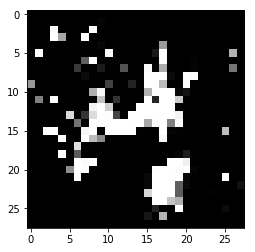

Number batches 468
18(0/468) D: 0.4485, G: 1.2363
18(1/468) D: 0.3943, G: 1.5299
18(2/468) D: 0.4915, G: 1.5359
18(3/468) D: 0.4263, G: 1.7611
18(4/468) D: 0.4005, G: 1.6797
18(5/468) D: 0.4402, G: 1.6544
18(6/468) D: 0.3624, G: 1.6914
18(7/468) D: 0.3715, G: 1.5067
18(8/468) D: 0.4208, G: 1.5417
18(9/468) D: 0.5377, G: 1.3219
18(10/468) D: 0.5419, G: 1.9788
18(11/468) D: 0.3858, G: 1.8149
18(12/468) D: 0.4301, G: 1.3598
18(13/468) D: 0.4566, G: 2.1049
18(14/468) D: 0.4256, G: 1.3579
18(15/468) D: 0.4325, G: 1.7810
18(16/468) D: 0.4219, G: 1.4855
18(17/468) D: 0.4361, G: 2.0716
18(18/468) D: 0.4701, G: 1.0745
18(19/468) D: 0.4948, G: 2.3372
18(20/468) D: 0.5064, G: 1.4032
18(21/468) D: 0.5085, G: 1.3740
18(22/468) D: 0.4946, G: 1.8906
18(23/468) D: 0.3782, G: 1.5353
18(24/468) D: 0.4503, G: 1.2872
18(25/468) D: 0.4193, G: 1.6093
18(26/468) D: 0.4446, G: 1.5482
18(27/468) D: 0.4096, G: 1.3653
18(28/468) D: 0.3978, G: 2.5147
18(29/468) D: 0.5280, G: 1.2766
18(30/468) D: 0.4973, G: 1.1529

18(252/468) D: 0.4044, G: 1.6683
18(253/468) D: 0.3893, G: 1.3779
18(254/468) D: 0.4085, G: 1.8565
18(255/468) D: 0.4311, G: 1.5971
18(256/468) D: 0.4594, G: 1.7892
18(257/468) D: 0.3528, G: 2.0567
18(258/468) D: 0.4404, G: 1.4505
18(259/468) D: 0.4594, G: 1.4316
18(260/468) D: 0.4665, G: 1.5678
18(261/468) D: 0.4164, G: 1.3730
18(262/468) D: 0.4336, G: 1.2885
18(263/468) D: 0.4767, G: 1.7408
18(264/468) D: 0.4989, G: 1.1819
18(265/468) D: 0.4091, G: 1.3994
18(266/468) D: 0.4436, G: 1.8201
18(267/468) D: 0.3894, G: 1.5795
18(268/468) D: 0.4417, G: 1.6184
18(269/468) D: 0.3905, G: 1.8607
18(270/468) D: 0.4395, G: 1.3863
18(271/468) D: 0.4810, G: 1.8785
18(272/468) D: 0.4448, G: 1.2514
18(273/468) D: 0.4080, G: 1.7405
18(274/468) D: 0.3897, G: 1.5974
18(275/468) D: 0.3848, G: 1.6856
18(276/468) D: 0.3683, G: 1.5120
18(277/468) D: 0.3666, G: 1.8960
18(278/468) D: 0.3657, G: 1.6049
18(279/468) D: 0.4577, G: 0.9760
18(280/468) D: 0.5229, G: 2.1577
18(281/468) D: 0.4911, G: 1.4330
18(282/468

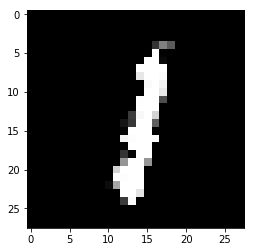

Number batches 468
19(0/468) D: 0.4466, G: 1.0895
19(1/468) D: 0.4427, G: 1.8716
19(2/468) D: 0.4165, G: 1.3701
19(3/468) D: 0.4312, G: 1.5188
19(4/468) D: 0.4106, G: 1.6144
19(5/468) D: 0.3881, G: 1.4922
19(6/468) D: 0.3700, G: 1.5971
19(7/468) D: 0.3897, G: 1.8075
19(8/468) D: 0.4584, G: 1.4759
19(9/468) D: 0.5417, G: 1.5747
19(10/468) D: 0.4519, G: 1.4631
19(11/468) D: 0.3769, G: 1.8820
19(12/468) D: 0.4355, G: 1.4743
19(13/468) D: 0.3706, G: 1.7762
19(14/468) D: 0.4516, G: 1.7068
19(15/468) D: 0.4195, G: 1.3563
19(16/468) D: 0.3752, G: 2.2410
19(17/468) D: 0.3734, G: 1.3888
19(18/468) D: 0.4512, G: 1.7968
19(19/468) D: 0.3954, G: 2.1247
19(20/468) D: 0.4203, G: 1.3305
19(21/468) D: 0.4006, G: 1.4151
19(22/468) D: 0.4342, G: 2.1580
19(23/468) D: 0.3549, G: 1.6223
19(24/468) D: 0.4059, G: 2.0669
19(25/468) D: 0.4582, G: 1.0112
19(26/468) D: 0.4466, G: 2.2921
19(27/468) D: 0.4597, G: 1.2616
19(28/468) D: 0.3450, G: 1.7401
19(29/468) D: 0.4437, G: 1.6928
19(30/468) D: 0.4657, G: 1.5570

19(253/468) D: 0.4855, G: 1.5979
19(254/468) D: 0.4914, G: 1.5891
19(255/468) D: 0.5241, G: 1.1446
19(256/468) D: 0.5799, G: 1.7183
19(257/468) D: 0.4085, G: 1.5344
19(258/468) D: 0.4655, G: 1.3954
19(259/468) D: 0.4106, G: 1.3957
19(260/468) D: 0.4615, G: 1.6094
19(261/468) D: 0.4647, G: 1.4803
19(262/468) D: 0.4959, G: 1.2846
19(263/468) D: 0.4971, G: 1.4637
19(264/468) D: 0.4554, G: 1.6358
19(265/468) D: 0.5054, G: 1.3190
19(266/468) D: 0.4471, G: 1.7358
19(267/468) D: 0.4208, G: 1.5328
19(268/468) D: 0.4736, G: 1.3747
19(269/468) D: 0.4942, G: 1.8605
19(270/468) D: 0.4904, G: 1.3555
19(271/468) D: 0.4897, G: 1.4371
19(272/468) D: 0.4885, G: 1.5308
19(273/468) D: 0.4613, G: 1.2400
19(274/468) D: 0.4123, G: 1.4421
19(275/468) D: 0.4761, G: 1.6212
19(276/468) D: 0.4354, G: 1.6361
19(277/468) D: 0.4667, G: 1.5178
19(278/468) D: 0.4291, G: 1.5628
19(279/468) D: 0.4652, G: 1.2710
19(280/468) D: 0.4697, G: 1.9443
19(281/468) D: 0.4723, G: 0.9204
19(282/468) D: 0.5554, G: 2.2445
19(283/468

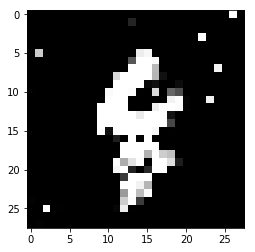

Number batches 468
20(0/468) D: 0.4894, G: 1.0263
20(1/468) D: 0.5387, G: 1.8250
20(2/468) D: 0.4816, G: 1.3519
20(3/468) D: 0.4784, G: 1.4988
20(4/468) D: 0.4528, G: 1.5455
20(5/468) D: 0.4519, G: 1.2913
20(6/468) D: 0.4358, G: 1.4400
20(7/468) D: 0.4268, G: 1.6890
20(8/468) D: 0.4837, G: 1.1288
20(9/468) D: 0.5502, G: 1.4748
20(10/468) D: 0.4920, G: 1.7581
20(11/468) D: 0.4357, G: 1.2318
20(12/468) D: 0.4287, G: 1.7764
20(13/468) D: 0.4375, G: 1.8172
20(14/468) D: 0.4861, G: 1.3128
20(15/468) D: 0.5181, G: 1.3914
20(16/468) D: 0.3667, G: 1.6937
20(17/468) D: 0.3792, G: 1.8720
20(18/468) D: 0.4584, G: 1.2315
20(19/468) D: 0.4631, G: 1.7295
20(20/468) D: 0.4625, G: 1.7231
20(21/468) D: 0.4892, G: 1.2051
20(22/468) D: 0.4630, G: 1.5979
20(23/468) D: 0.4457, G: 1.6049
20(24/468) D: 0.4786, G: 1.2691
20(25/468) D: 0.5244, G: 1.5916
20(26/468) D: 0.4428, G: 1.4730
20(27/468) D: 0.4159, G: 1.4941
20(28/468) D: 0.3891, G: 1.6392
20(29/468) D: 0.4114, G: 1.0950
20(30/468) D: 0.5441, G: 1.6824

20(252/468) D: 0.5838, G: 1.2848
20(253/468) D: 0.4449, G: 1.3511
20(254/468) D: 0.4606, G: 1.5811
20(255/468) D: 0.4959, G: 1.3413
20(256/468) D: 0.5050, G: 1.8070
20(257/468) D: 0.4603, G: 1.5767
20(258/468) D: 0.4518, G: 1.4336
20(259/468) D: 0.4546, G: 1.4434
20(260/468) D: 0.4632, G: 1.2445
20(261/468) D: 0.5094, G: 1.2377
20(262/468) D: 0.4509, G: 1.1341
20(263/468) D: 0.4451, G: 1.6166
20(264/468) D: 0.4521, G: 1.2579
20(265/468) D: 0.4317, G: 1.4420
20(266/468) D: 0.3985, G: 1.4356
20(267/468) D: 0.4506, G: 1.5885
20(268/468) D: 0.4437, G: 1.3615
20(269/468) D: 0.4135, G: 1.5783
20(270/468) D: 0.5122, G: 1.3253
20(271/468) D: 0.5403, G: 1.4979
20(272/468) D: 0.4738, G: 1.2650
20(273/468) D: 0.4934, G: 1.5040
20(274/468) D: 0.4028, G: 1.7782
20(275/468) D: 0.4614, G: 1.2531
20(276/468) D: 0.4788, G: 1.8732
20(277/468) D: 0.4205, G: 1.2720
20(278/468) D: 0.4400, G: 1.4868
20(279/468) D: 0.4743, G: 1.0903
20(280/468) D: 0.4521, G: 1.8392
20(281/468) D: 0.4562, G: 1.4315
20(282/468

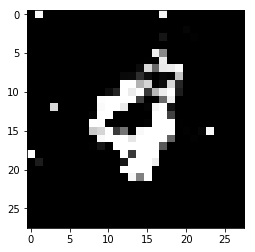

Number batches 468
21(0/468) D: 0.5317, G: 1.3733
21(1/468) D: 0.4704, G: 1.3686
21(2/468) D: 0.5034, G: 1.2743
21(3/468) D: 0.5013, G: 1.8800
21(4/468) D: 0.5009, G: 1.2667
21(5/468) D: 0.4396, G: 1.1667
21(6/468) D: 0.4679, G: 1.8481
21(7/468) D: 0.4414, G: 1.4453
21(8/468) D: 0.5219, G: 1.1904
21(9/468) D: 0.5633, G: 1.5818
21(10/468) D: 0.6305, G: 1.2262
21(11/468) D: 0.4740, G: 2.0317
21(12/468) D: 0.5935, G: 0.6183
21(13/468) D: 0.6869, G: 2.0490
21(14/468) D: 0.5587, G: 1.3709
21(15/468) D: 0.5314, G: 1.2752
21(16/468) D: 0.4646, G: 1.4169
21(17/468) D: 0.4302, G: 1.5270
21(18/468) D: 0.4820, G: 1.1497
21(19/468) D: 0.4560, G: 1.2702
21(20/468) D: 0.4629, G: 1.5296
21(21/468) D: 0.4704, G: 1.4391
21(22/468) D: 0.4452, G: 1.3231
21(23/468) D: 0.4583, G: 1.7913
21(24/468) D: 0.5367, G: 1.2706
21(25/468) D: 0.4519, G: 1.2266
21(26/468) D: 0.4401, G: 1.6998
21(27/468) D: 0.5304, G: 1.5019
21(28/468) D: 0.4185, G: 1.3727
21(29/468) D: 0.4179, G: 1.5790
21(30/468) D: 0.4747, G: 1.3107

21(252/468) D: 0.5339, G: 1.1945
21(253/468) D: 0.4828, G: 1.6754
21(254/468) D: 0.5269, G: 1.2145
21(255/468) D: 0.6141, G: 1.1804
21(256/468) D: 0.5337, G: 1.5270
21(257/468) D: 0.4637, G: 1.4444
21(258/468) D: 0.5236, G: 1.3087
21(259/468) D: 0.4563, G: 1.3877
21(260/468) D: 0.4863, G: 1.2231
21(261/468) D: 0.4766, G: 1.5556
21(262/468) D: 0.5729, G: 1.4514
21(263/468) D: 0.5219, G: 1.0109
21(264/468) D: 0.5516, G: 1.6208
21(265/468) D: 0.5123, G: 1.3314
21(266/468) D: 0.5488, G: 1.3027
21(267/468) D: 0.4759, G: 1.4530
21(268/468) D: 0.5112, G: 1.1186
21(269/468) D: 0.5742, G: 1.4895
21(270/468) D: 0.5240, G: 1.2558
21(271/468) D: 0.5222, G: 1.4988
21(272/468) D: 0.4281, G: 1.3942
21(273/468) D: 0.4658, G: 1.5113
21(274/468) D: 0.4246, G: 1.3982
21(275/468) D: 0.4559, G: 1.5661
21(276/468) D: 0.5085, G: 1.5785
21(277/468) D: 0.4565, G: 1.5485
21(278/468) D: 0.4539, G: 1.6766
21(279/468) D: 0.5309, G: 0.9901
21(280/468) D: 0.5472, G: 1.7583
21(281/468) D: 0.4763, G: 1.1744
21(282/468

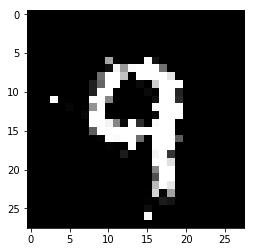

Number batches 468
22(0/468) D: 0.5230, G: 1.2007
22(1/468) D: 0.5400, G: 1.1762
22(2/468) D: 0.5160, G: 1.0987
22(3/468) D: 0.4698, G: 1.7086
22(4/468) D: 0.4884, G: 1.3568
22(5/468) D: 0.4909, G: 1.5206
22(6/468) D: 0.4356, G: 1.3203
22(7/468) D: 0.4679, G: 1.8067
22(8/468) D: 0.4996, G: 1.0614
22(9/468) D: 0.6161, G: 1.7118
22(10/468) D: 0.5682, G: 1.2556
22(11/468) D: 0.4329, G: 1.4260
22(12/468) D: 0.5039, G: 1.5068
22(13/468) D: 0.4622, G: 1.1553
22(14/468) D: 0.5107, G: 1.4851
22(15/468) D: 0.5405, G: 1.2595
22(16/468) D: 0.4878, G: 1.4439
22(17/468) D: 0.4770, G: 1.6477
22(18/468) D: 0.5465, G: 1.2331
22(19/468) D: 0.4703, G: 1.2224
22(20/468) D: 0.5617, G: 1.7872
22(21/468) D: 0.5244, G: 1.3123
22(22/468) D: 0.4899, G: 1.3843
22(23/468) D: 0.4495, G: 1.3436
22(24/468) D: 0.4795, G: 1.4869
22(25/468) D: 0.4530, G: 1.1893
22(26/468) D: 0.5439, G: 2.0856
22(27/468) D: 0.5370, G: 1.0242
22(28/468) D: 0.5430, G: 1.6862
22(29/468) D: 0.5747, G: 1.3305
22(30/468) D: 0.5520, G: 1.2390

22(253/468) D: 0.4730, G: 1.3617
22(254/468) D: 0.5025, G: 1.4169
22(255/468) D: 0.5821, G: 0.8901
22(256/468) D: 0.6081, G: 1.6583
22(257/468) D: 0.4583, G: 1.4383
22(258/468) D: 0.5247, G: 1.0618
22(259/468) D: 0.5051, G: 1.5103
22(260/468) D: 0.5221, G: 1.2084
22(261/468) D: 0.5196, G: 0.9768
22(262/468) D: 0.5719, G: 1.5636
22(263/468) D: 0.5798, G: 1.1981
22(264/468) D: 0.5198, G: 1.3267
22(265/468) D: 0.4558, G: 1.5723
22(266/468) D: 0.5341, G: 1.2255
22(267/468) D: 0.5242, G: 1.5208
22(268/468) D: 0.5500, G: 1.3170
22(269/468) D: 0.5048, G: 1.0801
22(270/468) D: 0.4971, G: 1.3272
22(271/468) D: 0.5067, G: 1.1730
22(272/468) D: 0.4754, G: 1.4491
22(273/468) D: 0.4738, G: 1.2444
22(274/468) D: 0.5066, G: 1.2472
22(275/468) D: 0.4307, G: 1.3569
22(276/468) D: 0.4850, G: 1.3562
22(277/468) D: 0.4043, G: 1.4568
22(278/468) D: 0.4413, G: 1.3225
22(279/468) D: 0.5372, G: 1.1481
22(280/468) D: 0.5075, G: 1.6849
22(281/468) D: 0.5020, G: 1.3120
22(282/468) D: 0.5043, G: 1.4152
22(283/468

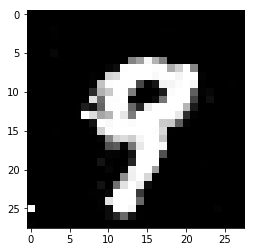

Number batches 468
23(0/468) D: 0.5608, G: 0.8633
23(1/468) D: 0.4580, G: 1.2345
23(2/468) D: 0.4873, G: 1.5466
23(3/468) D: 0.5161, G: 1.3769
23(4/468) D: 0.4314, G: 1.1636
23(5/468) D: 0.5112, G: 1.7619
23(6/468) D: 0.5276, G: 1.2436
23(7/468) D: 0.4180, G: 1.4990
23(8/468) D: 0.5397, G: 1.3398
23(9/468) D: 0.5289, G: 1.0910
23(10/468) D: 0.5492, G: 1.6511
23(11/468) D: 0.4411, G: 1.3994
23(12/468) D: 0.4701, G: 1.3326
23(13/468) D: 0.4529, G: 1.2594
23(14/468) D: 0.5050, G: 1.6152
23(15/468) D: 0.5658, G: 1.1090
23(16/468) D: 0.4679, G: 1.6334
23(17/468) D: 0.4477, G: 1.6536
23(18/468) D: 0.5322, G: 0.9808
23(19/468) D: 0.4713, G: 1.4659
23(20/468) D: 0.4496, G: 1.5761
23(21/468) D: 0.4867, G: 1.2056
23(22/468) D: 0.5119, G: 1.3812
23(23/468) D: 0.3979, G: 1.4154
23(24/468) D: 0.4968, G: 1.2895
23(25/468) D: 0.4804, G: 1.0890
23(26/468) D: 0.4925, G: 1.7816
23(27/468) D: 0.5273, G: 1.2366
23(28/468) D: 0.4443, G: 1.4681
23(29/468) D: 0.4774, G: 1.4615
23(30/468) D: 0.4964, G: 1.1238

23(253/468) D: 0.4373, G: 1.3372
23(254/468) D: 0.5664, G: 1.3536
23(255/468) D: 0.5796, G: 0.8976
23(256/468) D: 0.5517, G: 1.4124
23(257/468) D: 0.3916, G: 1.5584
23(258/468) D: 0.5041, G: 0.9688
23(259/468) D: 0.4532, G: 1.4607
23(260/468) D: 0.4643, G: 1.3965
23(261/468) D: 0.4755, G: 1.4091
23(262/468) D: 0.5091, G: 1.3789
23(263/468) D: 0.5702, G: 1.2392
23(264/468) D: 0.5620, G: 1.6971
23(265/468) D: 0.5028, G: 1.2519
23(266/468) D: 0.5252, G: 1.3935
23(267/468) D: 0.4992, G: 1.3763
23(268/468) D: 0.5196, G: 1.2894
23(269/468) D: 0.4550, G: 1.3627
23(270/468) D: 0.5733, G: 1.0735
23(271/468) D: 0.6033, G: 1.2818
23(272/468) D: 0.5275, G: 1.4559
23(273/468) D: 0.5008, G: 1.2055
23(274/468) D: 0.4806, G: 1.3078
23(275/468) D: 0.4844, G: 1.4756
23(276/468) D: 0.4949, G: 1.1623
23(277/468) D: 0.4731, G: 1.5951
23(278/468) D: 0.4896, G: 1.3670
23(279/468) D: 0.5735, G: 1.1371
23(280/468) D: 0.4853, G: 1.2539
23(281/468) D: 0.4870, G: 1.6214
23(282/468) D: 0.5256, G: 1.5135
23(283/468

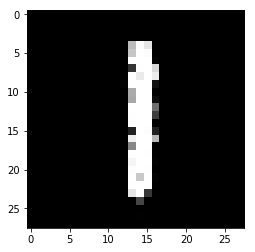

Number batches 468
24(0/468) D: 0.5926, G: 1.1356
24(1/468) D: 0.5498, G: 0.9941
24(2/468) D: 0.5726, G: 1.3550
24(3/468) D: 0.4804, G: 1.1648
24(4/468) D: 0.4665, G: 1.2292
24(5/468) D: 0.4820, G: 1.3458
24(6/468) D: 0.4602, G: 1.4889
24(7/468) D: 0.4626, G: 1.4510
24(8/468) D: 0.5518, G: 1.0716
24(9/468) D: 0.6106, G: 1.3730
24(10/468) D: 0.6230, G: 1.1526
24(11/468) D: 0.5754, G: 1.7018
24(12/468) D: 0.5135, G: 1.0292
24(13/468) D: 0.5145, G: 1.0803
24(14/468) D: 0.5533, G: 1.3105
24(15/468) D: 0.5657, G: 1.1591
24(16/468) D: 0.4891, G: 1.3893
24(17/468) D: 0.4781, G: 1.4312
24(18/468) D: 0.5723, G: 1.0991
24(19/468) D: 0.4656, G: 1.3486
24(20/468) D: 0.4660, G: 1.3355
24(21/468) D: 0.5427, G: 1.0914
24(22/468) D: 0.5247, G: 1.2129
24(23/468) D: 0.4689, G: 1.4280
24(24/468) D: 0.4540, G: 1.0860
24(25/468) D: 0.5146, G: 1.2519
24(26/468) D: 0.4814, G: 1.2616
24(27/468) D: 0.4956, G: 1.4315
24(28/468) D: 0.5017, G: 1.3744
24(29/468) D: 0.5277, G: 1.1574
24(30/468) D: 0.5323, G: 1.4728

24(252/468) D: 0.5542, G: 1.3034
24(253/468) D: 0.4953, G: 1.1371
24(254/468) D: 0.5041, G: 1.3689
24(255/468) D: 0.6303, G: 0.8284
24(256/468) D: 0.5887, G: 1.2083
24(257/468) D: 0.4701, G: 1.5350
24(258/468) D: 0.5546, G: 1.0653
24(259/468) D: 0.5015, G: 1.2336
24(260/468) D: 0.5123, G: 1.2870
24(261/468) D: 0.5435, G: 1.4052
24(262/468) D: 0.6114, G: 0.9251
24(263/468) D: 0.6381, G: 1.3238
24(264/468) D: 0.5346, G: 1.6426
24(265/468) D: 0.5450, G: 1.0787
24(266/468) D: 0.5246, G: 1.2939
24(267/468) D: 0.5304, G: 1.2594
24(268/468) D: 0.4581, G: 1.0321
24(269/468) D: 0.5258, G: 1.3959
24(270/468) D: 0.5211, G: 1.1097
24(271/468) D: 0.5844, G: 1.2313
24(272/468) D: 0.5376, G: 1.0629
24(273/468) D: 0.6352, G: 1.5625
24(274/468) D: 0.5829, G: 0.9942
24(275/468) D: 0.5460, G: 1.2477
24(276/468) D: 0.5459, G: 1.3858
24(277/468) D: 0.5393, G: 1.4909
24(278/468) D: 0.4672, G: 1.2208
24(279/468) D: 0.5386, G: 1.1051
24(280/468) D: 0.4916, G: 1.4146
24(281/468) D: 0.5136, G: 1.1996
24(282/468

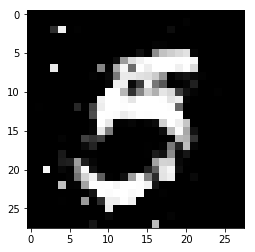

Number batches 468
25(0/468) D: 0.5673, G: 1.3741
25(1/468) D: 0.5056, G: 1.0004
25(2/468) D: 0.5496, G: 1.2065
25(3/468) D: 0.5087, G: 1.3219
25(4/468) D: 0.4375, G: 1.3029
25(5/468) D: 0.4851, G: 1.4672
25(6/468) D: 0.4419, G: 1.3480
25(7/468) D: 0.4696, G: 1.2978
25(8/468) D: 0.5620, G: 1.6438
25(9/468) D: 0.5901, G: 1.1288
25(10/468) D: 0.6118, G: 1.2557
25(11/468) D: 0.4665, G: 1.3616
25(12/468) D: 0.4791, G: 1.2872
25(13/468) D: 0.4937, G: 1.0689
25(14/468) D: 0.5436, G: 1.3444
25(15/468) D: 0.5528, G: 1.4470
25(16/468) D: 0.5069, G: 1.3287
25(17/468) D: 0.4522, G: 1.3594
25(18/468) D: 0.5586, G: 1.1917
25(19/468) D: 0.5382, G: 1.2229
25(20/468) D: 0.4502, G: 1.3778
25(21/468) D: 0.4936, G: 1.1506
25(22/468) D: 0.5061, G: 1.3985
25(23/468) D: 0.5210, G: 1.3845
25(24/468) D: 0.5080, G: 1.1458
25(25/468) D: 0.5411, G: 1.2375
25(26/468) D: 0.5098, G: 1.6853
25(27/468) D: 0.5422, G: 1.1920
25(28/468) D: 0.5270, G: 1.4506
25(29/468) D: 0.5049, G: 1.2301
25(30/468) D: 0.5273, G: 1.2099

25(253/468) D: 0.5346, G: 1.3392
25(254/468) D: 0.5626, G: 1.3437
25(255/468) D: 0.5908, G: 0.8615
25(256/468) D: 0.5782, G: 1.3116
25(257/468) D: 0.4591, G: 1.5987
25(258/468) D: 0.5938, G: 1.0862
25(259/468) D: 0.5328, G: 1.2554
25(260/468) D: 0.5038, G: 1.3550
25(261/468) D: 0.5312, G: 1.3143
25(262/468) D: 0.5198, G: 1.1816
25(263/468) D: 0.5616, G: 1.0891
25(264/468) D: 0.5549, G: 1.6431
25(265/468) D: 0.6004, G: 0.8847
25(266/468) D: 0.5400, G: 1.4375
25(267/468) D: 0.4982, G: 1.3431
25(268/468) D: 0.6033, G: 1.0537
25(269/468) D: 0.5509, G: 1.2401
25(270/468) D: 0.5201, G: 1.4375
25(271/468) D: 0.5898, G: 1.0142
25(272/468) D: 0.5353, G: 1.1832
25(273/468) D: 0.5305, G: 1.5178
25(274/468) D: 0.5102, G: 1.1396
25(275/468) D: 0.5397, G: 1.1512
25(276/468) D: 0.5086, G: 1.2244
25(277/468) D: 0.5103, G: 1.6087
25(278/468) D: 0.4974, G: 1.1908
25(279/468) D: 0.5989, G: 1.0265
25(280/468) D: 0.5625, G: 1.3745
25(281/468) D: 0.5187, G: 1.0342
25(282/468) D: 0.5771, G: 1.6310
25(283/468

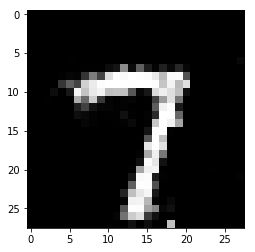

Number batches 468
26(0/468) D: 0.6338, G: 1.3120
26(1/468) D: 0.5388, G: 1.0110
26(2/468) D: 0.5887, G: 1.0680
26(3/468) D: 0.5318, G: 1.1727
26(4/468) D: 0.5291, G: 1.3837
26(5/468) D: 0.5060, G: 1.1965
26(6/468) D: 0.5143, G: 1.4132
26(7/468) D: 0.4736, G: 1.4003
26(8/468) D: 0.6098, G: 0.9434
26(9/468) D: 0.7252, G: 1.3307
26(10/468) D: 0.6304, G: 1.2131
26(11/468) D: 0.5093, G: 1.1113
26(12/468) D: 0.5014, G: 1.3991
26(13/468) D: 0.5111, G: 1.1384
26(14/468) D: 0.5202, G: 1.1809
26(15/468) D: 0.5621, G: 1.0285
26(16/468) D: 0.5306, G: 1.3637
26(17/468) D: 0.5214, G: 1.1089
26(18/468) D: 0.5510, G: 1.0199
26(19/468) D: 0.5074, G: 1.0510
26(20/468) D: 0.5149, G: 1.3958
26(21/468) D: 0.5653, G: 1.2196
26(22/468) D: 0.4789, G: 1.1096
26(23/468) D: 0.4840, G: 1.4498
26(24/468) D: 0.5058, G: 1.3395
26(25/468) D: 0.5433, G: 0.8176
26(26/468) D: 0.5341, G: 1.6677
26(27/468) D: 0.5272, G: 1.2573
26(28/468) D: 0.5651, G: 1.1779
26(29/468) D: 0.5070, G: 1.2010
26(30/468) D: 0.5520, G: 1.2813

26(252/468) D: 0.5389, G: 1.4199
26(253/468) D: 0.5405, G: 1.3810
26(254/468) D: 0.5108, G: 1.0358
26(255/468) D: 0.6436, G: 0.9547
26(256/468) D: 0.5845, G: 1.4843
26(257/468) D: 0.4573, G: 1.2769
26(258/468) D: 0.5382, G: 1.2541
26(259/468) D: 0.5160, G: 1.3471
26(260/468) D: 0.4907, G: 1.1187
26(261/468) D: 0.5476, G: 1.2940
26(262/468) D: 0.5449, G: 0.9595
26(263/468) D: 0.5871, G: 1.2290
26(264/468) D: 0.6233, G: 1.3952
26(265/468) D: 0.6130, G: 1.1029
26(266/468) D: 0.5592, G: 1.4843
26(267/468) D: 0.5458, G: 1.2759
26(268/468) D: 0.5308, G: 1.0903
26(269/468) D: 0.5234, G: 1.3439
26(270/468) D: 0.5239, G: 1.1183
26(271/468) D: 0.5515, G: 1.1491
26(272/468) D: 0.5695, G: 1.1765
26(273/468) D: 0.4724, G: 1.1215
26(274/468) D: 0.4625, G: 1.3260
26(275/468) D: 0.5434, G: 1.3572
26(276/468) D: 0.5205, G: 1.0625
26(277/468) D: 0.4999, G: 1.6404
26(278/468) D: 0.4975, G: 1.1498
26(279/468) D: 0.5508, G: 1.1643
26(280/468) D: 0.4960, G: 1.4514
26(281/468) D: 0.4634, G: 1.4015
26(282/468

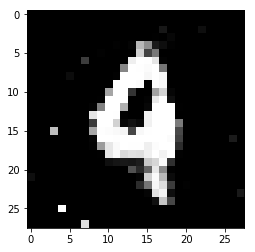

Number batches 468
27(0/468) D: 0.6016, G: 1.0696
27(1/468) D: 0.5759, G: 1.1244
27(2/468) D: 0.5878, G: 1.1397
27(3/468) D: 0.5502, G: 0.9953
27(4/468) D: 0.5679, G: 1.0922
27(5/468) D: 0.5397, G: 1.0231
27(6/468) D: 0.5539, G: 1.3690
27(7/468) D: 0.4871, G: 1.2986
27(8/468) D: 0.6141, G: 1.0053
27(9/468) D: 0.5778, G: 1.1431
27(10/468) D: 0.6123, G: 1.5169
27(11/468) D: 0.5476, G: 1.0579
27(12/468) D: 0.5160, G: 1.2803
27(13/468) D: 0.5542, G: 1.1926
27(14/468) D: 0.5239, G: 1.0886
27(15/468) D: 0.6433, G: 1.2199
27(16/468) D: 0.5349, G: 1.2081
27(17/468) D: 0.4784, G: 1.4976
27(18/468) D: 0.6204, G: 0.8962
27(19/468) D: 0.5632, G: 1.0407
27(20/468) D: 0.4667, G: 1.3561
27(21/468) D: 0.5442, G: 1.0728
27(22/468) D: 0.6022, G: 1.2086
27(23/468) D: 0.5274, G: 1.3094
27(24/468) D: 0.4899, G: 1.1661
27(25/468) D: 0.5920, G: 1.1773
27(26/468) D: 0.5470, G: 1.4404
27(27/468) D: 0.4988, G: 1.0535
27(28/468) D: 0.5525, G: 1.4400
27(29/468) D: 0.5417, G: 1.1712
27(30/468) D: 0.5405, G: 1.2068

27(253/468) D: 0.5163, G: 1.2547
27(254/468) D: 0.5584, G: 0.8896
27(255/468) D: 0.6106, G: 1.2230
27(256/468) D: 0.5482, G: 1.3978
27(257/468) D: 0.5348, G: 1.4349
27(258/468) D: 0.5547, G: 1.2706
27(259/468) D: 0.4810, G: 1.2765
27(260/468) D: 0.5097, G: 1.2473
27(261/468) D: 0.4713, G: 1.3154
27(262/468) D: 0.4920, G: 1.2488
27(263/468) D: 0.5249, G: 1.1665
27(264/468) D: 0.5570, G: 1.4083
27(265/468) D: 0.4880, G: 1.3629
27(266/468) D: 0.5053, G: 1.3250
27(267/468) D: 0.4899, G: 1.1012
27(268/468) D: 0.6037, G: 1.5548
27(269/468) D: 0.5532, G: 1.2159
27(270/468) D: 0.5290, G: 1.0550
27(271/468) D: 0.5973, G: 1.4991
27(272/468) D: 0.5504, G: 1.0652
27(273/468) D: 0.5694, G: 1.5279
27(274/468) D: 0.4813, G: 1.3463
27(275/468) D: 0.5058, G: 1.3267
27(276/468) D: 0.4835, G: 1.3379
27(277/468) D: 0.4792, G: 1.5050
27(278/468) D: 0.5124, G: 1.3234
27(279/468) D: 0.5493, G: 0.9792
27(280/468) D: 0.4915, G: 1.5388
27(281/468) D: 0.4992, G: 1.1803
27(282/468) D: 0.6160, G: 1.3457
27(283/468

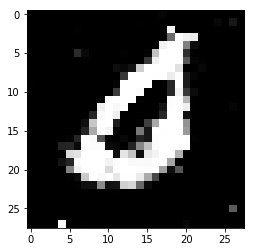

Number batches 468
28(0/468) D: 0.6018, G: 1.0529
28(1/468) D: 0.5801, G: 1.3693
28(2/468) D: 0.5383, G: 1.1153
28(3/468) D: 0.4889, G: 1.0320
28(4/468) D: 0.5457, G: 1.3592
28(5/468) D: 0.5049, G: 1.0689
28(6/468) D: 0.5162, G: 1.2542
28(7/468) D: 0.4917, G: 1.4788
28(8/468) D: 0.5386, G: 0.7830
28(9/468) D: 0.7456, G: 1.7901
28(10/468) D: 0.7573, G: 1.0463
28(11/468) D: 0.4860, G: 1.0167
28(12/468) D: 0.5011, G: 1.3966
28(13/468) D: 0.6057, G: 1.2044
28(14/468) D: 0.5528, G: 0.9212
28(15/468) D: 0.6005, G: 1.1201
28(16/468) D: 0.5343, G: 1.0675
28(17/468) D: 0.5228, G: 1.0323
28(18/468) D: 0.5569, G: 1.1678
28(19/468) D: 0.4984, G: 1.1514
28(20/468) D: 0.5012, G: 1.3801
28(21/468) D: 0.5514, G: 1.1450
28(22/468) D: 0.5038, G: 0.9918
28(23/468) D: 0.5100, G: 1.4468
28(24/468) D: 0.4991, G: 1.0084
28(25/468) D: 0.5494, G: 1.3870
28(26/468) D: 0.5433, G: 1.4483
28(27/468) D: 0.4868, G: 1.0908
28(28/468) D: 0.5529, G: 1.4071
28(29/468) D: 0.5261, G: 1.1707
28(30/468) D: 0.5345, G: 1.1406

28(252/468) D: 0.5892, G: 1.0662
28(253/468) D: 0.5342, G: 1.3493
28(254/468) D: 0.5798, G: 1.0562
28(255/468) D: 0.6158, G: 0.9507
28(256/468) D: 0.5741, G: 1.2902
28(257/468) D: 0.4766, G: 1.3142
28(258/468) D: 0.5689, G: 1.1172
28(259/468) D: 0.4526, G: 1.1550
28(260/468) D: 0.5423, G: 1.4488
28(261/468) D: 0.5641, G: 1.1462
28(262/468) D: 0.5412, G: 0.9584
28(263/468) D: 0.5469, G: 1.0586
28(264/468) D: 0.6309, G: 1.3845
28(265/468) D: 0.5576, G: 1.2286
28(266/468) D: 0.5506, G: 1.1992
28(267/468) D: 0.5106, G: 0.9969
28(268/468) D: 0.5459, G: 1.2547
28(269/468) D: 0.5337, G: 1.2042
28(270/468) D: 0.5988, G: 1.1312
28(271/468) D: 0.5511, G: 1.2137
28(272/468) D: 0.5392, G: 1.2161
28(273/468) D: 0.5121, G: 1.2614
28(274/468) D: 0.5019, G: 1.3465
28(275/468) D: 0.4876, G: 1.1340
28(276/468) D: 0.5675, G: 1.1533
28(277/468) D: 0.5708, G: 1.5536
28(278/468) D: 0.5651, G: 1.0421
28(279/468) D: 0.6849, G: 1.1816
28(280/468) D: 0.5411, G: 1.1948
28(281/468) D: 0.5175, G: 1.5098
28(282/468

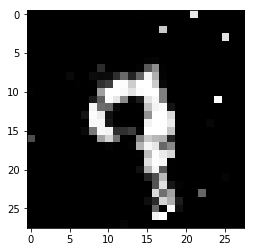

Number batches 468
29(0/468) D: 0.6663, G: 1.0634
29(1/468) D: 0.6013, G: 1.2669
29(2/468) D: 0.6069, G: 1.2229
29(3/468) D: 0.5131, G: 1.2759
29(4/468) D: 0.5321, G: 1.0868
29(5/468) D: 0.4927, G: 1.3803
29(6/468) D: 0.4624, G: 1.0732
29(7/468) D: 0.4765, G: 1.4272
29(8/468) D: 0.5156, G: 1.0646
29(9/468) D: 0.6698, G: 1.2893
29(10/468) D: 0.6102, G: 0.9151
29(11/468) D: 0.5695, G: 1.3207
29(12/468) D: 0.4581, G: 1.3204
29(13/468) D: 0.5651, G: 0.8907
29(14/468) D: 0.5077, G: 1.1919
29(15/468) D: 0.5751, G: 1.2731
29(16/468) D: 0.4940, G: 1.3918
29(17/468) D: 0.5388, G: 1.2204
29(18/468) D: 0.5685, G: 1.1824
29(19/468) D: 0.5562, G: 1.0825
29(20/468) D: 0.4860, G: 1.2493
29(21/468) D: 0.5276, G: 0.9552
29(22/468) D: 0.5749, G: 1.4386
29(23/468) D: 0.4794, G: 1.2545
29(24/468) D: 0.4898, G: 0.9402
29(25/468) D: 0.6563, G: 1.4597
29(26/468) D: 0.5373, G: 1.4207
29(27/468) D: 0.4918, G: 1.2725
29(28/468) D: 0.4972, G: 1.2904
29(29/468) D: 0.5399, G: 1.1211
29(30/468) D: 0.5446, G: 1.2611

29(253/468) D: 0.5112, G: 1.1803
29(254/468) D: 0.5240, G: 0.9900
29(255/468) D: 0.5782, G: 0.8824
29(256/468) D: 0.5470, G: 1.3134
29(257/468) D: 0.4456, G: 1.5102
29(258/468) D: 0.5780, G: 0.8385
29(259/468) D: 0.5547, G: 1.3150
29(260/468) D: 0.5017, G: 1.3548
29(261/468) D: 0.5327, G: 1.0738
29(262/468) D: 0.4972, G: 1.1190
29(263/468) D: 0.5151, G: 1.1346
29(264/468) D: 0.5453, G: 0.9808
29(265/468) D: 0.5166, G: 1.3294
29(266/468) D: 0.5226, G: 1.3833
29(267/468) D: 0.5046, G: 1.1428
29(268/468) D: 0.5208, G: 1.1372
29(269/468) D: 0.4990, G: 1.2811
29(270/468) D: 0.5787, G: 1.2367
29(271/468) D: 0.6442, G: 1.1951
29(272/468) D: 0.5376, G: 1.2522
29(273/468) D: 0.5492, G: 1.1980
29(274/468) D: 0.5088, G: 1.1346
29(275/468) D: 0.4597, G: 1.2138
29(276/468) D: 0.5791, G: 1.3197
29(277/468) D: 0.4750, G: 1.1980
29(278/468) D: 0.5163, G: 1.2457
29(279/468) D: 0.5983, G: 0.9557
29(280/468) D: 0.5224, G: 1.5545
29(281/468) D: 0.5009, G: 1.3489
29(282/468) D: 0.5377, G: 1.3039
29(283/468

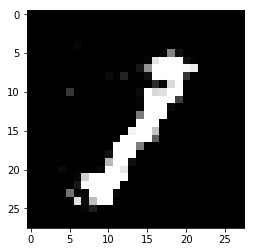

Number batches 468
30(0/468) D: 0.5754, G: 1.1709
30(1/468) D: 0.5648, G: 1.1251
30(2/468) D: 0.5721, G: 1.2164
30(3/468) D: 0.5247, G: 1.1360
30(4/468) D: 0.5021, G: 1.2689
30(5/468) D: 0.5606, G: 1.3328
30(6/468) D: 0.5019, G: 1.1114
30(7/468) D: 0.4803, G: 1.1900
30(8/468) D: 0.5310, G: 1.2427
30(9/468) D: 0.6260, G: 0.9969
30(10/468) D: 0.5922, G: 1.0914
30(11/468) D: 0.5398, G: 1.5319
30(12/468) D: 0.5561, G: 1.1396
30(13/468) D: 0.6469, G: 1.0384
30(14/468) D: 0.5323, G: 0.9520
30(15/468) D: 0.6445, G: 1.3453
30(16/468) D: 0.5493, G: 1.2616
30(17/468) D: 0.5206, G: 1.0761
30(18/468) D: 0.5850, G: 1.1779
30(19/468) D: 0.5590, G: 1.2325
30(20/468) D: 0.5150, G: 1.1604
30(21/468) D: 0.5536, G: 1.0241
30(22/468) D: 0.5809, G: 1.0773
30(23/468) D: 0.4587, G: 1.1756
30(24/468) D: 0.5269, G: 1.2784
30(25/468) D: 0.5742, G: 1.0275
30(26/468) D: 0.5801, G: 1.6657
30(27/468) D: 0.5462, G: 1.2919
30(28/468) D: 0.5860, G: 0.9658
30(29/468) D: 0.5924, G: 1.1750
30(30/468) D: 0.5993, G: 1.1878

30(252/468) D: 0.5723, G: 1.2746
30(253/468) D: 0.5602, G: 1.4009
30(254/468) D: 0.5707, G: 1.0346
30(255/468) D: 0.6020, G: 1.0306
30(256/468) D: 0.5524, G: 1.3127
30(257/468) D: 0.4984, G: 1.6217
30(258/468) D: 0.5711, G: 0.9992
30(259/468) D: 0.5428, G: 1.2171
30(260/468) D: 0.5719, G: 1.2031
30(261/468) D: 0.5211, G: 0.9477
30(262/468) D: 0.5612, G: 1.0377
30(263/468) D: 0.5922, G: 1.3412
30(264/468) D: 0.6035, G: 0.9881
30(265/468) D: 0.5466, G: 0.9853
30(266/468) D: 0.5923, G: 1.3903
30(267/468) D: 0.5345, G: 1.1564
30(268/468) D: 0.5409, G: 1.1753
30(269/468) D: 0.5129, G: 1.1935
30(270/468) D: 0.5593, G: 1.1028
30(271/468) D: 0.5688, G: 1.1850
30(272/468) D: 0.5285, G: 1.1416
30(273/468) D: 0.5815, G: 1.3377
30(274/468) D: 0.5631, G: 1.1172
30(275/468) D: 0.5316, G: 1.2642
30(276/468) D: 0.5810, G: 1.1218
30(277/468) D: 0.5337, G: 1.4572
30(278/468) D: 0.5449, G: 1.1270
30(279/468) D: 0.5699, G: 1.0979
30(280/468) D: 0.5481, G: 1.2966
30(281/468) D: 0.5159, G: 1.0679
30(282/468

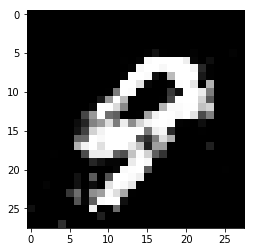

Number batches 468
31(0/468) D: 0.5909, G: 0.9734
31(1/468) D: 0.5865, G: 1.2387
31(2/468) D: 0.5348, G: 1.2020
31(3/468) D: 0.5135, G: 1.0322
31(4/468) D: 0.5286, G: 1.2483
31(5/468) D: 0.5469, G: 1.2008
31(6/468) D: 0.5198, G: 1.2362
31(7/468) D: 0.4950, G: 1.2898
31(8/468) D: 0.5304, G: 1.0513
31(9/468) D: 0.6385, G: 1.3063
31(10/468) D: 0.6551, G: 1.2239
31(11/468) D: 0.4913, G: 1.1504
31(12/468) D: 0.4779, G: 1.2097
31(13/468) D: 0.6016, G: 0.9785
31(14/468) D: 0.5786, G: 1.1087
31(15/468) D: 0.5656, G: 1.3706
31(16/468) D: 0.5282, G: 1.0725
31(17/468) D: 0.5568, G: 1.0861
31(18/468) D: 0.5137, G: 1.3009
31(19/468) D: 0.5158, G: 1.2227
31(20/468) D: 0.5027, G: 1.1999
31(21/468) D: 0.5063, G: 1.0394
31(22/468) D: 0.5580, G: 1.2099
31(23/468) D: 0.4859, G: 1.2100
31(24/468) D: 0.5598, G: 1.3254
31(25/468) D: 0.5936, G: 1.1150
31(26/468) D: 0.5557, G: 1.4605
31(27/468) D: 0.5281, G: 1.0983
31(28/468) D: 0.5097, G: 1.4423
31(29/468) D: 0.5376, G: 0.9871
31(30/468) D: 0.5587, G: 1.2518

31(252/468) D: 0.5243, G: 1.1295
31(253/468) D: 0.5125, G: 1.2338
31(254/468) D: 0.5495, G: 1.0983
31(255/468) D: 0.6163, G: 1.0421
31(256/468) D: 0.5529, G: 1.3084
31(257/468) D: 0.4800, G: 1.2472
31(258/468) D: 0.5409, G: 1.1529
31(259/468) D: 0.5092, G: 1.0984
31(260/468) D: 0.5297, G: 1.0774
31(261/468) D: 0.5400, G: 1.0974
31(262/468) D: 0.5693, G: 0.9280
31(263/468) D: 0.6980, G: 1.3091
31(264/468) D: 0.6446, G: 0.9446
31(265/468) D: 0.6246, G: 1.2874
31(266/468) D: 0.5870, G: 1.2737
31(267/468) D: 0.6132, G: 1.0138
31(268/468) D: 0.5720, G: 1.0877
31(269/468) D: 0.5715, G: 1.3107
31(270/468) D: 0.5890, G: 1.2036
31(271/468) D: 0.6167, G: 0.9532
31(272/468) D: 0.5552, G: 1.2685
31(273/468) D: 0.5209, G: 1.1615
31(274/468) D: 0.5440, G: 1.1009
31(275/468) D: 0.5236, G: 1.2156
31(276/468) D: 0.5293, G: 1.1189
31(277/468) D: 0.5548, G: 1.3218
31(278/468) D: 0.5424, G: 1.0446
31(279/468) D: 0.5739, G: 1.0951
31(280/468) D: 0.5465, G: 1.4746
31(281/468) D: 0.5675, G: 0.9556
31(282/468

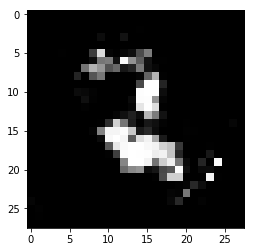

Number batches 468
32(0/468) D: 0.5532, G: 0.9627
32(1/468) D: 0.5830, G: 1.2963
32(2/468) D: 0.5624, G: 1.1659
32(3/468) D: 0.5161, G: 1.1139
32(4/468) D: 0.5670, G: 1.2531
32(5/468) D: 0.5295, G: 1.0979
32(6/468) D: 0.5608, G: 1.1833
32(7/468) D: 0.5197, G: 1.2099
32(8/468) D: 0.5616, G: 1.2013
32(9/468) D: 0.6700, G: 0.9674
32(10/468) D: 0.6425, G: 1.2834
32(11/468) D: 0.5060, G: 1.2135
32(12/468) D: 0.5415, G: 1.1458
32(13/468) D: 0.5552, G: 0.9665
32(14/468) D: 0.6157, G: 1.1479
32(15/468) D: 0.6199, G: 1.1574
32(16/468) D: 0.5182, G: 1.1457
32(17/468) D: 0.5377, G: 1.3083
32(18/468) D: 0.5970, G: 1.2344
32(19/468) D: 0.5809, G: 1.0602
32(20/468) D: 0.4969, G: 1.4186
32(21/468) D: 0.5636, G: 1.1626
32(22/468) D: 0.5266, G: 1.1737
32(23/468) D: 0.4496, G: 1.4355
32(24/468) D: 0.5398, G: 1.1082
32(25/468) D: 0.5661, G: 1.1784
32(26/468) D: 0.5047, G: 1.6002
32(27/468) D: 0.5732, G: 1.1332
32(28/468) D: 0.5523, G: 1.1245
32(29/468) D: 0.5410, G: 1.2334
32(30/468) D: 0.5675, G: 1.0546

32(252/468) D: 0.5478, G: 1.0360
32(253/468) D: 0.5258, G: 1.1664
32(254/468) D: 0.5535, G: 1.1298
32(255/468) D: 0.6223, G: 0.9349
32(256/468) D: 0.6292, G: 1.2874
32(257/468) D: 0.5440, G: 1.1331
32(258/468) D: 0.5952, G: 1.0530
32(259/468) D: 0.5453, G: 1.2065
32(260/468) D: 0.5790, G: 1.1854
32(261/468) D: 0.5652, G: 0.9828
32(262/468) D: 0.6015, G: 1.1741
32(263/468) D: 0.6502, G: 1.0452
32(264/468) D: 0.6341, G: 1.1258
32(265/468) D: 0.5617, G: 1.1161
32(266/468) D: 0.6272, G: 1.2528
32(267/468) D: 0.5366, G: 1.1620
32(268/468) D: 0.5463, G: 1.1776
32(269/468) D: 0.5914, G: 1.3501
32(270/468) D: 0.5815, G: 1.0966
32(271/468) D: 0.6273, G: 1.0625
32(272/468) D: 0.5566, G: 1.0965
32(273/468) D: 0.5282, G: 1.1124
32(274/468) D: 0.5125, G: 1.1885
32(275/468) D: 0.5183, G: 1.1659
32(276/468) D: 0.5969, G: 1.0628
32(277/468) D: 0.5153, G: 1.2499
32(278/468) D: 0.5537, G: 1.2957
32(279/468) D: 0.6676, G: 1.4318
32(280/468) D: 0.5702, G: 1.2241
32(281/468) D: 0.5033, G: 0.9650
32(282/468

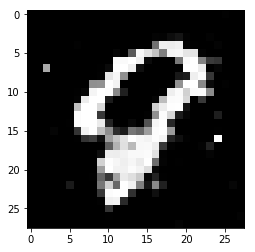

Number batches 468
33(0/468) D: 0.6663, G: 0.9689
33(1/468) D: 0.6069, G: 0.9799
33(2/468) D: 0.6358, G: 1.1218
33(3/468) D: 0.5596, G: 1.1760
33(4/468) D: 0.5679, G: 0.9336
33(5/468) D: 0.5899, G: 1.0667
33(6/468) D: 0.5450, G: 1.1606
33(7/468) D: 0.5386, G: 1.2874
33(8/468) D: 0.5266, G: 0.9775
33(9/468) D: 0.6946, G: 1.0432
33(10/468) D: 0.6155, G: 1.1585
33(11/468) D: 0.5181, G: 1.1776
33(12/468) D: 0.4642, G: 1.1949
33(13/468) D: 0.5220, G: 0.9303
33(14/468) D: 0.5418, G: 1.2495
33(15/468) D: 0.5948, G: 1.1721
33(16/468) D: 0.5263, G: 1.1966
33(17/468) D: 0.5521, G: 1.2315
33(18/468) D: 0.5737, G: 1.1157
33(19/468) D: 0.5680, G: 1.2977
33(20/468) D: 0.5395, G: 1.2078
33(21/468) D: 0.5813, G: 1.1022
33(22/468) D: 0.5370, G: 0.9732
33(23/468) D: 0.5042, G: 1.2110
33(24/468) D: 0.5484, G: 1.0696
33(25/468) D: 0.5976, G: 0.9530
33(26/468) D: 0.5572, G: 1.4202
33(27/468) D: 0.5504, G: 1.2231
33(28/468) D: 0.4942, G: 1.0181
33(29/468) D: 0.5569, G: 1.2376
33(30/468) D: 0.6137, G: 1.2119

33(252/468) D: 0.6553, G: 1.2002
33(253/468) D: 0.5207, G: 1.0638
33(254/468) D: 0.5728, G: 1.1778
33(255/468) D: 0.6141, G: 0.9802
33(256/468) D: 0.6403, G: 1.1805
33(257/468) D: 0.5332, G: 1.1948
33(258/468) D: 0.6342, G: 0.9638
33(259/468) D: 0.5197, G: 1.1527
33(260/468) D: 0.5035, G: 1.1794
33(261/468) D: 0.5883, G: 1.1190
33(262/468) D: 0.5233, G: 1.1973
33(263/468) D: 0.5745, G: 0.9713
33(264/468) D: 0.5923, G: 1.2751
33(265/468) D: 0.5936, G: 1.2705
33(266/468) D: 0.5803, G: 0.9697
33(267/468) D: 0.5684, G: 1.3849
33(268/468) D: 0.5928, G: 1.2079
33(269/468) D: 0.5639, G: 0.9659
33(270/468) D: 0.5571, G: 0.9862
33(271/468) D: 0.6018, G: 1.3422
33(272/468) D: 0.5417, G: 1.1015
33(273/468) D: 0.5436, G: 1.0946
33(274/468) D: 0.5012, G: 1.1333
33(275/468) D: 0.5479, G: 1.2027
33(276/468) D: 0.5909, G: 1.0403
33(277/468) D: 0.5028, G: 1.3290
33(278/468) D: 0.5619, G: 1.0887
33(279/468) D: 0.5833, G: 1.1240
33(280/468) D: 0.5264, G: 1.2108
33(281/468) D: 0.4842, G: 1.2099
33(282/468

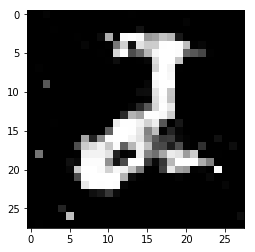

Number batches 468
34(0/468) D: 0.6001, G: 0.9937
34(1/468) D: 0.6477, G: 1.1405
34(2/468) D: 0.5605, G: 0.9777
34(3/468) D: 0.5631, G: 1.1705
34(4/468) D: 0.5330, G: 1.1315
34(5/468) D: 0.5384, G: 1.0530
34(6/468) D: 0.5435, G: 1.0998
34(7/468) D: 0.4743, G: 1.2433
34(8/468) D: 0.5411, G: 0.9738
34(9/468) D: 0.6507, G: 1.0546
34(10/468) D: 0.6439, G: 1.1597
34(11/468) D: 0.5609, G: 1.2741
34(12/468) D: 0.5016, G: 1.2238
34(13/468) D: 0.5116, G: 0.9643
34(14/468) D: 0.5618, G: 1.1819
34(15/468) D: 0.6261, G: 1.1027
34(16/468) D: 0.5308, G: 1.1921
34(17/468) D: 0.5688, G: 1.1568
34(18/468) D: 0.5970, G: 1.2215
34(19/468) D: 0.5912, G: 1.1151
34(20/468) D: 0.5311, G: 1.3704
34(21/468) D: 0.5887, G: 0.8824
34(22/468) D: 0.6052, G: 1.3070
34(23/468) D: 0.5038, G: 1.2745
34(24/468) D: 0.5286, G: 0.9142
34(25/468) D: 0.6152, G: 1.2988
34(26/468) D: 0.5903, G: 1.3579
34(27/468) D: 0.5815, G: 1.1996
34(28/468) D: 0.5379, G: 1.1379
34(29/468) D: 0.5356, G: 1.0416
34(30/468) D: 0.6219, G: 1.1131

34(252/468) D: 0.5719, G: 1.0733
34(253/468) D: 0.5222, G: 1.1735
34(254/468) D: 0.5605, G: 1.1243
34(255/468) D: 0.5852, G: 0.9042
34(256/468) D: 0.5638, G: 1.1776
34(257/468) D: 0.5109, G: 1.2841
34(258/468) D: 0.6105, G: 0.9543
34(259/468) D: 0.5722, G: 1.1556
34(260/468) D: 0.5494, G: 1.1454
34(261/468) D: 0.5816, G: 1.1174
34(262/468) D: 0.5248, G: 1.1420
34(263/468) D: 0.5778, G: 1.0435
34(264/468) D: 0.6248, G: 1.2389
34(265/468) D: 0.5517, G: 1.1664
34(266/468) D: 0.5828, G: 1.0847
34(267/468) D: 0.5160, G: 0.9615
34(268/468) D: 0.5405, G: 1.3400
34(269/468) D: 0.5244, G: 1.0811
34(270/468) D: 0.5666, G: 1.0543
34(271/468) D: 0.6150, G: 1.2694
34(272/468) D: 0.5747, G: 1.2283
34(273/468) D: 0.5504, G: 0.9746
34(274/468) D: 0.5307, G: 1.4199
34(275/468) D: 0.5489, G: 1.2260
34(276/468) D: 0.5811, G: 0.8453
34(277/468) D: 0.6257, G: 1.6214
34(278/468) D: 0.5958, G: 1.3231
34(279/468) D: 0.5612, G: 0.8065
34(280/468) D: 0.5741, G: 1.1529
34(281/468) D: 0.5150, G: 1.3815
34(282/468

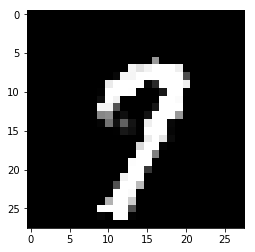

Number batches 468
35(0/468) D: 0.6563, G: 0.9449
35(1/468) D: 0.5895, G: 1.1984
35(2/468) D: 0.5899, G: 0.9615
35(3/468) D: 0.5474, G: 1.2073
35(4/468) D: 0.5418, G: 1.0592
35(5/468) D: 0.5081, G: 0.8721
35(6/468) D: 0.4946, G: 1.1309
35(7/468) D: 0.5239, G: 1.4658
35(8/468) D: 0.5742, G: 0.8976
35(9/468) D: 0.6141, G: 0.8822
35(10/468) D: 0.6774, G: 1.4235
35(11/468) D: 0.5930, G: 1.1333
35(12/468) D: 0.5602, G: 1.1588
35(13/468) D: 0.5007, G: 0.9779
35(14/468) D: 0.5674, G: 1.2349
35(15/468) D: 0.5457, G: 1.1396
35(16/468) D: 0.5306, G: 0.9724
35(17/468) D: 0.6035, G: 1.2235
35(18/468) D: 0.6064, G: 1.1097
35(19/468) D: 0.5911, G: 0.8708
35(20/468) D: 0.5635, G: 1.3040
35(21/468) D: 0.5591, G: 1.1303
35(22/468) D: 0.5554, G: 1.0059
35(23/468) D: 0.5657, G: 1.2995
35(24/468) D: 0.4949, G: 0.9340
35(25/468) D: 0.5985, G: 0.9947
35(26/468) D: 0.6006, G: 1.5971
35(27/468) D: 0.5871, G: 1.0669
35(28/468) D: 0.5740, G: 1.1911
35(29/468) D: 0.5774, G: 1.1118
35(30/468) D: 0.6580, G: 1.1277

35(252/468) D: 0.5871, G: 1.2708
35(253/468) D: 0.5505, G: 1.2038
35(254/468) D: 0.5766, G: 1.0860
35(255/468) D: 0.6280, G: 1.0414
35(256/468) D: 0.5790, G: 1.1200
35(257/468) D: 0.5335, G: 1.2351
35(258/468) D: 0.6328, G: 0.9993
35(259/468) D: 0.5663, G: 1.2812
35(260/468) D: 0.5866, G: 1.0747
35(261/468) D: 0.5474, G: 1.0426
35(262/468) D: 0.5397, G: 1.0882
35(263/468) D: 0.5845, G: 1.0774
35(264/468) D: 0.5710, G: 1.1389
35(265/468) D: 0.5569, G: 0.9694
35(266/468) D: 0.6394, G: 1.3054
35(267/468) D: 0.5838, G: 0.9325
35(268/468) D: 0.5712, G: 1.0004
35(269/468) D: 0.5746, G: 1.1799
35(270/468) D: 0.5964, G: 0.8603
35(271/468) D: 0.5707, G: 1.0635
35(272/468) D: 0.5343, G: 1.2422
35(273/468) D: 0.5398, G: 1.1741
35(274/468) D: 0.5523, G: 1.2028
35(275/468) D: 0.6140, G: 1.0966
35(276/468) D: 0.5680, G: 1.0085
35(277/468) D: 0.5525, G: 1.2277
35(278/468) D: 0.5582, G: 1.3849
35(279/468) D: 0.6204, G: 0.9412
35(280/468) D: 0.5816, G: 1.0364
35(281/468) D: 0.5397, G: 1.1049
35(282/468

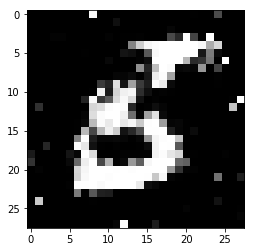

Number batches 468
36(0/468) D: 0.6011, G: 1.0442
36(1/468) D: 0.5884, G: 1.1110
36(2/468) D: 0.5866, G: 1.0989
36(3/468) D: 0.5679, G: 1.1324
36(4/468) D: 0.5276, G: 1.0296
36(5/468) D: 0.5428, G: 1.1729
36(6/468) D: 0.5235, G: 1.1886
36(7/468) D: 0.4896, G: 1.3690
36(8/468) D: 0.5079, G: 1.1475
36(9/468) D: 0.6706, G: 1.0333
36(10/468) D: 0.6700, G: 1.3266
36(11/468) D: 0.5150, G: 1.1321
36(12/468) D: 0.5211, G: 1.0874
36(13/468) D: 0.5915, G: 1.0147
36(14/468) D: 0.5881, G: 1.0438
36(15/468) D: 0.6337, G: 1.1530
36(16/468) D: 0.5175, G: 1.2932
36(17/468) D: 0.5417, G: 1.1873
36(18/468) D: 0.5702, G: 1.1004
36(19/468) D: 0.6144, G: 1.0119
36(20/468) D: 0.5202, G: 1.1387
36(21/468) D: 0.6160, G: 1.0545
36(22/468) D: 0.5595, G: 1.0402
36(23/468) D: 0.5311, G: 1.0989
36(24/468) D: 0.5306, G: 1.1793
36(25/468) D: 0.5856, G: 1.1101
36(26/468) D: 0.5315, G: 1.3045
36(27/468) D: 0.5431, G: 1.2041
36(28/468) D: 0.5558, G: 1.1705
36(29/468) D: 0.5538, G: 1.2078
36(30/468) D: 0.6165, G: 1.0374

36(252/468) D: 0.5424, G: 0.8708
36(253/468) D: 0.5906, G: 1.3578
36(254/468) D: 0.6184, G: 0.8459
36(255/468) D: 0.6087, G: 0.8346
36(256/468) D: 0.6198, G: 1.2155
36(257/468) D: 0.5136, G: 1.1876
36(258/468) D: 0.6129, G: 1.1379
36(259/468) D: 0.5358, G: 0.9812
36(260/468) D: 0.5804, G: 1.3117
36(261/468) D: 0.5741, G: 1.0151
36(262/468) D: 0.5563, G: 1.0340
36(263/468) D: 0.5854, G: 1.2516
36(264/468) D: 0.6011, G: 0.9978
36(265/468) D: 0.5351, G: 1.1731
36(266/468) D: 0.5791, G: 1.0368
36(267/468) D: 0.5646, G: 0.9859
36(268/468) D: 0.5612, G: 1.1083
36(269/468) D: 0.5226, G: 0.9176
36(270/468) D: 0.6174, G: 1.2062
36(271/468) D: 0.5688, G: 1.0574
36(272/468) D: 0.5357, G: 1.0420
36(273/468) D: 0.4820, G: 1.3260
36(274/468) D: 0.5384, G: 1.0637
36(275/468) D: 0.5445, G: 1.2000
36(276/468) D: 0.5894, G: 1.1013
36(277/468) D: 0.5848, G: 1.3934
36(278/468) D: 0.5295, G: 0.9433
36(279/468) D: 0.5888, G: 1.0335
36(280/468) D: 0.5559, G: 1.3528
36(281/468) D: 0.4956, G: 1.1710
36(282/468

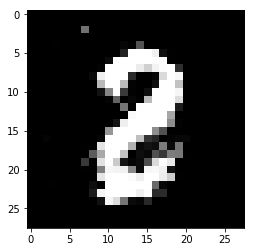

Number batches 468
37(0/468) D: 0.6365, G: 0.9271
37(1/468) D: 0.6596, G: 1.1958
37(2/468) D: 0.6248, G: 0.9523
37(3/468) D: 0.5808, G: 1.1275
37(4/468) D: 0.6065, G: 1.1862
37(5/468) D: 0.5690, G: 0.9771
37(6/468) D: 0.5536, G: 1.0344
37(7/468) D: 0.5080, G: 1.2117
37(8/468) D: 0.5284, G: 1.1823
37(9/468) D: 0.7008, G: 1.0994
37(10/468) D: 0.6328, G: 0.9800
37(11/468) D: 0.5551, G: 1.1858
37(12/468) D: 0.5351, G: 1.0688
37(13/468) D: 0.5762, G: 0.9748
37(14/468) D: 0.5819, G: 0.9877
37(15/468) D: 0.5788, G: 1.1950
37(16/468) D: 0.5436, G: 1.1230
37(17/468) D: 0.5830, G: 1.2748
37(18/468) D: 0.5726, G: 1.1768
37(19/468) D: 0.5273, G: 0.9795
37(20/468) D: 0.5806, G: 1.2310
37(21/468) D: 0.6147, G: 1.0931
37(22/468) D: 0.5785, G: 1.1487
37(23/468) D: 0.4919, G: 1.1701
37(24/468) D: 0.5861, G: 1.0204
37(25/468) D: 0.6188, G: 1.3314
37(26/468) D: 0.5299, G: 1.0544
37(27/468) D: 0.5428, G: 1.1215
37(28/468) D: 0.5403, G: 1.0673
37(29/468) D: 0.5539, G: 0.9744
37(30/468) D: 0.5792, G: 1.1268

37(252/468) D: 0.5716, G: 1.0926
37(253/468) D: 0.5559, G: 1.0720
37(254/468) D: 0.6147, G: 1.0991
37(255/468) D: 0.6674, G: 0.8288
37(256/468) D: 0.5955, G: 0.9779
37(257/468) D: 0.5400, G: 1.2906
37(258/468) D: 0.6175, G: 0.8887
37(259/468) D: 0.5600, G: 1.0767
37(260/468) D: 0.5560, G: 1.0625
37(261/468) D: 0.5453, G: 1.0767
37(262/468) D: 0.6084, G: 1.1633
37(263/468) D: 0.5852, G: 0.8960
37(264/468) D: 0.6063, G: 0.7906
37(265/468) D: 0.5978, G: 1.4715
37(266/468) D: 0.6489, G: 0.9535
37(267/468) D: 0.5349, G: 1.0239
37(268/468) D: 0.5892, G: 1.2380
37(269/468) D: 0.6202, G: 1.0491
37(270/468) D: 0.6146, G: 1.1012
37(271/468) D: 0.6171, G: 0.9696
37(272/468) D: 0.5803, G: 0.9840
37(273/468) D: 0.5622, G: 1.2303
37(274/468) D: 0.5207, G: 1.0033
37(275/468) D: 0.5012, G: 1.0940
37(276/468) D: 0.5508, G: 1.2705
37(277/468) D: 0.5429, G: 1.1164
37(278/468) D: 0.4993, G: 0.9857
37(279/468) D: 0.6370, G: 1.2675
37(280/468) D: 0.5728, G: 0.9374
37(281/468) D: 0.4937, G: 1.1688
37(282/468

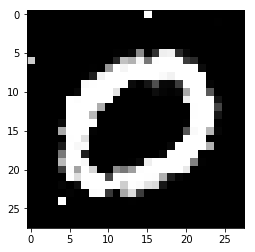

Number batches 468
38(0/468) D: 0.6119, G: 0.9957
38(1/468) D: 0.6042, G: 1.0605
38(2/468) D: 0.5990, G: 0.9648
38(3/468) D: 0.5901, G: 1.1619
38(4/468) D: 0.5693, G: 1.1355
38(5/468) D: 0.5741, G: 1.0119
38(6/468) D: 0.5346, G: 1.1296
38(7/468) D: 0.5487, G: 1.3428
38(8/468) D: 0.5152, G: 1.1357
38(9/468) D: 0.6695, G: 0.9376
38(10/468) D: 0.5878, G: 1.1122
38(11/468) D: 0.5676, G: 1.1424
38(12/468) D: 0.5550, G: 0.9969
38(13/468) D: 0.6122, G: 1.0461
38(14/468) D: 0.5718, G: 1.0462
38(15/468) D: 0.6869, G: 1.2325
38(16/468) D: 0.5279, G: 1.0021
38(17/468) D: 0.6196, G: 1.1933
38(18/468) D: 0.5369, G: 1.0624
38(19/468) D: 0.6278, G: 1.4550
38(20/468) D: 0.5185, G: 1.2100
38(21/468) D: 0.5887, G: 1.2206
38(22/468) D: 0.5968, G: 0.9669
38(23/468) D: 0.6115, G: 1.2529
38(24/468) D: 0.6265, G: 1.0840
38(25/468) D: 0.6084, G: 0.8897
38(26/468) D: 0.5600, G: 1.1115
38(27/468) D: 0.6071, G: 1.1663
38(28/468) D: 0.5281, G: 1.2463
38(29/468) D: 0.5753, G: 1.0444
38(30/468) D: 0.6052, G: 1.0684

38(252/468) D: 0.5978, G: 1.0022
38(253/468) D: 0.5740, G: 1.2556
38(254/468) D: 0.5911, G: 0.9752
38(255/468) D: 0.6284, G: 0.8816
38(256/468) D: 0.6125, G: 1.1851
38(257/468) D: 0.5603, G: 1.1922
38(258/468) D: 0.5977, G: 0.9579
38(259/468) D: 0.5909, G: 1.2047
38(260/468) D: 0.6151, G: 1.2454
38(261/468) D: 0.6200, G: 0.8157
38(262/468) D: 0.6283, G: 0.9597
38(263/468) D: 0.6190, G: 1.2498
38(264/468) D: 0.6526, G: 1.0312
38(265/468) D: 0.5821, G: 0.9645
38(266/468) D: 0.6149, G: 1.1920
38(267/468) D: 0.5511, G: 1.0604
38(268/468) D: 0.5859, G: 1.0472
38(269/468) D: 0.5598, G: 1.0915
38(270/468) D: 0.6488, G: 0.8504
38(271/468) D: 0.6372, G: 0.9629
38(272/468) D: 0.5885, G: 1.0703
38(273/468) D: 0.5487, G: 1.1323
38(274/468) D: 0.5248, G: 0.9883
38(275/468) D: 0.5180, G: 1.1071
38(276/468) D: 0.5981, G: 1.0193
38(277/468) D: 0.5279, G: 1.1125
38(278/468) D: 0.5266, G: 0.9714
38(279/468) D: 0.5776, G: 0.9773
38(280/468) D: 0.5320, G: 1.2141
38(281/468) D: 0.5263, G: 0.9220
38(282/468

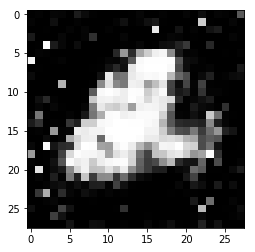

Number batches 468
39(0/468) D: 0.5720, G: 1.0246
39(1/468) D: 0.5931, G: 1.1838
39(2/468) D: 0.5737, G: 0.8739
39(3/468) D: 0.6286, G: 1.3976
39(4/468) D: 0.6018, G: 1.0227
39(5/468) D: 0.6026, G: 0.9980
39(6/468) D: 0.5358, G: 0.9389
39(7/468) D: 0.5530, G: 1.2595
39(8/468) D: 0.5669, G: 0.9970
39(9/468) D: 0.6129, G: 0.9920
39(10/468) D: 0.6489, G: 1.0895
39(11/468) D: 0.5571, G: 1.1626
39(12/468) D: 0.5711, G: 1.0545
39(13/468) D: 0.6060, G: 0.9209
39(14/468) D: 0.5851, G: 1.1855
39(15/468) D: 0.6150, G: 1.1642
39(16/468) D: 0.5679, G: 0.9962
39(17/468) D: 0.5440, G: 1.1288
39(18/468) D: 0.5605, G: 1.0675
39(19/468) D: 0.5796, G: 1.1390
39(20/468) D: 0.4971, G: 1.1738
39(21/468) D: 0.5847, G: 1.1142
39(22/468) D: 0.5590, G: 0.9504
39(23/468) D: 0.5306, G: 1.3722
39(24/468) D: 0.5705, G: 0.9969
39(25/468) D: 0.6186, G: 1.0558
39(26/468) D: 0.5614, G: 1.1455
39(27/468) D: 0.5836, G: 1.0462
39(28/468) D: 0.5434, G: 1.1055
39(29/468) D: 0.5490, G: 1.0116
39(30/468) D: 0.5518, G: 1.0307

39(252/468) D: 0.5687, G: 1.2376
39(253/468) D: 0.5335, G: 1.2669
39(254/468) D: 0.5516, G: 0.9622
39(255/468) D: 0.6337, G: 0.8757
39(256/468) D: 0.5925, G: 1.3282
39(257/468) D: 0.5541, G: 1.2978
39(258/468) D: 0.6112, G: 0.8884
39(259/468) D: 0.5659, G: 1.1396
39(260/468) D: 0.5289, G: 1.0457
39(261/468) D: 0.5509, G: 1.1369
39(262/468) D: 0.5815, G: 1.0384
39(263/468) D: 0.5512, G: 1.0048
39(264/468) D: 0.6582, G: 1.3491
39(265/468) D: 0.5364, G: 1.0065
39(266/468) D: 0.6273, G: 0.9860
39(267/468) D: 0.5841, G: 1.4329
39(268/468) D: 0.6268, G: 1.0098
39(269/468) D: 0.5814, G: 0.9016
39(270/468) D: 0.6467, G: 1.1594
39(271/468) D: 0.6457, G: 1.0729
39(272/468) D: 0.5752, G: 1.0892
39(273/468) D: 0.5755, G: 1.1272
39(274/468) D: 0.5283, G: 1.1291
39(275/468) D: 0.5403, G: 1.1380
39(276/468) D: 0.5728, G: 1.0513
39(277/468) D: 0.5597, G: 1.2484
39(278/468) D: 0.5298, G: 1.0122
39(279/468) D: 0.5882, G: 0.9873
39(280/468) D: 0.6124, G: 1.4897
39(281/468) D: 0.5783, G: 0.8588
39(282/468

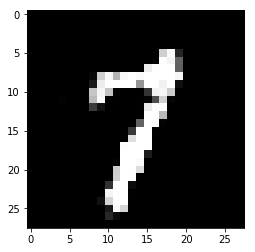

Number batches 468
40(0/468) D: 0.6434, G: 0.9783
40(1/468) D: 0.6439, G: 1.0768
40(2/468) D: 0.6353, G: 1.0502
40(3/468) D: 0.5503, G: 1.0414
40(4/468) D: 0.5551, G: 1.1364
40(5/468) D: 0.5263, G: 1.0528
40(6/468) D: 0.5638, G: 1.1417
40(7/468) D: 0.5166, G: 1.1957
40(8/468) D: 0.6067, G: 1.1322
40(9/468) D: 0.6606, G: 0.8868
40(10/468) D: 0.7338, G: 1.2346
40(11/468) D: 0.5814, G: 1.1277
40(12/468) D: 0.5148, G: 0.9603
40(13/468) D: 0.6140, G: 1.0780
40(14/468) D: 0.5741, G: 1.1931
40(15/468) D: 0.5828, G: 1.0631
40(16/468) D: 0.5481, G: 1.0120
40(17/468) D: 0.5301, G: 0.9822
40(18/468) D: 0.6282, G: 1.3779
40(19/468) D: 0.6179, G: 1.0033
40(20/468) D: 0.5298, G: 0.9119
40(21/468) D: 0.5748, G: 1.2607
40(22/468) D: 0.5227, G: 1.1030
40(23/468) D: 0.5149, G: 0.9827
40(24/468) D: 0.5663, G: 1.1969
40(25/468) D: 0.6440, G: 0.9746
40(26/468) D: 0.5636, G: 1.0959
40(27/468) D: 0.5455, G: 1.4174
40(28/468) D: 0.5616, G: 1.1508
40(29/468) D: 0.6052, G: 0.9402
40(30/468) D: 0.6589, G: 1.0537

40(252/468) D: 0.5640, G: 0.9023
40(253/468) D: 0.6012, G: 1.1893
40(254/468) D: 0.6185, G: 1.0768
40(255/468) D: 0.6023, G: 0.7834
40(256/468) D: 0.6633, G: 1.2342
40(257/468) D: 0.5124, G: 1.2519
40(258/468) D: 0.6246, G: 0.8585
40(259/468) D: 0.5833, G: 1.1096
40(260/468) D: 0.5498, G: 1.0657
40(261/468) D: 0.5823, G: 0.9643
40(262/468) D: 0.5901, G: 1.1083
40(263/468) D: 0.5979, G: 1.1567
40(264/468) D: 0.5909, G: 1.0065
40(265/468) D: 0.5797, G: 1.0053
40(266/468) D: 0.6051, G: 1.1641
40(267/468) D: 0.5557, G: 1.1718
40(268/468) D: 0.5837, G: 1.2646
40(269/468) D: 0.5976, G: 0.9085
40(270/468) D: 0.6293, G: 1.0102
40(271/468) D: 0.6259, G: 1.0398
40(272/468) D: 0.5700, G: 1.0110
40(273/468) D: 0.5542, G: 1.1053
40(274/468) D: 0.5523, G: 1.0927
40(275/468) D: 0.5453, G: 1.1688
40(276/468) D: 0.5687, G: 1.2915
40(277/468) D: 0.5281, G: 1.0450
40(278/468) D: 0.5821, G: 1.1460
40(279/468) D: 0.5918, G: 0.8975
40(280/468) D: 0.5873, G: 1.3333
40(281/468) D: 0.5899, G: 1.1292
40(282/468

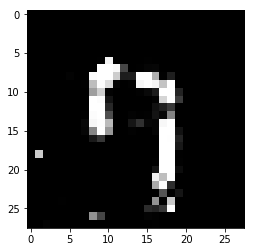

Number batches 468
41(0/468) D: 0.6210, G: 1.1655
41(1/468) D: 0.5928, G: 1.0501
41(2/468) D: 0.6618, G: 0.9803
41(3/468) D: 0.6060, G: 0.9989
41(4/468) D: 0.5509, G: 0.9818
41(5/468) D: 0.5613, G: 0.9938
41(6/468) D: 0.5523, G: 1.1147
41(7/468) D: 0.5224, G: 1.0663
41(8/468) D: 0.5602, G: 1.0109
41(9/468) D: 0.6713, G: 0.8824
41(10/468) D: 0.6906, G: 1.2120
41(11/468) D: 0.5580, G: 1.0036
41(12/468) D: 0.5493, G: 1.1330
41(13/468) D: 0.6065, G: 0.9158
41(14/468) D: 0.6544, G: 1.2779
41(15/468) D: 0.6041, G: 1.0553
41(16/468) D: 0.5318, G: 0.9171
41(17/468) D: 0.5902, G: 1.2303
41(18/468) D: 0.5737, G: 1.2877
41(19/468) D: 0.6449, G: 0.9884
41(20/468) D: 0.5146, G: 1.2065
41(21/468) D: 0.5594, G: 0.9968
41(22/468) D: 0.5981, G: 1.1797
41(23/468) D: 0.5516, G: 1.2457
41(24/468) D: 0.5450, G: 0.9123
41(25/468) D: 0.5939, G: 1.0420
41(26/468) D: 0.5879, G: 1.4149
41(27/468) D: 0.5877, G: 1.0476
41(28/468) D: 0.5071, G: 0.9758
41(29/468) D: 0.6001, G: 1.2379
41(30/468) D: 0.6106, G: 1.0081

41(252/468) D: 0.6539, G: 0.9500
41(253/468) D: 0.5884, G: 1.1841
41(254/468) D: 0.5801, G: 1.0772
41(255/468) D: 0.6935, G: 0.8565
41(256/468) D: 0.5795, G: 0.9172
41(257/468) D: 0.5753, G: 1.3274
41(258/468) D: 0.6740, G: 0.8167
41(259/468) D: 0.6166, G: 1.1151
41(260/468) D: 0.5405, G: 1.0086
41(261/468) D: 0.5670, G: 0.9916
41(262/468) D: 0.5486, G: 1.0496
41(263/468) D: 0.5969, G: 1.0000
41(264/468) D: 0.6393, G: 1.2911
41(265/468) D: 0.5908, G: 0.9807
41(266/468) D: 0.5937, G: 1.2447
41(267/468) D: 0.5596, G: 0.9599
41(268/468) D: 0.6347, G: 1.1625
41(269/468) D: 0.6037, G: 1.0542
41(270/468) D: 0.6119, G: 0.8967
41(271/468) D: 0.6531, G: 1.0743
41(272/468) D: 0.5815, G: 0.9843
41(273/468) D: 0.6017, G: 1.1862
41(274/468) D: 0.5217, G: 1.0778
41(275/468) D: 0.5161, G: 1.0834
41(276/468) D: 0.5415, G: 1.0365
41(277/468) D: 0.5985, G: 1.5715
41(278/468) D: 0.5927, G: 1.0926
41(279/468) D: 0.6245, G: 0.9292
41(280/468) D: 0.6264, G: 1.0628
41(281/468) D: 0.5813, G: 1.1692
41(282/468

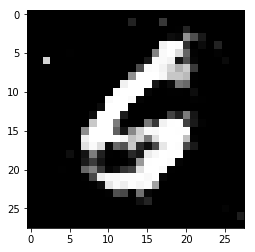

Number batches 468
42(0/468) D: 0.6768, G: 1.0721
42(1/468) D: 0.6238, G: 0.9597
42(2/468) D: 0.6569, G: 0.9399
42(3/468) D: 0.6084, G: 0.9719
42(4/468) D: 0.6098, G: 1.0413
42(5/468) D: 0.5926, G: 1.0291
42(6/468) D: 0.5856, G: 0.9605
42(7/468) D: 0.5711, G: 1.1507
42(8/468) D: 0.5697, G: 1.1331
42(9/468) D: 0.6266, G: 0.8942
42(10/468) D: 0.6655, G: 0.9819
42(11/468) D: 0.5873, G: 1.0838
42(12/468) D: 0.5653, G: 1.0543
42(13/468) D: 0.5954, G: 0.9652
42(14/468) D: 0.6137, G: 1.1832
42(15/468) D: 0.5968, G: 1.0540
42(16/468) D: 0.5671, G: 0.9501
42(17/468) D: 0.5665, G: 1.1389
42(18/468) D: 0.5792, G: 1.0629
42(19/468) D: 0.5832, G: 0.9470
42(20/468) D: 0.5200, G: 1.0877
42(21/468) D: 0.6147, G: 1.1253
42(22/468) D: 0.5269, G: 0.9296
42(23/468) D: 0.5506, G: 1.1052
42(24/468) D: 0.5939, G: 0.9930
42(25/468) D: 0.5965, G: 0.9471
42(26/468) D: 0.5469, G: 1.1915
42(27/468) D: 0.5750, G: 0.9610
42(28/468) D: 0.5618, G: 1.0049
42(29/468) D: 0.5545, G: 0.9904
42(30/468) D: 0.6356, G: 1.0636

42(252/468) D: 0.5680, G: 1.0218
42(253/468) D: 0.5469, G: 1.0800
42(254/468) D: 0.6152, G: 1.0585
42(255/468) D: 0.6245, G: 0.8132
42(256/468) D: 0.6242, G: 1.1300
42(257/468) D: 0.5412, G: 1.0818
42(258/468) D: 0.6281, G: 1.1222
42(259/468) D: 0.5743, G: 1.1892
42(260/468) D: 0.5672, G: 0.9477
42(261/468) D: 0.5982, G: 1.0121
42(262/468) D: 0.5742, G: 1.0782
42(263/468) D: 0.5374, G: 0.9900
42(264/468) D: 0.6494, G: 1.0154
42(265/468) D: 0.6026, G: 1.0249
42(266/468) D: 0.6099, G: 0.9733
42(267/468) D: 0.5717, G: 0.9698
42(268/468) D: 0.6058, G: 1.0208
42(269/468) D: 0.5535, G: 1.0026
42(270/468) D: 0.5828, G: 0.8770
42(271/468) D: 0.6212, G: 1.0105
42(272/468) D: 0.5718, G: 1.0262
42(273/468) D: 0.5778, G: 1.0546
42(274/468) D: 0.5140, G: 1.1281
42(275/468) D: 0.5016, G: 1.0924
42(276/468) D: 0.6226, G: 1.1617
42(277/468) D: 0.5345, G: 1.1855
42(278/468) D: 0.5800, G: 1.1379
42(279/468) D: 0.6489, G: 1.1562
42(280/468) D: 0.5876, G: 1.1937
42(281/468) D: 0.5699, G: 0.9885
42(282/468

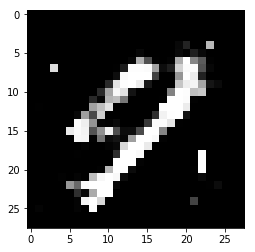

Number batches 468
43(0/468) D: 0.6335, G: 0.9185
43(1/468) D: 0.6273, G: 1.0466
43(2/468) D: 0.5860, G: 0.7643
43(3/468) D: 0.6093, G: 1.2043
43(4/468) D: 0.6041, G: 1.0213
43(5/468) D: 0.5969, G: 0.9617
43(6/468) D: 0.5856, G: 1.1348
43(7/468) D: 0.5229, G: 0.9394
43(8/468) D: 0.5759, G: 1.0156
43(9/468) D: 0.6770, G: 1.0662
43(10/468) D: 0.6720, G: 0.9946
43(11/468) D: 0.5633, G: 1.0490
43(12/468) D: 0.5256, G: 1.0969
43(13/468) D: 0.5571, G: 0.9399
43(14/468) D: 0.6210, G: 1.0704
43(15/468) D: 0.6259, G: 1.0002
43(16/468) D: 0.5765, G: 1.0688
43(17/468) D: 0.5968, G: 0.9733
43(18/468) D: 0.6050, G: 1.0636
43(19/468) D: 0.5871, G: 1.0331
43(20/468) D: 0.5492, G: 0.9875
43(21/468) D: 0.6166, G: 1.0821
43(22/468) D: 0.6033, G: 1.0281
43(23/468) D: 0.5484, G: 1.2794
43(24/468) D: 0.5781, G: 0.8750
43(25/468) D: 0.6324, G: 0.9387
43(26/468) D: 0.5555, G: 1.0605
43(27/468) D: 0.5535, G: 1.0141
43(28/468) D: 0.5674, G: 1.2174
43(29/468) D: 0.6410, G: 0.9166
43(30/468) D: 0.6297, G: 0.9993

43(252/468) D: 0.6156, G: 0.8850
43(253/468) D: 0.5840, G: 1.0512
43(254/468) D: 0.6115, G: 1.0154
43(255/468) D: 0.6216, G: 0.8111
43(256/468) D: 0.6718, G: 1.1887
43(257/468) D: 0.5585, G: 1.0817
43(258/468) D: 0.6152, G: 1.0024
43(259/468) D: 0.5723, G: 1.0293
43(260/468) D: 0.6315, G: 1.0275
43(261/468) D: 0.5366, G: 0.8726
43(262/468) D: 0.6123, G: 1.1022
43(263/468) D: 0.6335, G: 1.0195
43(264/468) D: 0.5835, G: 0.8965
43(265/468) D: 0.6178, G: 1.3613
43(266/468) D: 0.6234, G: 0.8117
43(267/468) D: 0.5705, G: 1.0849
43(268/468) D: 0.5734, G: 1.2139
43(269/468) D: 0.5965, G: 0.9631
43(270/468) D: 0.6178, G: 0.8919
43(271/468) D: 0.6136, G: 0.8698
43(272/468) D: 0.5982, G: 1.0111
43(273/468) D: 0.5562, G: 1.1000
43(274/468) D: 0.5746, G: 1.0332
43(275/468) D: 0.5262, G: 1.0669
43(276/468) D: 0.5815, G: 1.0485
43(277/468) D: 0.5833, G: 1.4081
43(278/468) D: 0.5610, G: 0.8632
43(279/468) D: 0.6367, G: 1.1120
43(280/468) D: 0.5302, G: 1.0795
43(281/468) D: 0.5359, G: 1.0772
43(282/468

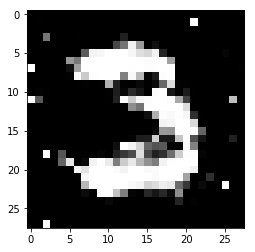

Number batches 468
44(0/468) D: 0.6714, G: 0.8666
44(1/468) D: 0.6197, G: 1.0089
44(2/468) D: 0.6020, G: 1.0667
44(3/468) D: 0.6069, G: 0.8795
44(4/468) D: 0.5703, G: 0.8884
44(5/468) D: 0.5731, G: 1.1315
44(6/468) D: 0.5760, G: 1.1500
44(7/468) D: 0.5384, G: 1.2019
44(8/468) D: 0.5577, G: 0.9934
44(9/468) D: 0.6401, G: 0.9331
44(10/468) D: 0.6545, G: 1.0671
44(11/468) D: 0.5470, G: 0.9416
44(12/468) D: 0.5502, G: 1.0503
44(13/468) D: 0.5806, G: 0.9076
44(14/468) D: 0.6603, G: 1.3154
44(15/468) D: 0.6816, G: 1.0595
44(16/468) D: 0.5812, G: 0.9502
44(17/468) D: 0.5702, G: 1.0125
44(18/468) D: 0.6165, G: 1.1538
44(19/468) D: 0.5609, G: 0.9554
44(20/468) D: 0.5872, G: 1.0817
44(21/468) D: 0.6067, G: 1.2214
44(22/468) D: 0.5938, G: 0.9796
44(23/468) D: 0.5465, G: 1.0009
44(24/468) D: 0.5006, G: 1.0615
44(25/468) D: 0.5815, G: 1.0742
44(26/468) D: 0.5625, G: 1.1371
44(27/468) D: 0.5661, G: 1.3238
44(28/468) D: 0.5627, G: 1.0297
44(29/468) D: 0.5929, G: 1.2238
44(30/468) D: 0.5856, G: 0.9552

44(252/468) D: 0.6427, G: 1.0567
44(253/468) D: 0.5766, G: 1.1333
44(254/468) D: 0.6406, G: 0.9558
44(255/468) D: 0.6259, G: 0.8301
44(256/468) D: 0.6297, G: 1.2386
44(257/468) D: 0.5572, G: 1.1784
44(258/468) D: 0.6381, G: 0.8488
44(259/468) D: 0.6326, G: 1.1063
44(260/468) D: 0.5998, G: 1.0132
44(261/468) D: 0.5881, G: 0.9723
44(262/468) D: 0.6141, G: 0.9157
44(263/468) D: 0.6342, G: 1.0978
44(264/468) D: 0.6524, G: 0.9750
44(265/468) D: 0.6006, G: 1.0051
44(266/468) D: 0.5924, G: 1.2066
44(267/468) D: 0.5752, G: 1.1330
44(268/468) D: 0.5874, G: 0.9286
44(269/468) D: 0.5921, G: 0.9573
44(270/468) D: 0.5982, G: 1.1101
44(271/468) D: 0.6085, G: 1.0023
44(272/468) D: 0.5617, G: 0.9533
44(273/468) D: 0.5696, G: 1.1941
44(274/468) D: 0.5579, G: 0.9901
44(275/468) D: 0.5532, G: 1.1166
44(276/468) D: 0.5834, G: 1.1590
44(277/468) D: 0.5727, G: 1.1457
44(278/468) D: 0.5882, G: 1.2597
44(279/468) D: 0.6300, G: 1.0199
44(280/468) D: 0.5698, G: 0.9369
44(281/468) D: 0.5404, G: 1.0162
44(282/468

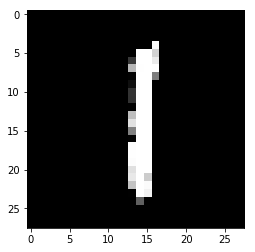

Number batches 468
45(0/468) D: 0.6325, G: 0.8477
45(1/468) D: 0.6229, G: 0.9020
45(2/468) D: 0.5920, G: 0.9497
45(3/468) D: 0.5840, G: 0.9747
45(4/468) D: 0.5818, G: 1.0456
45(5/468) D: 0.5743, G: 1.0964
45(6/468) D: 0.5486, G: 1.1497
45(7/468) D: 0.5434, G: 0.9860
45(8/468) D: 0.5817, G: 1.0433
45(9/468) D: 0.6119, G: 0.9511
45(10/468) D: 0.6459, G: 1.0162
45(11/468) D: 0.5563, G: 1.0195
45(12/468) D: 0.5610, G: 1.2007
45(13/468) D: 0.6099, G: 0.9535
45(14/468) D: 0.5900, G: 1.0756
45(15/468) D: 0.6409, G: 1.0544
45(16/468) D: 0.5408, G: 1.1143
45(17/468) D: 0.5684, G: 1.0616
45(18/468) D: 0.6020, G: 1.0630
45(19/468) D: 0.6072, G: 0.8644
45(20/468) D: 0.5904, G: 1.0975
45(21/468) D: 0.5857, G: 1.1100
45(22/468) D: 0.5728, G: 1.0036
45(23/468) D: 0.5062, G: 1.0217
45(24/468) D: 0.5736, G: 1.0844
45(25/468) D: 0.6201, G: 0.8491
45(26/468) D: 0.5777, G: 1.1798
45(27/468) D: 0.5351, G: 1.2061
45(28/468) D: 0.5971, G: 1.0103
45(29/468) D: 0.5873, G: 1.1104
45(30/468) D: 0.6633, G: 1.2727

45(252/468) D: 0.5838, G: 1.0813
45(253/468) D: 0.5715, G: 1.1577
45(254/468) D: 0.5769, G: 0.9866
45(255/468) D: 0.6367, G: 0.7653
45(256/468) D: 0.6253, G: 1.1684
45(257/468) D: 0.5941, G: 1.2533
45(258/468) D: 0.5988, G: 0.8685
45(259/468) D: 0.5835, G: 1.0349
45(260/468) D: 0.5912, G: 1.1307
45(261/468) D: 0.5379, G: 0.9176
45(262/468) D: 0.5827, G: 1.1327
45(263/468) D: 0.6048, G: 1.0971
45(264/468) D: 0.6472, G: 0.8614
45(265/468) D: 0.6103, G: 1.2674
45(266/468) D: 0.5778, G: 1.1195
45(267/468) D: 0.5863, G: 0.9612
45(268/468) D: 0.5988, G: 0.9762
45(269/468) D: 0.6227, G: 1.0035
45(270/468) D: 0.6349, G: 0.9974
45(271/468) D: 0.6265, G: 0.9179
45(272/468) D: 0.5857, G: 1.1050
45(273/468) D: 0.5702, G: 1.0276
45(274/468) D: 0.5828, G: 1.0501
45(275/468) D: 0.5793, G: 1.0131
45(276/468) D: 0.5826, G: 1.0234
45(277/468) D: 0.5241, G: 1.0911
45(278/468) D: 0.5555, G: 1.1367
45(279/468) D: 0.6407, G: 0.8571
45(280/468) D: 0.5964, G: 1.0915
45(281/468) D: 0.5264, G: 0.9479
45(282/468

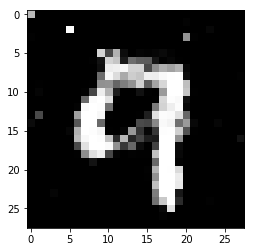

Number batches 468
46(0/468) D: 0.6439, G: 0.9090
46(1/468) D: 0.6572, G: 1.1895
46(2/468) D: 0.6141, G: 0.9459
46(3/468) D: 0.6236, G: 0.9726
46(4/468) D: 0.6095, G: 0.8501
46(5/468) D: 0.5775, G: 1.0669
46(6/468) D: 0.5664, G: 1.0905
46(7/468) D: 0.5382, G: 1.0142
46(8/468) D: 0.5590, G: 1.0101
46(9/468) D: 0.6839, G: 0.9356
46(10/468) D: 0.6449, G: 1.1587
46(11/468) D: 0.5974, G: 0.9745
46(12/468) D: 0.5276, G: 0.9489
46(13/468) D: 0.5741, G: 1.2350
46(14/468) D: 0.5948, G: 1.0636
46(15/468) D: 0.5853, G: 0.9358
46(16/468) D: 0.5834, G: 1.2360
46(17/468) D: 0.5551, G: 1.0441
46(18/468) D: 0.5736, G: 1.0361
46(19/468) D: 0.6360, G: 1.0733
46(20/468) D: 0.5772, G: 1.0258
46(21/468) D: 0.6142, G: 1.0234
46(22/468) D: 0.5579, G: 0.9823
46(23/468) D: 0.5429, G: 1.1666
46(24/468) D: 0.5343, G: 0.9563
46(25/468) D: 0.6065, G: 1.0641
46(26/468) D: 0.5596, G: 1.1628
46(27/468) D: 0.6056, G: 0.9034
46(28/468) D: 0.5883, G: 1.2696
46(29/468) D: 0.5961, G: 1.0478
46(30/468) D: 0.6330, G: 0.9905

46(252/468) D: 0.6124, G: 1.0673
46(253/468) D: 0.5378, G: 1.1766
46(254/468) D: 0.5895, G: 1.0140
46(255/468) D: 0.6269, G: 0.8903
46(256/468) D: 0.6461, G: 1.1839
46(257/468) D: 0.5569, G: 0.9777
46(258/468) D: 0.6246, G: 0.9116
46(259/468) D: 0.6023, G: 1.0791
46(260/468) D: 0.5879, G: 0.8940
46(261/468) D: 0.6210, G: 1.0110
46(262/468) D: 0.5826, G: 1.0898
46(263/468) D: 0.6247, G: 0.9239
46(264/468) D: 0.6334, G: 0.9910
46(265/468) D: 0.5742, G: 1.0238
46(266/468) D: 0.6168, G: 1.0113
46(267/468) D: 0.5281, G: 1.0833
46(268/468) D: 0.5855, G: 1.0332
46(269/468) D: 0.5731, G: 0.9620
46(270/468) D: 0.6326, G: 0.8924
46(271/468) D: 0.6373, G: 1.1255
46(272/468) D: 0.5876, G: 1.0474
46(273/468) D: 0.5779, G: 1.0845
46(274/468) D: 0.5343, G: 1.0861
46(275/468) D: 0.6328, G: 1.0697
46(276/468) D: 0.6125, G: 1.0386
46(277/468) D: 0.5640, G: 1.0906
46(278/468) D: 0.5518, G: 1.0067
46(279/468) D: 0.5947, G: 0.9693
46(280/468) D: 0.5667, G: 1.0842
46(281/468) D: 0.6055, G: 1.0716
46(282/468

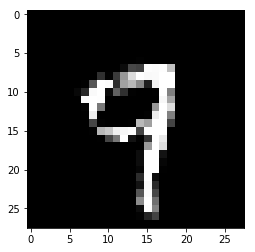

Number batches 468
47(0/468) D: 0.6808, G: 0.8466
47(1/468) D: 0.6951, G: 0.9839
47(2/468) D: 0.6524, G: 1.1041
47(3/468) D: 0.5798, G: 0.9433
47(4/468) D: 0.5850, G: 1.0216
47(5/468) D: 0.5331, G: 0.9915
47(6/468) D: 0.5156, G: 1.0640
47(7/468) D: 0.5654, G: 1.0945
47(8/468) D: 0.5533, G: 1.0247
47(9/468) D: 0.7006, G: 1.0339
47(10/468) D: 0.6291, G: 1.0527
47(11/468) D: 0.5825, G: 1.0690
47(12/468) D: 0.5696, G: 1.0755
47(13/468) D: 0.6165, G: 0.9539
47(14/468) D: 0.5777, G: 0.9162
47(15/468) D: 0.6402, G: 1.2139
47(16/468) D: 0.5559, G: 0.9515
47(17/468) D: 0.5805, G: 0.9505
47(18/468) D: 0.5821, G: 1.1011
47(19/468) D: 0.6398, G: 0.8080
47(20/468) D: 0.5951, G: 1.1926
47(21/468) D: 0.6042, G: 0.9814
47(22/468) D: 0.5270, G: 0.9400
47(23/468) D: 0.5247, G: 1.1553
47(24/468) D: 0.5732, G: 1.1131
47(25/468) D: 0.6226, G: 0.8082
47(26/468) D: 0.6078, G: 1.3271
47(27/468) D: 0.5673, G: 1.0690
47(28/468) D: 0.5950, G: 1.0507
47(29/468) D: 0.5868, G: 1.0111
47(30/468) D: 0.6393, G: 0.9797

47(252/468) D: 0.6216, G: 1.1106
47(253/468) D: 0.6177, G: 1.1671
47(254/468) D: 0.6096, G: 0.8997
47(255/468) D: 0.6851, G: 0.7707
47(256/468) D: 0.6804, G: 1.1539
47(257/468) D: 0.5404, G: 1.1128
47(258/468) D: 0.5909, G: 0.8153
47(259/468) D: 0.5669, G: 0.9547
47(260/468) D: 0.6028, G: 1.1416
47(261/468) D: 0.5312, G: 1.0706
47(262/468) D: 0.6120, G: 0.9217
47(263/468) D: 0.5698, G: 0.9390
47(264/468) D: 0.6774, G: 1.0047
47(265/468) D: 0.6165, G: 1.0047
47(266/468) D: 0.6126, G: 1.0951
47(267/468) D: 0.5358, G: 1.0679
47(268/468) D: 0.5398, G: 1.0149
47(269/468) D: 0.5573, G: 0.9998
47(270/468) D: 0.5810, G: 0.8867
47(271/468) D: 0.5885, G: 1.1211
47(272/468) D: 0.6091, G: 1.0219
47(273/468) D: 0.6362, G: 1.0739
47(274/468) D: 0.5626, G: 1.0229
47(275/468) D: 0.5380, G: 1.0094
47(276/468) D: 0.5853, G: 1.1118
47(277/468) D: 0.5896, G: 1.0491
47(278/468) D: 0.5900, G: 1.0951
47(279/468) D: 0.6495, G: 0.8751
47(280/468) D: 0.6280, G: 1.1793
47(281/468) D: 0.5390, G: 1.1905
47(282/468

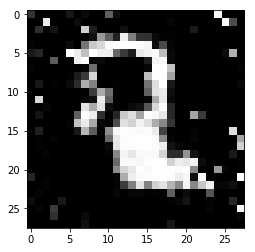

Number batches 468
48(0/468) D: 0.6170, G: 0.8646
48(1/468) D: 0.6220, G: 0.9182
48(2/468) D: 0.6169, G: 1.0880
48(3/468) D: 0.5708, G: 1.0013
48(4/468) D: 0.5716, G: 0.9478
48(5/468) D: 0.5847, G: 1.0651
48(6/468) D: 0.5705, G: 1.0205
48(7/468) D: 0.5402, G: 1.1123
48(8/468) D: 0.6087, G: 1.1601
48(9/468) D: 0.6750, G: 0.8629
48(10/468) D: 0.6454, G: 0.9660
48(11/468) D: 0.5829, G: 1.2290
48(12/468) D: 0.5869, G: 0.9709
48(13/468) D: 0.5686, G: 0.9163
48(14/468) D: 0.5812, G: 1.1860
48(15/468) D: 0.6424, G: 0.9882
48(16/468) D: 0.5945, G: 1.0230
48(17/468) D: 0.5521, G: 1.2029
48(18/468) D: 0.6154, G: 0.8824
48(19/468) D: 0.6267, G: 1.1575
48(20/468) D: 0.5723, G: 0.9568
48(21/468) D: 0.5595, G: 1.0429
48(22/468) D: 0.5934, G: 1.0242
48(23/468) D: 0.4823, G: 1.0856
48(24/468) D: 0.5960, G: 1.0347
48(25/468) D: 0.5852, G: 0.7635
48(26/468) D: 0.6297, G: 1.4607
48(27/468) D: 0.6046, G: 1.0861
48(28/468) D: 0.5949, G: 1.0205
48(29/468) D: 0.6061, G: 0.8309
48(30/468) D: 0.5861, G: 1.0019

48(252/468) D: 0.6223, G: 0.8909
48(253/468) D: 0.5861, G: 1.2521
48(254/468) D: 0.6243, G: 0.9629
48(255/468) D: 0.6446, G: 0.8048
48(256/468) D: 0.6278, G: 1.1277
48(257/468) D: 0.5710, G: 1.1229
48(258/468) D: 0.6909, G: 1.0207
48(259/468) D: 0.5790, G: 0.9599
48(260/468) D: 0.5888, G: 0.9319
48(261/468) D: 0.5335, G: 0.9897
48(262/468) D: 0.5683, G: 1.1078
48(263/468) D: 0.6419, G: 1.0066
48(264/468) D: 0.6280, G: 0.8342
48(265/468) D: 0.5744, G: 1.0963
48(266/468) D: 0.5664, G: 1.0860
48(267/468) D: 0.5484, G: 0.9775
48(268/468) D: 0.6504, G: 1.0753
48(269/468) D: 0.6116, G: 1.0756
48(270/468) D: 0.5779, G: 0.8317
48(271/468) D: 0.6665, G: 1.0227
48(272/468) D: 0.5833, G: 1.0911
48(273/468) D: 0.5802, G: 0.9450
48(274/468) D: 0.5269, G: 1.0881
48(275/468) D: 0.5439, G: 1.0269
48(276/468) D: 0.5667, G: 0.9198
48(277/468) D: 0.5456, G: 1.2276
48(278/468) D: 0.5234, G: 0.9123
48(279/468) D: 0.5950, G: 0.9521
48(280/468) D: 0.6116, G: 1.1797
48(281/468) D: 0.5446, G: 1.0618
48(282/468

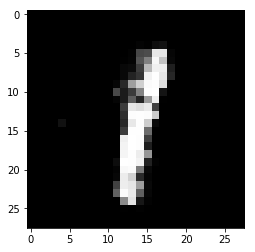

Number batches 468
49(0/468) D: 0.6410, G: 1.0218
49(1/468) D: 0.6193, G: 0.9311
49(2/468) D: 0.6706, G: 1.0051
49(3/468) D: 0.6393, G: 1.0491
49(4/468) D: 0.6695, G: 0.9138
49(5/468) D: 0.6026, G: 0.8905
49(6/468) D: 0.5677, G: 1.0403
49(7/468) D: 0.5729, G: 1.0744
49(8/468) D: 0.5943, G: 1.0050
49(9/468) D: 0.6205, G: 0.9255
49(10/468) D: 0.6261, G: 0.9885
49(11/468) D: 0.6087, G: 0.9931
49(12/468) D: 0.5622, G: 1.0559
49(13/468) D: 0.6408, G: 1.0146
49(14/468) D: 0.5936, G: 1.0626
49(15/468) D: 0.6604, G: 0.9405
49(16/468) D: 0.6074, G: 0.9316
49(17/468) D: 0.5676, G: 1.0979
49(18/468) D: 0.6293, G: 1.0881
49(19/468) D: 0.6634, G: 0.9261
49(20/468) D: 0.5809, G: 0.9823
49(21/468) D: 0.6347, G: 0.9986
49(22/468) D: 0.6072, G: 0.9226
49(23/468) D: 0.5523, G: 1.0253
49(24/468) D: 0.5941, G: 1.0417
49(25/468) D: 0.6239, G: 0.8082
49(26/468) D: 0.6226, G: 1.1226
49(27/468) D: 0.5982, G: 1.1169
49(28/468) D: 0.5718, G: 1.0687
49(29/468) D: 0.5956, G: 0.9742
49(30/468) D: 0.6118, G: 1.0940

49(252/468) D: 0.6047, G: 1.0088
49(253/468) D: 0.5553, G: 1.1756
49(254/468) D: 0.6231, G: 1.0379
49(255/468) D: 0.6817, G: 0.7935
49(256/468) D: 0.5954, G: 1.0158
49(257/468) D: 0.5571, G: 1.2135
49(258/468) D: 0.6282, G: 0.9048
49(259/468) D: 0.6277, G: 1.1113
49(260/468) D: 0.5985, G: 1.0387
49(261/468) D: 0.6038, G: 0.9636
49(262/468) D: 0.5720, G: 0.9822
49(263/468) D: 0.5777, G: 1.0967
49(264/468) D: 0.6634, G: 1.0030
49(265/468) D: 0.6180, G: 1.0016
49(266/468) D: 0.6141, G: 1.0632
49(267/468) D: 0.5860, G: 1.1445
49(268/468) D: 0.5893, G: 1.0029
49(269/468) D: 0.5860, G: 1.0388
49(270/468) D: 0.6104, G: 0.9589
49(271/468) D: 0.6585, G: 0.9823
49(272/468) D: 0.6415, G: 1.1683
49(273/468) D: 0.5718, G: 1.0725
49(274/468) D: 0.5679, G: 1.0383
49(275/468) D: 0.5861, G: 1.1177
49(276/468) D: 0.5707, G: 1.0395
49(277/468) D: 0.5310, G: 0.9657
49(278/468) D: 0.5971, G: 1.2148
49(279/468) D: 0.6044, G: 1.0483
49(280/468) D: 0.5773, G: 1.0371
49(281/468) D: 0.5421, G: 0.8534
49(282/468

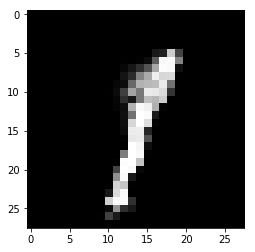

Number batches 468
50(0/468) D: 0.6551, G: 0.8655
50(1/468) D: 0.6812, G: 1.0048
50(2/468) D: 0.6598, G: 0.9183
50(3/468) D: 0.6212, G: 0.9281
50(4/468) D: 0.5996, G: 1.0302
50(5/468) D: 0.5509, G: 1.0158
50(6/468) D: 0.5669, G: 1.1405
50(7/468) D: 0.5236, G: 1.1062
50(8/468) D: 0.5373, G: 1.1146
50(9/468) D: 0.6594, G: 1.0056
50(10/468) D: 0.6331, G: 1.0008
50(11/468) D: 0.5661, G: 0.9980
50(12/468) D: 0.5653, G: 1.1118
50(13/468) D: 0.6012, G: 1.0111
50(14/468) D: 0.6467, G: 1.1588
50(15/468) D: 0.6553, G: 0.8556
50(16/468) D: 0.5964, G: 1.1561
50(17/468) D: 0.5990, G: 1.0882
50(18/468) D: 0.6148, G: 0.9464
50(19/468) D: 0.5864, G: 0.9089
50(20/468) D: 0.5897, G: 1.2827
50(21/468) D: 0.6099, G: 0.9629
50(22/468) D: 0.6158, G: 0.9768
50(23/468) D: 0.5609, G: 1.1474
50(24/468) D: 0.5773, G: 0.8863
50(25/468) D: 0.6662, G: 0.9447
50(26/468) D: 0.5700, G: 1.1809
50(27/468) D: 0.5721, G: 0.9887
50(28/468) D: 0.5924, G: 1.0384
50(29/468) D: 0.6060, G: 1.0821
50(30/468) D: 0.5954, G: 1.0615

50(252/468) D: 0.5697, G: 0.9627
50(253/468) D: 0.5670, G: 1.3430
50(254/468) D: 0.6786, G: 0.8971
50(255/468) D: 0.6884, G: 0.8660
50(256/468) D: 0.5898, G: 1.0377
50(257/468) D: 0.5327, G: 1.2007
50(258/468) D: 0.6298, G: 0.9860
50(259/468) D: 0.5859, G: 1.0670
50(260/468) D: 0.6236, G: 1.0507
50(261/468) D: 0.5745, G: 1.0159
50(262/468) D: 0.5567, G: 0.9268
50(263/468) D: 0.5590, G: 0.9393
50(264/468) D: 0.5962, G: 1.0115
50(265/468) D: 0.6030, G: 1.1038
50(266/468) D: 0.6420, G: 1.0600
50(267/468) D: 0.5679, G: 0.8681
50(268/468) D: 0.6074, G: 1.0196
50(269/468) D: 0.6189, G: 1.1083
50(270/468) D: 0.6698, G: 0.9418
50(271/468) D: 0.6331, G: 0.9655
50(272/468) D: 0.5956, G: 0.9988
50(273/468) D: 0.5997, G: 0.9484
50(274/468) D: 0.5619, G: 1.0069
50(275/468) D: 0.5905, G: 1.0787
50(276/468) D: 0.5962, G: 0.9946
50(277/468) D: 0.5138, G: 1.1655
50(278/468) D: 0.5586, G: 1.0343
50(279/468) D: 0.6256, G: 0.8734
50(280/468) D: 0.5592, G: 0.9576
50(281/468) D: 0.5414, G: 1.0759
50(282/468

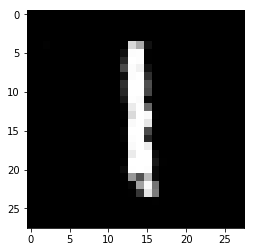

Number batches 468
51(0/468) D: 0.6123, G: 1.0614
51(1/468) D: 0.5891, G: 0.9007
51(2/468) D: 0.5671, G: 0.9792
51(3/468) D: 0.5981, G: 1.0548
51(4/468) D: 0.5748, G: 0.9938
51(5/468) D: 0.5819, G: 0.9537
51(6/468) D: 0.5910, G: 1.1980
51(7/468) D: 0.5219, G: 1.0467
51(8/468) D: 0.5499, G: 0.8817
51(9/468) D: 0.6615, G: 1.0828
51(10/468) D: 0.6523, G: 1.0333
51(11/468) D: 0.5892, G: 0.9915
51(12/468) D: 0.5399, G: 1.0147
51(13/468) D: 0.6049, G: 0.8871
51(14/468) D: 0.6105, G: 1.0448
51(15/468) D: 0.6447, G: 0.9810
51(16/468) D: 0.6244, G: 1.1154
51(17/468) D: 0.5834, G: 0.9493
51(18/468) D: 0.6258, G: 1.0237
51(19/468) D: 0.6048, G: 0.9947
51(20/468) D: 0.5760, G: 0.9936
51(21/468) D: 0.6327, G: 1.0591
51(22/468) D: 0.5800, G: 0.9763
51(23/468) D: 0.5491, G: 1.0843
51(24/468) D: 0.5975, G: 0.9809
51(25/468) D: 0.6659, G: 0.9792
51(26/468) D: 0.5666, G: 1.0587
51(27/468) D: 0.5909, G: 0.9983
51(28/468) D: 0.6066, G: 1.0889
51(29/468) D: 0.6046, G: 0.9245
51(30/468) D: 0.5798, G: 0.8962

51(252/468) D: 0.6305, G: 1.0455
51(253/468) D: 0.5899, G: 1.1379
51(254/468) D: 0.5880, G: 0.9069
51(255/468) D: 0.6098, G: 0.7404
51(256/468) D: 0.6239, G: 1.1315
51(257/468) D: 0.5363, G: 1.1854
51(258/468) D: 0.5691, G: 0.9231
51(259/468) D: 0.5850, G: 0.8677
51(260/468) D: 0.5959, G: 1.0344
51(261/468) D: 0.5849, G: 0.9632
51(262/468) D: 0.5990, G: 0.9294
51(263/468) D: 0.5890, G: 0.9551
51(264/468) D: 0.6014, G: 1.1015
51(265/468) D: 0.6454, G: 1.0611
51(266/468) D: 0.5511, G: 1.0301
51(267/468) D: 0.5845, G: 1.0749
51(268/468) D: 0.5841, G: 0.9675
51(269/468) D: 0.5805, G: 0.9617
51(270/468) D: 0.5940, G: 0.8577
51(271/468) D: 0.6347, G: 1.0709
51(272/468) D: 0.6517, G: 1.1037
51(273/468) D: 0.6064, G: 0.8730
51(274/468) D: 0.6030, G: 1.1988
51(275/468) D: 0.5513, G: 1.0805
51(276/468) D: 0.5470, G: 0.9340
51(277/468) D: 0.5419, G: 1.2184
51(278/468) D: 0.6017, G: 1.0269
51(279/468) D: 0.6392, G: 1.0185
51(280/468) D: 0.6026, G: 1.0582
51(281/468) D: 0.6588, G: 1.1125
51(282/468

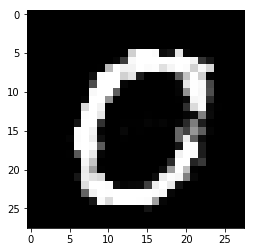

Number batches 468
52(0/468) D: 0.6373, G: 0.9823
52(1/468) D: 0.6351, G: 1.0734
52(2/468) D: 0.6467, G: 0.9073
52(3/468) D: 0.5936, G: 0.9289
52(4/468) D: 0.6134, G: 1.0333
52(5/468) D: 0.5653, G: 0.9979
52(6/468) D: 0.5652, G: 1.1266
52(7/468) D: 0.5212, G: 1.0713
52(8/468) D: 0.6335, G: 1.1474
52(9/468) D: 0.6834, G: 1.0087
52(10/468) D: 0.6214, G: 0.9904
52(11/468) D: 0.5457, G: 1.0981
52(12/468) D: 0.5243, G: 1.0551
52(13/468) D: 0.6003, G: 0.8450
52(14/468) D: 0.6012, G: 1.2678
52(15/468) D: 0.6491, G: 0.9547
52(16/468) D: 0.5762, G: 0.9761
52(17/468) D: 0.5441, G: 1.1209
52(18/468) D: 0.5767, G: 1.0184
52(19/468) D: 0.5642, G: 0.9521
52(20/468) D: 0.5866, G: 1.3429
52(21/468) D: 0.6293, G: 0.9770
52(22/468) D: 0.5853, G: 0.7704
52(23/468) D: 0.5965, G: 1.2012
52(24/468) D: 0.5998, G: 1.0947
52(25/468) D: 0.6773, G: 0.7236
52(26/468) D: 0.6058, G: 1.1003
52(27/468) D: 0.6092, G: 1.0954
52(28/468) D: 0.5794, G: 0.9731
52(29/468) D: 0.6004, G: 1.0281
52(30/468) D: 0.6480, G: 0.8962

52(253/468) D: 0.6056, G: 0.9580
52(254/468) D: 0.6129, G: 1.0483
52(255/468) D: 0.6534, G: 0.9539
52(256/468) D: 0.6302, G: 1.0617
52(257/468) D: 0.5634, G: 1.0935
52(258/468) D: 0.6375, G: 0.9638
52(259/468) D: 0.5604, G: 1.0465
52(260/468) D: 0.6116, G: 0.9225
52(261/468) D: 0.6002, G: 1.0513
52(262/468) D: 0.6239, G: 1.0830
52(263/468) D: 0.6349, G: 0.8721
52(264/468) D: 0.6165, G: 1.1502
52(265/468) D: 0.6164, G: 0.9116
52(266/468) D: 0.6192, G: 1.2007
52(267/468) D: 0.5604, G: 0.8145
52(268/468) D: 0.5997, G: 1.0400
52(269/468) D: 0.5948, G: 1.2651
52(270/468) D: 0.6199, G: 0.8516
52(271/468) D: 0.6077, G: 0.9257
52(272/468) D: 0.5708, G: 0.9475
52(273/468) D: 0.5254, G: 1.0856
52(274/468) D: 0.5477, G: 1.0601
52(275/468) D: 0.5679, G: 1.0923
52(276/468) D: 0.5914, G: 0.8851
52(277/468) D: 0.5398, G: 1.1088
52(278/468) D: 0.5453, G: 1.1834
52(279/468) D: 0.6342, G: 0.9402
52(280/468) D: 0.5680, G: 1.2505
52(281/468) D: 0.5301, G: 1.0359
52(282/468) D: 0.6187, G: 0.9418
52(283/468

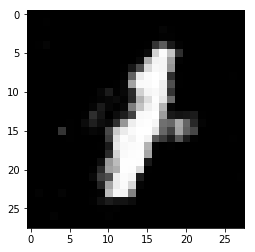

Number batches 468
53(0/468) D: 0.6310, G: 0.8502
53(1/468) D: 0.6801, G: 1.2159
53(2/468) D: 0.6304, G: 0.9214
53(3/468) D: 0.6337, G: 1.1196
53(4/468) D: 0.5926, G: 0.9852
53(5/468) D: 0.5866, G: 0.9381
53(6/468) D: 0.5937, G: 1.2223
53(7/468) D: 0.5765, G: 1.1111
53(8/468) D: 0.5840, G: 0.9249
53(9/468) D: 0.6718, G: 1.1264
53(10/468) D: 0.6413, G: 1.0866
53(11/468) D: 0.5773, G: 0.9517
53(12/468) D: 0.5646, G: 1.0484
53(13/468) D: 0.5760, G: 0.8103
53(14/468) D: 0.6034, G: 0.9331
53(15/468) D: 0.6361, G: 1.0554
53(16/468) D: 0.5574, G: 0.9648
53(17/468) D: 0.6032, G: 1.1494
53(18/468) D: 0.6274, G: 0.9586
53(19/468) D: 0.6399, G: 0.8401
53(20/468) D: 0.5357, G: 1.0183
53(21/468) D: 0.6105, G: 1.0214
53(22/468) D: 0.5876, G: 0.9274
53(23/468) D: 0.5694, G: 1.1198
53(24/468) D: 0.5732, G: 1.0113
53(25/468) D: 0.6292, G: 0.9032
53(26/468) D: 0.5568, G: 1.1181
53(27/468) D: 0.6208, G: 1.0687
53(28/468) D: 0.5631, G: 1.0323
53(29/468) D: 0.6214, G: 0.9057
53(30/468) D: 0.6340, G: 0.9878

53(252/468) D: 0.6029, G: 1.1451
53(253/468) D: 0.6079, G: 1.0414
53(254/468) D: 0.6015, G: 0.8719
53(255/468) D: 0.6454, G: 0.9024
53(256/468) D: 0.6624, G: 1.1026
53(257/468) D: 0.6062, G: 1.0400
53(258/468) D: 0.6347, G: 0.9715
53(259/468) D: 0.6012, G: 1.1205
53(260/468) D: 0.5915, G: 0.9786
53(261/468) D: 0.5995, G: 0.8655
53(262/468) D: 0.6435, G: 1.0283
53(263/468) D: 0.5843, G: 0.9551
53(264/468) D: 0.5911, G: 0.9203
53(265/468) D: 0.5599, G: 0.9277
53(266/468) D: 0.6280, G: 1.2012
53(267/468) D: 0.5814, G: 0.9538
53(268/468) D: 0.6153, G: 1.0203
53(269/468) D: 0.6011, G: 1.0248
53(270/468) D: 0.6180, G: 0.9012
53(271/468) D: 0.6644, G: 1.0896
53(272/468) D: 0.6123, G: 1.0322
53(273/468) D: 0.5901, G: 0.8861
53(274/468) D: 0.6059, G: 1.1510
53(275/468) D: 0.5692, G: 0.9231
53(276/468) D: 0.5407, G: 1.0114
53(277/468) D: 0.5769, G: 1.2137
53(278/468) D: 0.5970, G: 1.1171
53(279/468) D: 0.6558, G: 0.8023
53(280/468) D: 0.5912, G: 1.0492
53(281/468) D: 0.5538, G: 1.1100
53(282/468

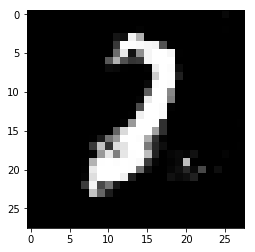

Number batches 468
54(0/468) D: 0.6471, G: 0.8935
54(1/468) D: 0.6864, G: 1.0800
54(2/468) D: 0.6181, G: 1.0531
54(3/468) D: 0.5885, G: 0.9347
54(4/468) D: 0.6175, G: 1.0282
54(5/468) D: 0.5990, G: 0.9633
54(6/468) D: 0.5690, G: 1.0142
54(7/468) D: 0.5575, G: 1.0211
54(8/468) D: 0.5856, G: 1.0261
54(9/468) D: 0.6680, G: 1.0269
54(10/468) D: 0.6507, G: 0.9637
54(11/468) D: 0.5751, G: 1.0284
54(12/468) D: 0.6113, G: 1.1017
54(13/468) D: 0.6065, G: 0.8446
54(14/468) D: 0.6250, G: 1.0295
54(15/468) D: 0.6243, G: 1.0533
54(16/468) D: 0.6248, G: 0.9065
54(17/468) D: 0.5634, G: 1.0014
54(18/468) D: 0.6393, G: 1.1141
54(19/468) D: 0.6332, G: 0.9919
54(20/468) D: 0.5899, G: 0.9062
54(21/468) D: 0.5893, G: 0.9752
54(22/468) D: 0.5583, G: 0.9918
54(23/468) D: 0.5358, G: 1.0196
54(24/468) D: 0.6249, G: 0.9956
54(25/468) D: 0.6460, G: 0.9017
54(26/468) D: 0.6298, G: 1.0379
54(27/468) D: 0.5887, G: 0.8928
54(28/468) D: 0.5963, G: 0.9394
54(29/468) D: 0.5717, G: 0.9973
54(30/468) D: 0.6321, G: 1.0573

54(253/468) D: 0.5703, G: 1.1394
54(254/468) D: 0.5810, G: 0.9339
54(255/468) D: 0.6272, G: 0.9831
54(256/468) D: 0.5925, G: 0.9889
54(257/468) D: 0.5335, G: 1.1106
54(258/468) D: 0.6108, G: 1.0147
54(259/468) D: 0.6201, G: 1.0574
54(260/468) D: 0.6442, G: 1.0037
54(261/468) D: 0.6300, G: 0.9672
54(262/468) D: 0.6320, G: 0.7667
54(263/468) D: 0.6591, G: 1.0763
54(264/468) D: 0.5893, G: 1.0076
54(265/468) D: 0.5622, G: 1.0381
54(266/468) D: 0.5617, G: 1.1330
54(267/468) D: 0.5847, G: 0.9515
54(268/468) D: 0.6033, G: 0.8907
54(269/468) D: 0.5976, G: 1.1614
54(270/468) D: 0.5809, G: 0.9327
54(271/468) D: 0.6324, G: 0.9015
54(272/468) D: 0.5980, G: 1.0009
54(273/468) D: 0.5917, G: 1.0330
54(274/468) D: 0.5392, G: 0.9114
54(275/468) D: 0.5813, G: 1.3532
54(276/468) D: 0.5644, G: 1.0403
54(277/468) D: 0.5406, G: 1.0145
54(278/468) D: 0.5494, G: 1.2497
54(279/468) D: 0.6422, G: 0.9236
54(280/468) D: 0.5288, G: 1.0069
54(281/468) D: 0.6063, G: 1.3281
54(282/468) D: 0.6197, G: 0.9478
54(283/468

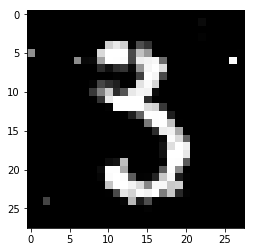

Number batches 468
55(0/468) D: 0.6759, G: 1.0742
55(1/468) D: 0.6214, G: 1.0266
55(2/468) D: 0.6028, G: 0.9173
55(3/468) D: 0.6195, G: 1.0745
55(4/468) D: 0.5841, G: 0.9918
55(5/468) D: 0.5946, G: 1.0221
55(6/468) D: 0.5791, G: 1.0882
55(7/468) D: 0.5408, G: 1.0286
55(8/468) D: 0.5374, G: 0.9544
55(9/468) D: 0.6826, G: 1.1079
55(10/468) D: 0.6581, G: 1.1276
55(11/468) D: 0.5490, G: 0.9184
55(12/468) D: 0.5523, G: 0.9137
55(13/468) D: 0.5928, G: 1.0133
55(14/468) D: 0.5665, G: 0.9484
55(15/468) D: 0.6505, G: 1.1278
55(16/468) D: 0.6033, G: 1.1734
55(17/468) D: 0.5760, G: 0.9329
55(18/468) D: 0.5760, G: 1.0597
55(19/468) D: 0.6527, G: 1.1416
55(20/468) D: 0.5725, G: 1.0007
55(21/468) D: 0.5625, G: 0.8752
55(22/468) D: 0.5982, G: 1.1723
55(23/468) D: 0.5244, G: 1.1840
55(24/468) D: 0.5970, G: 0.8037
55(25/468) D: 0.6558, G: 0.9469
55(26/468) D: 0.6143, G: 1.1117
55(27/468) D: 0.6154, G: 1.1790
55(28/468) D: 0.5939, G: 0.8985
55(29/468) D: 0.6010, G: 1.0103
55(30/468) D: 0.5966, G: 0.9145

55(253/468) D: 0.6116, G: 1.2172
55(254/468) D: 0.6486, G: 0.8549
55(255/468) D: 0.6858, G: 0.8299
55(256/468) D: 0.6400, G: 1.0116
55(257/468) D: 0.5349, G: 1.2118
55(258/468) D: 0.6297, G: 0.7567
55(259/468) D: 0.5994, G: 1.0482
55(260/468) D: 0.6711, G: 1.0662
55(261/468) D: 0.5982, G: 0.9058
55(262/468) D: 0.6381, G: 0.9398
55(263/468) D: 0.6299, G: 0.9895
55(264/468) D: 0.6304, G: 0.8896
55(265/468) D: 0.5598, G: 0.8798
55(266/468) D: 0.5598, G: 1.1489
55(267/468) D: 0.5827, G: 1.0195
55(268/468) D: 0.5996, G: 0.9016
55(269/468) D: 0.6520, G: 1.0172
55(270/468) D: 0.6058, G: 1.0636
55(271/468) D: 0.6426, G: 1.0296
55(272/468) D: 0.6084, G: 0.8965
55(273/468) D: 0.5707, G: 1.0254
55(274/468) D: 0.5701, G: 0.8870
55(275/468) D: 0.5916, G: 1.2106
55(276/468) D: 0.6029, G: 0.8256
55(277/468) D: 0.5856, G: 1.0647
55(278/468) D: 0.5851, G: 1.0022
55(279/468) D: 0.6173, G: 0.8847
55(280/468) D: 0.5665, G: 0.9953
55(281/468) D: 0.5427, G: 1.0119
55(282/468) D: 0.6062, G: 1.1135
55(283/468

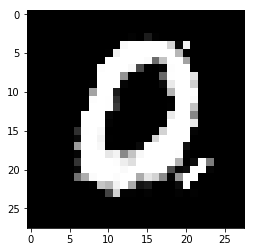

Number batches 468
56(0/468) D: 0.6813, G: 0.8496
56(1/468) D: 0.6432, G: 0.9726
56(2/468) D: 0.6137, G: 0.9774
56(3/468) D: 0.6029, G: 0.9444
56(4/468) D: 0.5665, G: 0.9979
56(5/468) D: 0.6142, G: 0.8834
56(6/468) D: 0.5356, G: 1.0430
56(7/468) D: 0.6042, G: 1.0889
56(8/468) D: 0.5903, G: 0.9262
56(9/468) D: 0.6385, G: 0.8967
56(10/468) D: 0.6604, G: 1.0839
56(11/468) D: 0.5886, G: 0.9816
56(12/468) D: 0.6229, G: 0.9682
56(13/468) D: 0.6285, G: 0.7822
56(14/468) D: 0.6466, G: 1.2676
56(15/468) D: 0.6533, G: 1.0419
56(16/468) D: 0.5692, G: 0.8601
56(17/468) D: 0.6134, G: 1.0876
56(18/468) D: 0.6089, G: 1.0443
56(19/468) D: 0.5896, G: 0.9508
56(20/468) D: 0.5969, G: 0.9741
56(21/468) D: 0.5638, G: 1.0236
56(22/468) D: 0.5881, G: 0.9461
56(23/468) D: 0.5592, G: 1.1454
56(24/468) D: 0.5219, G: 1.0727
56(25/468) D: 0.6452, G: 0.9169
56(26/468) D: 0.5847, G: 1.1409
56(27/468) D: 0.5680, G: 1.0902
56(28/468) D: 0.5580, G: 0.9293
56(29/468) D: 0.6154, G: 0.9778
56(30/468) D: 0.6340, G: 1.0034

56(252/468) D: 0.6180, G: 1.3047
56(253/468) D: 0.6003, G: 1.1771
56(254/468) D: 0.6176, G: 0.9074
56(255/468) D: 0.6826, G: 0.8496
56(256/468) D: 0.6188, G: 0.9188
56(257/468) D: 0.5980, G: 1.0659
56(258/468) D: 0.6208, G: 0.9623
56(259/468) D: 0.5742, G: 0.9507
56(260/468) D: 0.6335, G: 1.0692
56(261/468) D: 0.5952, G: 0.9428
56(262/468) D: 0.6247, G: 0.8847
56(263/468) D: 0.6221, G: 0.9895
56(264/468) D: 0.6739, G: 1.0700
56(265/468) D: 0.6006, G: 1.0099
56(266/468) D: 0.5958, G: 0.9642
56(267/468) D: 0.5887, G: 1.0816
56(268/468) D: 0.5449, G: 1.0188
56(269/468) D: 0.5882, G: 1.0928
56(270/468) D: 0.6373, G: 0.9422
56(271/468) D: 0.6440, G: 0.9835
56(272/468) D: 0.6151, G: 1.0048
56(273/468) D: 0.5889, G: 0.8919
56(274/468) D: 0.5890, G: 1.1644
56(275/468) D: 0.5712, G: 1.0566
56(276/468) D: 0.5856, G: 0.9095
56(277/468) D: 0.5677, G: 1.1752
56(278/468) D: 0.5777, G: 1.0411
56(279/468) D: 0.6283, G: 1.0192
56(280/468) D: 0.6150, G: 0.9682
56(281/468) D: 0.5815, G: 0.9424
56(282/468

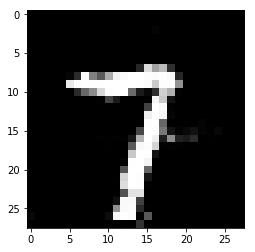

Number batches 468
57(0/468) D: 0.6340, G: 0.9301
57(1/468) D: 0.6021, G: 0.9907
57(2/468) D: 0.6596, G: 0.8868
57(3/468) D: 0.6021, G: 0.7988
57(4/468) D: 0.5700, G: 0.9223
57(5/468) D: 0.6266, G: 1.0925
57(6/468) D: 0.5841, G: 0.9076
57(7/468) D: 0.5571, G: 1.0168
57(8/468) D: 0.5944, G: 0.9769
57(9/468) D: 0.6720, G: 1.0502
57(10/468) D: 0.6291, G: 1.0528
57(11/468) D: 0.5759, G: 0.9844
57(12/468) D: 0.5584, G: 0.9689
57(13/468) D: 0.5853, G: 0.7798
57(14/468) D: 0.6351, G: 0.9802
57(15/468) D: 0.6824, G: 0.9558
57(16/468) D: 0.5695, G: 0.9027
57(17/468) D: 0.6236, G: 0.9227
57(18/468) D: 0.5792, G: 0.9781
57(19/468) D: 0.5922, G: 1.0352
57(20/468) D: 0.5782, G: 1.0207
57(21/468) D: 0.6095, G: 0.9180
57(22/468) D: 0.5892, G: 1.0334
57(23/468) D: 0.5412, G: 1.0131
57(24/468) D: 0.5851, G: 0.9567
57(25/468) D: 0.6016, G: 0.8979
57(26/468) D: 0.6037, G: 1.2144
57(27/468) D: 0.5605, G: 0.9699
57(28/468) D: 0.5982, G: 1.0624
57(29/468) D: 0.6150, G: 0.9808
57(30/468) D: 0.6331, G: 1.0305

57(252/468) D: 0.5681, G: 1.0785
57(253/468) D: 0.6068, G: 1.2947
57(254/468) D: 0.6131, G: 0.7163
57(255/468) D: 0.6672, G: 0.8693
57(256/468) D: 0.6319, G: 1.1257
57(257/468) D: 0.6423, G: 1.0518
57(258/468) D: 0.6543, G: 1.0000
57(259/468) D: 0.6181, G: 1.0142
57(260/468) D: 0.5666, G: 0.9036
57(261/468) D: 0.5950, G: 0.9856
57(262/468) D: 0.6339, G: 0.8828
57(263/468) D: 0.6476, G: 1.0300
57(264/468) D: 0.6472, G: 0.8537
57(265/468) D: 0.6590, G: 1.0868
57(266/468) D: 0.6310, G: 1.0197
57(267/468) D: 0.5419, G: 0.9473
57(268/468) D: 0.5763, G: 0.9025
57(269/468) D: 0.6342, G: 1.1601
57(270/468) D: 0.6807, G: 0.8881
57(271/468) D: 0.6329, G: 0.9112
57(272/468) D: 0.6620, G: 1.0444
57(273/468) D: 0.6140, G: 1.0403
57(274/468) D: 0.5558, G: 0.9932
57(275/468) D: 0.5496, G: 1.0425
57(276/468) D: 0.6074, G: 1.0789
57(277/468) D: 0.5897, G: 1.1007
57(278/468) D: 0.5521, G: 1.0177
57(279/468) D: 0.6460, G: 0.7847
57(280/468) D: 0.5740, G: 0.9159
57(281/468) D: 0.5573, G: 1.1467
57(282/468

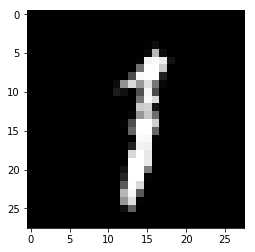

Number batches 468
58(0/468) D: 0.6230, G: 0.8310
58(1/468) D: 0.6411, G: 0.9955
58(2/468) D: 0.6842, G: 0.9480
58(3/468) D: 0.6243, G: 1.0410
58(4/468) D: 0.6699, G: 1.0921
58(5/468) D: 0.6078, G: 0.9029
58(6/468) D: 0.5804, G: 0.8846
58(7/468) D: 0.5442, G: 0.9961
58(8/468) D: 0.5711, G: 0.9551
58(9/468) D: 0.6518, G: 1.0170
58(10/468) D: 0.6654, G: 1.2025
58(11/468) D: 0.6177, G: 1.0168
58(12/468) D: 0.5595, G: 1.0384
58(13/468) D: 0.6269, G: 0.9571
58(14/468) D: 0.5728, G: 0.9542
58(15/468) D: 0.6715, G: 0.9729
58(16/468) D: 0.6327, G: 0.8827
58(17/468) D: 0.6466, G: 1.1584
58(18/468) D: 0.6193, G: 0.9889
58(19/468) D: 0.6172, G: 0.7738
58(20/468) D: 0.6577, G: 1.2103
58(21/468) D: 0.6134, G: 0.9640
58(22/468) D: 0.5809, G: 0.8220
58(23/468) D: 0.5629, G: 1.0945
58(24/468) D: 0.5801, G: 1.0605
58(25/468) D: 0.6189, G: 0.9567
58(26/468) D: 0.5420, G: 1.0524
58(27/468) D: 0.5451, G: 1.0306
58(28/468) D: 0.5665, G: 1.2082
58(29/468) D: 0.6227, G: 0.9379
58(30/468) D: 0.6167, G: 0.8724

58(252/468) D: 0.5993, G: 0.9807
58(253/468) D: 0.5649, G: 1.1027
58(254/468) D: 0.5750, G: 0.9234
58(255/468) D: 0.6122, G: 0.8396
58(256/468) D: 0.6352, G: 1.2484
58(257/468) D: 0.5736, G: 1.0882
58(258/468) D: 0.6641, G: 0.7940
58(259/468) D: 0.6290, G: 1.0042
58(260/468) D: 0.6145, G: 1.0120
58(261/468) D: 0.5438, G: 0.8649
58(262/468) D: 0.5880, G: 0.9213
58(263/468) D: 0.6507, G: 1.0233
58(264/468) D: 0.5929, G: 0.9874
58(265/468) D: 0.6148, G: 0.9731
58(266/468) D: 0.6215, G: 1.0882
58(267/468) D: 0.5904, G: 0.9827
58(268/468) D: 0.5618, G: 0.9165
58(269/468) D: 0.5896, G: 1.1017
58(270/468) D: 0.6480, G: 0.8785
58(271/468) D: 0.6300, G: 0.9619
58(272/468) D: 0.5951, G: 1.1001
58(273/468) D: 0.5711, G: 0.8505
58(274/468) D: 0.5643, G: 0.9290
58(275/468) D: 0.5272, G: 1.0583
58(276/468) D: 0.5291, G: 1.0206
58(277/468) D: 0.5931, G: 1.2567
58(278/468) D: 0.5803, G: 1.1788
58(279/468) D: 0.6258, G: 0.7469
58(280/468) D: 0.6191, G: 1.1043
58(281/468) D: 0.5818, G: 1.0228
58(282/468

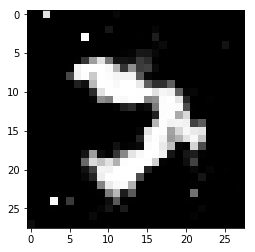

Number batches 468
59(0/468) D: 0.6015, G: 0.8405
59(1/468) D: 0.6076, G: 0.9572
59(2/468) D: 0.6032, G: 0.9945
59(3/468) D: 0.6044, G: 1.0362
59(4/468) D: 0.5495, G: 0.8374
59(5/468) D: 0.6236, G: 1.1590
59(6/468) D: 0.5543, G: 1.0001
59(7/468) D: 0.5866, G: 0.9940
59(8/468) D: 0.5948, G: 1.0583
59(9/468) D: 0.6162, G: 0.9507
59(10/468) D: 0.5858, G: 1.0139
59(11/468) D: 0.6108, G: 1.1354
59(12/468) D: 0.5605, G: 0.9790
59(13/468) D: 0.5802, G: 0.8385
59(14/468) D: 0.6126, G: 1.1948
59(15/468) D: 0.6575, G: 0.8293
59(16/468) D: 0.5987, G: 1.0473
59(17/468) D: 0.5835, G: 1.0561
59(18/468) D: 0.5655, G: 1.0427
59(19/468) D: 0.6321, G: 0.8672
59(20/468) D: 0.6272, G: 1.1595
59(21/468) D: 0.6221, G: 0.9926
59(22/468) D: 0.6004, G: 0.9189
59(23/468) D: 0.5423, G: 1.0503
59(24/468) D: 0.5807, G: 0.9250
59(25/468) D: 0.6602, G: 0.9133
59(26/468) D: 0.6351, G: 1.2868
59(27/468) D: 0.5986, G: 0.8890
59(28/468) D: 0.6151, G: 1.2618
59(29/468) D: 0.6257, G: 1.0025
59(30/468) D: 0.6015, G: 0.8239

59(252/468) D: 0.5979, G: 1.1151
59(253/468) D: 0.5678, G: 0.9555
59(254/468) D: 0.5904, G: 1.0160
59(255/468) D: 0.6604, G: 0.9301
59(256/468) D: 0.6211, G: 0.9406
59(257/468) D: 0.5950, G: 1.1547
59(258/468) D: 0.6608, G: 0.8498
59(259/468) D: 0.5892, G: 0.8591
59(260/468) D: 0.6198, G: 1.0213
59(261/468) D: 0.6108, G: 0.9733
59(262/468) D: 0.6094, G: 0.8846
59(263/468) D: 0.6405, G: 0.9706
59(264/468) D: 0.6255, G: 1.0040
59(265/468) D: 0.6210, G: 0.9588
59(266/468) D: 0.6137, G: 1.1432
59(267/468) D: 0.5359, G: 0.9628
59(268/468) D: 0.6005, G: 0.8040
59(269/468) D: 0.6058, G: 1.0351
59(270/468) D: 0.6289, G: 0.9400
59(271/468) D: 0.6506, G: 0.8706
59(272/468) D: 0.6094, G: 1.0679
59(273/468) D: 0.6038, G: 0.9024
59(274/468) D: 0.5548, G: 1.0643
59(275/468) D: 0.5612, G: 1.1148
59(276/468) D: 0.5776, G: 1.0976
59(277/468) D: 0.5922, G: 0.9738
59(278/468) D: 0.5808, G: 1.0605
59(279/468) D: 0.6581, G: 0.8246
59(280/468) D: 0.6089, G: 0.9570
59(281/468) D: 0.6029, G: 1.0300
59(282/468

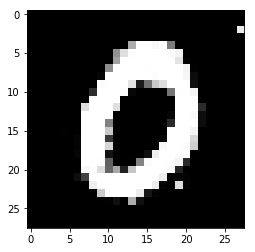

Number batches 468
60(0/468) D: 0.7263, G: 0.9722
60(1/468) D: 0.6501, G: 1.0014
60(2/468) D: 0.6370, G: 0.9644
60(3/468) D: 0.6309, G: 0.9358
60(4/468) D: 0.5904, G: 0.9792
60(5/468) D: 0.5774, G: 1.0504
60(6/468) D: 0.5907, G: 1.1431
60(7/468) D: 0.5453, G: 0.8713
60(8/468) D: 0.5693, G: 0.9334
60(9/468) D: 0.6321, G: 0.9809
60(10/468) D: 0.5952, G: 1.0228
60(11/468) D: 0.5363, G: 1.0689
60(12/468) D: 0.5804, G: 0.9388
60(13/468) D: 0.5987, G: 1.1522
60(14/468) D: 0.6286, G: 0.9883
60(15/468) D: 0.6685, G: 1.1153
60(16/468) D: 0.6356, G: 1.1065
60(17/468) D: 0.5418, G: 0.9714
60(18/468) D: 0.5836, G: 1.0610
60(19/468) D: 0.5764, G: 0.8779
60(20/468) D: 0.5471, G: 1.0458
60(21/468) D: 0.5689, G: 1.0331
60(22/468) D: 0.6527, G: 0.9993
60(23/468) D: 0.5473, G: 1.2127
60(24/468) D: 0.5147, G: 0.9788
60(25/468) D: 0.5811, G: 0.8519
60(26/468) D: 0.6200, G: 1.3220
60(27/468) D: 0.6382, G: 0.8782
60(28/468) D: 0.6128, G: 0.8653
60(29/468) D: 0.5906, G: 0.9988
60(30/468) D: 0.6012, G: 0.9979

60(252/468) D: 0.6119, G: 0.9189
60(253/468) D: 0.6132, G: 1.0923
60(254/468) D: 0.5968, G: 0.8368
60(255/468) D: 0.6509, G: 0.8906
60(256/468) D: 0.6654, G: 1.1225
60(257/468) D: 0.5644, G: 0.9409
60(258/468) D: 0.6131, G: 0.9121
60(259/468) D: 0.6166, G: 1.1033
60(260/468) D: 0.6408, G: 0.9359
60(261/468) D: 0.5851, G: 0.8931
60(262/468) D: 0.6135, G: 1.0176
60(263/468) D: 0.6227, G: 0.9828
60(264/468) D: 0.5810, G: 0.7538
60(265/468) D: 0.5985, G: 1.0834
60(266/468) D: 0.5902, G: 1.1521
60(267/468) D: 0.5524, G: 0.8337
60(268/468) D: 0.6109, G: 1.0344
60(269/468) D: 0.5895, G: 1.0131
60(270/468) D: 0.6292, G: 0.9704
60(271/468) D: 0.6175, G: 0.8064
60(272/468) D: 0.5784, G: 0.9953
60(273/468) D: 0.6149, G: 1.0133
60(274/468) D: 0.5548, G: 0.9325
60(275/468) D: 0.5472, G: 1.1822
60(276/468) D: 0.6283, G: 0.9862
60(277/468) D: 0.5702, G: 1.0815
60(278/468) D: 0.5915, G: 0.9745
60(279/468) D: 0.6275, G: 0.9047
60(280/468) D: 0.5868, G: 0.8837
60(281/468) D: 0.5752, G: 1.0048
60(282/468

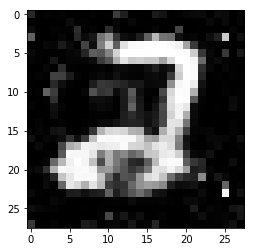

Number batches 468
61(0/468) D: 0.6420, G: 0.8609
61(1/468) D: 0.6626, G: 1.0522
61(2/468) D: 0.6331, G: 0.9363
61(3/468) D: 0.6382, G: 1.1717
61(4/468) D: 0.5573, G: 0.9356
61(5/468) D: 0.5926, G: 1.0212
61(6/468) D: 0.5637, G: 1.0808
61(7/468) D: 0.5403, G: 1.0856
61(8/468) D: 0.5544, G: 0.9502
61(9/468) D: 0.6509, G: 0.9628
61(10/468) D: 0.6424, G: 1.1324
61(11/468) D: 0.5761, G: 0.8499
61(12/468) D: 0.5501, G: 0.9876
61(13/468) D: 0.6036, G: 1.0815
61(14/468) D: 0.5645, G: 1.0904
61(15/468) D: 0.6138, G: 0.8476
61(16/468) D: 0.6170, G: 1.2071
61(17/468) D: 0.6295, G: 1.1113
61(18/468) D: 0.6389, G: 1.0278
61(19/468) D: 0.6763, G: 0.7649
61(20/468) D: 0.6334, G: 1.0955
61(21/468) D: 0.5997, G: 1.0953
61(22/468) D: 0.6136, G: 0.8833
61(23/468) D: 0.5741, G: 1.0133
61(24/468) D: 0.5873, G: 0.9555
61(25/468) D: 0.6162, G: 0.8716
61(26/468) D: 0.6059, G: 1.0090
61(27/468) D: 0.5990, G: 1.1352
61(28/468) D: 0.5589, G: 1.0167
61(29/468) D: 0.5644, G: 0.9202
61(30/468) D: 0.6541, G: 1.0561

61(253/468) D: 0.5875, G: 1.1682
61(254/468) D: 0.5888, G: 0.8439
61(255/468) D: 0.6677, G: 1.0650
61(256/468) D: 0.6326, G: 0.9444
61(257/468) D: 0.5485, G: 1.0430
61(258/468) D: 0.6414, G: 0.9433
61(259/468) D: 0.5929, G: 1.0085
61(260/468) D: 0.5946, G: 1.0669
61(261/468) D: 0.6069, G: 0.9783
61(262/468) D: 0.6330, G: 0.9100
61(263/468) D: 0.6239, G: 0.9661
61(264/468) D: 0.6468, G: 0.9584
61(265/468) D: 0.5626, G: 1.0416
61(266/468) D: 0.6106, G: 1.2347
61(267/468) D: 0.5832, G: 0.7556
61(268/468) D: 0.6616, G: 1.2283
61(269/468) D: 0.6066, G: 0.9758
61(270/468) D: 0.6411, G: 0.7116
61(271/468) D: 0.7153, G: 1.1638
61(272/468) D: 0.6588, G: 0.9870
61(273/468) D: 0.6271, G: 0.8083
61(274/468) D: 0.5944, G: 0.9993
61(275/468) D: 0.5564, G: 1.0890
61(276/468) D: 0.5941, G: 1.0221
61(277/468) D: 0.5541, G: 0.9515
61(278/468) D: 0.6216, G: 1.1237
61(279/468) D: 0.6340, G: 0.9427
61(280/468) D: 0.6211, G: 0.9559
61(281/468) D: 0.6102, G: 1.0499
61(282/468) D: 0.5876, G: 1.0292
61(283/468

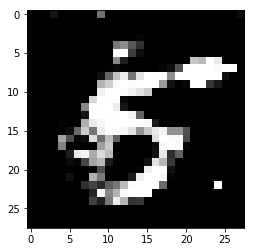

Number batches 468
62(0/468) D: 0.6701, G: 0.9576
62(1/468) D: 0.6058, G: 0.8851
62(2/468) D: 0.6336, G: 1.1021
62(3/468) D: 0.6044, G: 1.1047
62(4/468) D: 0.5845, G: 0.8447
62(5/468) D: 0.5936, G: 0.9670
62(6/468) D: 0.6025, G: 1.0701
62(7/468) D: 0.5690, G: 1.0553
62(8/468) D: 0.5646, G: 0.8923
62(9/468) D: 0.6496, G: 1.0491
62(10/468) D: 0.6310, G: 0.9974
62(11/468) D: 0.5413, G: 0.9722
62(12/468) D: 0.5757, G: 1.0039
62(13/468) D: 0.6528, G: 0.9076
62(14/468) D: 0.5915, G: 1.0010
62(15/468) D: 0.6799, G: 0.9168
62(16/468) D: 0.5823, G: 0.9725
62(17/468) D: 0.6143, G: 0.9883
62(18/468) D: 0.6160, G: 0.9166
62(19/468) D: 0.6539, G: 0.9446
62(20/468) D: 0.5777, G: 0.9274
62(21/468) D: 0.5609, G: 0.9893
62(22/468) D: 0.6035, G: 1.0824
62(23/468) D: 0.5473, G: 1.0517
62(24/468) D: 0.5497, G: 0.9811
62(25/468) D: 0.6719, G: 0.9880
62(26/468) D: 0.6035, G: 1.0348
62(27/468) D: 0.5602, G: 0.9913
62(28/468) D: 0.5789, G: 1.1394
62(29/468) D: 0.6214, G: 0.9376
62(30/468) D: 0.6547, G: 0.8316

62(253/468) D: 0.5573, G: 1.0000
62(254/468) D: 0.5753, G: 0.9596
62(255/468) D: 0.6300, G: 0.8655
62(256/468) D: 0.6799, G: 1.0377
62(257/468) D: 0.5840, G: 1.0813
62(258/468) D: 0.6187, G: 0.9089
62(259/468) D: 0.6194, G: 1.0048
62(260/468) D: 0.6090, G: 0.9166
62(261/468) D: 0.6205, G: 0.9901
62(262/468) D: 0.6375, G: 0.9253
62(263/468) D: 0.5922, G: 0.9263
62(264/468) D: 0.6324, G: 1.0948
62(265/468) D: 0.6137, G: 1.0747
62(266/468) D: 0.5818, G: 0.9475
62(267/468) D: 0.5800, G: 1.1535
62(268/468) D: 0.6594, G: 1.0250
62(269/468) D: 0.6540, G: 1.0354
62(270/468) D: 0.6428, G: 0.8861
62(271/468) D: 0.6478, G: 0.9928
62(272/468) D: 0.6395, G: 0.9946
62(273/468) D: 0.5730, G: 0.9279
62(274/468) D: 0.5629, G: 1.0429
62(275/468) D: 0.5304, G: 1.2041
62(276/468) D: 0.5607, G: 0.9415
62(277/468) D: 0.5533, G: 1.0417
62(278/468) D: 0.5589, G: 0.9751
62(279/468) D: 0.6352, G: 0.9826
62(280/468) D: 0.5804, G: 0.9819
62(281/468) D: 0.6194, G: 0.9642
62(282/468) D: 0.6809, G: 1.0053
62(283/468

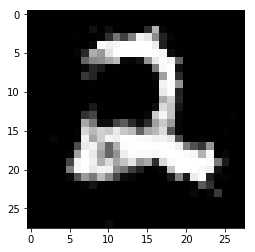

Number batches 468
63(0/468) D: 0.6805, G: 0.8896
63(1/468) D: 0.6287, G: 0.8588
63(2/468) D: 0.6377, G: 1.1163
63(3/468) D: 0.6097, G: 1.0238
63(4/468) D: 0.5938, G: 0.9057
63(5/468) D: 0.5789, G: 0.8442
63(6/468) D: 0.5835, G: 1.0370
63(7/468) D: 0.5864, G: 1.0429
63(8/468) D: 0.6063, G: 0.9611
63(9/468) D: 0.6186, G: 0.9269
63(10/468) D: 0.6159, G: 0.9931
63(11/468) D: 0.6068, G: 1.1058
63(12/468) D: 0.5664, G: 1.0032
63(13/468) D: 0.6047, G: 0.9182
63(14/468) D: 0.6312, G: 0.8904
63(15/468) D: 0.6450, G: 0.9334
63(16/468) D: 0.6094, G: 0.9224
63(17/468) D: 0.5781, G: 1.0011
63(18/468) D: 0.6186, G: 1.1995
63(19/468) D: 0.6788, G: 0.8731
63(20/468) D: 0.5957, G: 0.9267
63(21/468) D: 0.6139, G: 1.1498
63(22/468) D: 0.6309, G: 0.9822
63(23/468) D: 0.5296, G: 1.0138
63(24/468) D: 0.5651, G: 0.9974
63(25/468) D: 0.5951, G: 0.9054
63(26/468) D: 0.6180, G: 1.0442
63(27/468) D: 0.5721, G: 1.0844
63(28/468) D: 0.6112, G: 0.9430
63(29/468) D: 0.6124, G: 0.9555
63(30/468) D: 0.6566, G: 0.8645

63(252/468) D: 0.5668, G: 1.1040
63(253/468) D: 0.5582, G: 1.2019
63(254/468) D: 0.6409, G: 0.7953
63(255/468) D: 0.6711, G: 0.9407
63(256/468) D: 0.5878, G: 0.9884
63(257/468) D: 0.5436, G: 0.9934
63(258/468) D: 0.6263, G: 0.9370
63(259/468) D: 0.5705, G: 0.9965
63(260/468) D: 0.5889, G: 0.9496
63(261/468) D: 0.6262, G: 1.0031
63(262/468) D: 0.6283, G: 0.9431
63(263/468) D: 0.5871, G: 0.8718
63(264/468) D: 0.6307, G: 1.1584
63(265/468) D: 0.6028, G: 1.0348
63(266/468) D: 0.5364, G: 0.9511
63(267/468) D: 0.5650, G: 1.0598
63(268/468) D: 0.6270, G: 0.9440
63(269/468) D: 0.6115, G: 1.0549
63(270/468) D: 0.6537, G: 0.9445
63(271/468) D: 0.6148, G: 0.9583
63(272/468) D: 0.5891, G: 0.9232
63(273/468) D: 0.5967, G: 1.0173
63(274/468) D: 0.5750, G: 1.1463
63(275/468) D: 0.5567, G: 0.9201
63(276/468) D: 0.5948, G: 1.0721
63(277/468) D: 0.5486, G: 1.0008
63(278/468) D: 0.5652, G: 0.9851
63(279/468) D: 0.6147, G: 0.8273
63(280/468) D: 0.5698, G: 1.2487
63(281/468) D: 0.5724, G: 0.9679
63(282/468

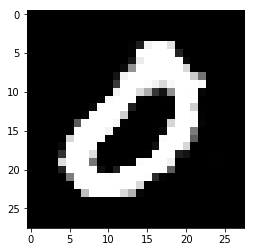

Number batches 468
64(0/468) D: 0.6425, G: 0.9695
64(1/468) D: 0.6141, G: 1.0787
64(2/468) D: 0.5903, G: 0.9159
64(3/468) D: 0.6413, G: 1.2319
64(4/468) D: 0.6155, G: 0.8880
64(5/468) D: 0.7085, G: 1.1025
64(6/468) D: 0.5915, G: 0.9731
64(7/468) D: 0.5139, G: 0.8973
64(8/468) D: 0.5837, G: 1.0820
64(9/468) D: 0.6718, G: 1.0143
64(10/468) D: 0.6045, G: 0.9954
64(11/468) D: 0.5775, G: 1.0584
64(12/468) D: 0.5623, G: 0.9841
64(13/468) D: 0.6049, G: 1.0867
64(14/468) D: 0.6126, G: 1.0308
64(15/468) D: 0.6756, G: 0.9690
64(16/468) D: 0.6092, G: 1.0845
64(17/468) D: 0.6228, G: 0.9125
64(18/468) D: 0.6181, G: 1.0245
64(19/468) D: 0.6787, G: 0.9173
64(20/468) D: 0.6081, G: 1.0319
64(21/468) D: 0.6086, G: 1.0284
64(22/468) D: 0.6365, G: 1.0217
64(23/468) D: 0.5292, G: 1.0316
64(24/468) D: 0.6033, G: 1.0917
64(25/468) D: 0.6020, G: 0.8006
64(26/468) D: 0.6124, G: 1.0805
64(27/468) D: 0.5546, G: 1.0062
64(28/468) D: 0.5778, G: 1.0224
64(29/468) D: 0.6454, G: 1.1174
64(30/468) D: 0.6590, G: 0.8668

64(252/468) D: 0.6110, G: 0.9428
64(253/468) D: 0.5275, G: 1.1291
64(254/468) D: 0.6235, G: 0.9334
64(255/468) D: 0.6700, G: 0.7929
64(256/468) D: 0.6561, G: 1.0135
64(257/468) D: 0.5923, G: 1.0928
64(258/468) D: 0.6154, G: 0.9630
64(259/468) D: 0.5903, G: 1.0602
64(260/468) D: 0.5923, G: 0.9986
64(261/468) D: 0.5904, G: 1.0156
64(262/468) D: 0.6168, G: 0.9952
64(263/468) D: 0.6136, G: 0.9754
64(264/468) D: 0.6489, G: 1.0429
64(265/468) D: 0.5855, G: 1.0974
64(266/468) D: 0.6032, G: 0.9521
64(267/468) D: 0.5965, G: 1.1859
64(268/468) D: 0.6443, G: 1.0581
64(269/468) D: 0.6190, G: 0.9965
64(270/468) D: 0.6376, G: 0.9453
64(271/468) D: 0.6456, G: 0.8677
64(272/468) D: 0.5833, G: 1.0762
64(273/468) D: 0.6226, G: 0.9490
64(274/468) D: 0.5439, G: 0.9702
64(275/468) D: 0.5596, G: 1.0851
64(276/468) D: 0.5745, G: 0.9945
64(277/468) D: 0.5682, G: 1.0311
64(278/468) D: 0.5596, G: 1.1427
64(279/468) D: 0.6411, G: 0.8539
64(280/468) D: 0.5935, G: 1.1746
64(281/468) D: 0.5775, G: 1.0437
64(282/468

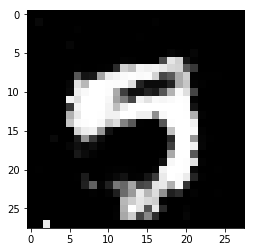

Number batches 468
65(0/468) D: 0.6355, G: 0.8604
65(1/468) D: 0.6141, G: 0.8738
65(2/468) D: 0.6384, G: 1.0172
65(3/468) D: 0.5587, G: 0.9543
65(4/468) D: 0.6186, G: 0.9710
65(5/468) D: 0.5895, G: 0.9383
65(6/468) D: 0.6202, G: 1.1500
65(7/468) D: 0.5874, G: 1.0419
65(8/468) D: 0.5743, G: 0.9311
65(9/468) D: 0.6396, G: 0.8918
65(10/468) D: 0.6044, G: 1.1217
65(11/468) D: 0.5730, G: 0.9565
65(12/468) D: 0.5781, G: 0.9764
65(13/468) D: 0.6325, G: 0.8506
65(14/468) D: 0.6039, G: 1.2521
65(15/468) D: 0.6382, G: 1.0256
65(16/468) D: 0.6155, G: 1.0263
65(17/468) D: 0.6105, G: 1.0622
65(18/468) D: 0.6165, G: 0.8498
65(19/468) D: 0.6563, G: 1.0252
65(20/468) D: 0.6198, G: 1.1407
65(21/468) D: 0.5755, G: 0.9405
65(22/468) D: 0.6008, G: 1.0067
65(23/468) D: 0.6047, G: 1.1587
65(24/468) D: 0.5918, G: 1.0593
65(25/468) D: 0.6323, G: 0.7864
65(26/468) D: 0.5977, G: 1.0201
65(27/468) D: 0.6144, G: 1.0794
65(28/468) D: 0.5899, G: 0.7964
65(29/468) D: 0.5780, G: 0.8956
65(30/468) D: 0.6602, G: 1.0950

65(252/468) D: 0.6042, G: 0.9549
65(253/468) D: 0.5660, G: 1.2178
65(254/468) D: 0.5923, G: 0.8964
65(255/468) D: 0.7296, G: 0.9907
65(256/468) D: 0.5621, G: 1.0576
65(257/468) D: 0.5703, G: 1.1138
65(258/468) D: 0.6348, G: 0.8845
65(259/468) D: 0.5948, G: 0.9052
65(260/468) D: 0.6242, G: 1.0290
65(261/468) D: 0.6166, G: 0.9131
65(262/468) D: 0.6289, G: 0.9113
65(263/468) D: 0.5826, G: 0.9498
65(264/468) D: 0.6481, G: 1.0703
65(265/468) D: 0.6381, G: 1.0319
65(266/468) D: 0.6602, G: 1.0054
65(267/468) D: 0.6078, G: 1.0502
65(268/468) D: 0.6176, G: 1.0339
65(269/468) D: 0.6330, G: 0.9176
65(270/468) D: 0.6138, G: 0.9560
65(271/468) D: 0.6335, G: 0.9630
65(272/468) D: 0.5923, G: 0.8393
65(273/468) D: 0.5833, G: 0.9226
65(274/468) D: 0.5717, G: 1.1292
65(275/468) D: 0.5713, G: 0.9198
65(276/468) D: 0.5748, G: 0.9887
65(277/468) D: 0.5631, G: 1.1112
65(278/468) D: 0.5365, G: 0.9551
65(279/468) D: 0.7258, G: 1.0728
65(280/468) D: 0.6102, G: 1.0806
65(281/468) D: 0.5893, G: 0.9714
65(282/468

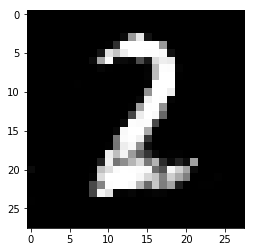

Number batches 468
66(0/468) D: 0.6286, G: 0.8890
66(1/468) D: 0.6429, G: 0.9964
66(2/468) D: 0.6450, G: 1.0292
66(3/468) D: 0.6478, G: 1.0126
66(4/468) D: 0.6196, G: 0.9863
66(5/468) D: 0.6044, G: 1.0086
66(6/468) D: 0.5672, G: 0.9516
66(7/468) D: 0.5887, G: 1.1502
66(8/468) D: 0.6501, G: 0.9817
66(9/468) D: 0.6362, G: 0.9328
66(10/468) D: 0.5683, G: 0.9720
66(11/468) D: 0.5897, G: 1.0194
66(12/468) D: 0.6041, G: 0.9408
66(13/468) D: 0.5678, G: 0.9812
66(14/468) D: 0.5735, G: 1.0125
66(15/468) D: 0.6241, G: 1.0046
66(16/468) D: 0.5837, G: 1.0190
66(17/468) D: 0.5863, G: 0.9997
66(18/468) D: 0.5879, G: 1.0635
66(19/468) D: 0.6602, G: 0.9657
66(20/468) D: 0.6468, G: 1.1959
66(21/468) D: 0.5731, G: 0.8231
66(22/468) D: 0.5866, G: 0.9603
66(23/468) D: 0.5584, G: 1.2065
66(24/468) D: 0.5632, G: 1.0075
66(25/468) D: 0.6041, G: 0.8061
66(26/468) D: 0.5892, G: 1.1617
66(27/468) D: 0.5841, G: 1.0616
66(28/468) D: 0.6200, G: 0.9967
66(29/468) D: 0.6131, G: 1.1249
66(30/468) D: 0.5868, G: 0.8769

66(252/468) D: 0.5650, G: 1.0859
66(253/468) D: 0.5783, G: 1.0550
66(254/468) D: 0.6042, G: 0.9398
66(255/468) D: 0.6302, G: 0.8610
66(256/468) D: 0.6601, G: 1.0278
66(257/468) D: 0.5942, G: 1.1537
66(258/468) D: 0.5911, G: 0.8554
66(259/468) D: 0.6043, G: 1.0501
66(260/468) D: 0.6187, G: 1.0165
66(261/468) D: 0.5847, G: 0.9744
66(262/468) D: 0.6265, G: 0.9155
66(263/468) D: 0.6432, G: 0.9358
66(264/468) D: 0.6741, G: 1.0842
66(265/468) D: 0.6079, G: 0.8831
66(266/468) D: 0.6177, G: 0.9845
66(267/468) D: 0.5672, G: 1.0954
66(268/468) D: 0.6343, G: 0.9992
66(269/468) D: 0.6464, G: 0.9688
66(270/468) D: 0.6625, G: 0.8992
66(271/468) D: 0.6254, G: 1.0278
66(272/468) D: 0.5943, G: 0.8950
66(273/468) D: 0.5851, G: 0.9251
66(274/468) D: 0.5927, G: 0.9730
66(275/468) D: 0.5698, G: 1.0229
66(276/468) D: 0.5907, G: 1.0191
66(277/468) D: 0.5536, G: 1.2686
66(278/468) D: 0.6084, G: 1.0966
66(279/468) D: 0.6672, G: 0.7794
66(280/468) D: 0.6287, G: 1.1130
66(281/468) D: 0.5950, G: 1.0805
66(282/468

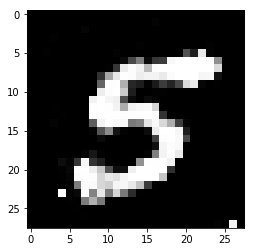

Number batches 468
67(0/468) D: 0.6552, G: 0.9184
67(1/468) D: 0.6326, G: 0.8217
67(2/468) D: 0.6631, G: 1.1496
67(3/468) D: 0.6508, G: 0.9970
67(4/468) D: 0.6138, G: 0.9462
67(5/468) D: 0.5908, G: 0.9359
67(6/468) D: 0.5827, G: 1.0381
67(7/468) D: 0.5492, G: 0.8843
67(8/468) D: 0.5933, G: 0.8903
67(9/468) D: 0.6368, G: 1.0686
67(10/468) D: 0.6122, G: 0.9779
67(11/468) D: 0.5726, G: 0.8093
67(12/468) D: 0.5823, G: 1.0873
67(13/468) D: 0.5960, G: 0.9311
67(14/468) D: 0.6235, G: 1.0189
67(15/468) D: 0.6699, G: 1.0346
67(16/468) D: 0.6005, G: 0.9448
67(17/468) D: 0.5857, G: 0.9523
67(18/468) D: 0.6369, G: 1.1017
67(19/468) D: 0.6445, G: 0.9651
67(20/468) D: 0.5937, G: 0.9992
67(21/468) D: 0.6148, G: 0.9667
67(22/468) D: 0.5926, G: 0.9868
67(23/468) D: 0.5682, G: 1.0230
67(24/468) D: 0.5716, G: 1.0010
67(25/468) D: 0.6057, G: 0.8711
67(26/468) D: 0.5645, G: 1.0808
67(27/468) D: 0.5905, G: 0.9593
67(28/468) D: 0.6100, G: 1.1091
67(29/468) D: 0.5927, G: 0.9095
67(30/468) D: 0.6397, G: 0.9163

67(253/468) D: 0.5663, G: 1.2757
67(254/468) D: 0.6161, G: 1.0253
67(255/468) D: 0.7150, G: 0.8811
67(256/468) D: 0.6382, G: 1.0345
67(257/468) D: 0.5718, G: 1.1417
67(258/468) D: 0.6106, G: 0.8794
67(259/468) D: 0.5691, G: 0.9843
67(260/468) D: 0.5741, G: 0.9571
67(261/468) D: 0.5776, G: 1.0460
67(262/468) D: 0.5932, G: 0.9399
67(263/468) D: 0.6492, G: 0.8850
67(264/468) D: 0.6132, G: 1.0040
67(265/468) D: 0.6138, G: 0.9841
67(266/468) D: 0.5832, G: 0.9797
67(267/468) D: 0.6012, G: 0.9960
67(268/468) D: 0.6222, G: 1.0996
67(269/468) D: 0.6305, G: 0.9904
67(270/468) D: 0.6654, G: 0.8881
67(271/468) D: 0.6948, G: 0.9593
67(272/468) D: 0.6285, G: 0.9278
67(273/468) D: 0.6485, G: 0.9862
67(274/468) D: 0.6005, G: 1.1919
67(275/468) D: 0.5786, G: 0.8661
67(276/468) D: 0.5992, G: 0.9011
67(277/468) D: 0.5720, G: 1.0572
67(278/468) D: 0.5677, G: 1.0877
67(279/468) D: 0.6625, G: 0.8554
67(280/468) D: 0.6186, G: 1.0244
67(281/468) D: 0.5947, G: 1.0979
67(282/468) D: 0.6437, G: 0.9916
67(283/468

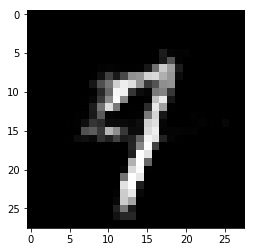

Number batches 468
68(0/468) D: 0.6575, G: 0.8221
68(1/468) D: 0.6537, G: 1.0181
68(2/468) D: 0.6119, G: 0.9332
68(3/468) D: 0.6138, G: 0.9617
68(4/468) D: 0.6289, G: 0.9258
68(5/468) D: 0.6133, G: 0.9551
68(6/468) D: 0.5829, G: 1.0017
68(7/468) D: 0.5298, G: 1.0469
68(8/468) D: 0.6084, G: 0.8606
68(9/468) D: 0.6249, G: 0.8948
68(10/468) D: 0.6806, G: 1.0919
68(11/468) D: 0.6353, G: 0.9931
68(12/468) D: 0.6106, G: 0.8762
68(13/468) D: 0.6151, G: 1.0086
68(14/468) D: 0.6040, G: 0.9442
68(15/468) D: 0.5992, G: 0.8379
68(16/468) D: 0.5861, G: 1.0203
68(17/468) D: 0.5373, G: 1.1722
68(18/468) D: 0.6254, G: 0.8616
68(19/468) D: 0.6847, G: 1.0147
68(20/468) D: 0.5903, G: 1.1296
68(21/468) D: 0.6341, G: 0.8380
68(22/468) D: 0.6302, G: 0.8944
68(23/468) D: 0.5363, G: 1.1503
68(24/468) D: 0.5756, G: 0.8066
68(25/468) D: 0.6285, G: 0.9780
68(26/468) D: 0.6260, G: 1.0863
68(27/468) D: 0.5777, G: 0.9052
68(28/468) D: 0.5914, G: 1.0815
68(29/468) D: 0.6006, G: 0.9245
68(30/468) D: 0.5952, G: 0.8569

68(253/468) D: 0.5806, G: 1.2124
68(254/468) D: 0.6088, G: 0.9595
68(255/468) D: 0.6481, G: 0.9436
68(256/468) D: 0.6124, G: 0.8978
68(257/468) D: 0.5680, G: 1.0665
68(258/468) D: 0.6758, G: 0.9711
68(259/468) D: 0.5762, G: 0.8827
68(260/468) D: 0.6596, G: 1.0577
68(261/468) D: 0.5999, G: 1.1345
68(262/468) D: 0.6105, G: 0.8275
68(263/468) D: 0.6438, G: 0.9331
68(264/468) D: 0.6542, G: 1.1077
68(265/468) D: 0.5965, G: 0.9578
68(266/468) D: 0.6143, G: 0.9793
68(267/468) D: 0.5999, G: 0.8560
68(268/468) D: 0.6348, G: 1.0034
68(269/468) D: 0.5726, G: 1.0843
68(270/468) D: 0.6587, G: 0.9389
68(271/468) D: 0.6436, G: 0.8784
68(272/468) D: 0.5946, G: 0.9393
68(273/468) D: 0.6363, G: 0.9520
68(274/468) D: 0.5914, G: 1.0202
68(275/468) D: 0.6050, G: 1.1339
68(276/468) D: 0.5767, G: 0.9163
68(277/468) D: 0.5875, G: 0.9627
68(278/468) D: 0.5345, G: 1.0311
68(279/468) D: 0.5880, G: 0.8420
68(280/468) D: 0.5748, G: 0.9586
68(281/468) D: 0.5642, G: 1.1450
68(282/468) D: 0.6355, G: 1.0513
68(283/468

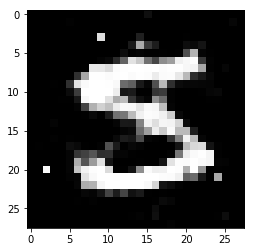

Number batches 468
69(0/468) D: 0.6709, G: 0.9231
69(1/468) D: 0.6412, G: 0.8927
69(2/468) D: 0.6113, G: 0.8599
69(3/468) D: 0.5822, G: 1.0728
69(4/468) D: 0.6010, G: 1.0232
69(5/468) D: 0.6442, G: 0.9608
69(6/468) D: 0.5970, G: 1.0216
69(7/468) D: 0.5661, G: 0.9978
69(8/468) D: 0.5562, G: 0.9753
69(9/468) D: 0.6726, G: 0.9926
69(10/468) D: 0.6256, G: 0.9596
69(11/468) D: 0.5959, G: 0.9954
69(12/468) D: 0.5775, G: 1.1234
69(13/468) D: 0.6461, G: 0.9373
69(14/468) D: 0.5858, G: 0.8732
69(15/468) D: 0.6820, G: 1.0439
69(16/468) D: 0.6021, G: 0.8400
69(17/468) D: 0.5954, G: 1.0166
69(18/468) D: 0.6699, G: 0.9268
69(19/468) D: 0.6660, G: 0.9225
69(20/468) D: 0.5697, G: 0.8880
69(21/468) D: 0.5981, G: 1.0983
69(22/468) D: 0.5686, G: 1.0097
69(23/468) D: 0.5607, G: 1.0236
69(24/468) D: 0.5419, G: 1.0270
69(25/468) D: 0.6304, G: 0.8204
69(26/468) D: 0.5995, G: 1.0316
69(27/468) D: 0.5457, G: 0.9761
69(28/468) D: 0.6077, G: 1.1771
69(29/468) D: 0.6061, G: 0.8508
69(30/468) D: 0.6335, G: 1.0445

69(252/468) D: 0.6107, G: 0.9417
69(253/468) D: 0.5929, G: 1.1150
69(254/468) D: 0.6425, G: 1.0087
69(255/468) D: 0.6842, G: 0.8884
69(256/468) D: 0.6215, G: 1.0388
69(257/468) D: 0.5384, G: 1.1869
69(258/468) D: 0.6808, G: 0.8726
69(259/468) D: 0.6376, G: 1.0752
69(260/468) D: 0.6601, G: 0.8080
69(261/468) D: 0.5915, G: 0.8824
69(262/468) D: 0.5960, G: 0.8959
69(263/468) D: 0.6088, G: 0.9191
69(264/468) D: 0.6637, G: 0.9342
69(265/468) D: 0.6282, G: 1.1729
69(266/468) D: 0.6076, G: 0.9097
69(267/468) D: 0.5987, G: 1.0021
69(268/468) D: 0.6081, G: 0.9594
69(269/468) D: 0.6217, G: 0.9622
69(270/468) D: 0.6189, G: 0.9894
69(271/468) D: 0.6602, G: 0.8656
69(272/468) D: 0.6120, G: 0.9338
69(273/468) D: 0.5994, G: 0.9680
69(274/468) D: 0.5572, G: 0.9440
69(275/468) D: 0.5420, G: 0.9424
69(276/468) D: 0.5860, G: 1.0202
69(277/468) D: 0.6083, G: 1.0272
69(278/468) D: 0.6007, G: 1.0031
69(279/468) D: 0.6255, G: 0.8695
69(280/468) D: 0.5984, G: 1.0028
69(281/468) D: 0.5872, G: 0.9181
69(282/468

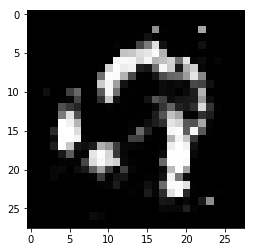

Number batches 468
70(0/468) D: 0.6267, G: 0.8303
70(1/468) D: 0.6379, G: 0.7949
70(2/468) D: 0.6590, G: 0.9705
70(3/468) D: 0.6047, G: 1.0210
70(4/468) D: 0.5664, G: 0.8820
70(5/468) D: 0.6291, G: 0.8623
70(6/468) D: 0.5826, G: 1.1118
70(7/468) D: 0.5557, G: 1.0057
70(8/468) D: 0.6137, G: 0.9958
70(9/468) D: 0.6840, G: 1.1340
70(10/468) D: 0.6280, G: 1.0009
70(11/468) D: 0.5971, G: 1.0298
70(12/468) D: 0.6101, G: 0.9166
70(13/468) D: 0.6560, G: 0.9124
70(14/468) D: 0.6175, G: 1.0512
70(15/468) D: 0.6533, G: 0.8459
70(16/468) D: 0.5645, G: 0.9124
70(17/468) D: 0.6109, G: 1.1307
70(18/468) D: 0.6221, G: 0.8340
70(19/468) D: 0.6269, G: 0.9600
70(20/468) D: 0.5959, G: 1.0681
70(21/468) D: 0.5877, G: 0.9391
70(22/468) D: 0.5597, G: 0.8686
70(23/468) D: 0.6023, G: 1.3315
70(24/468) D: 0.6233, G: 0.8631
70(25/468) D: 0.6052, G: 0.7066
70(26/468) D: 0.6221, G: 1.1368
70(27/468) D: 0.6124, G: 1.0427
70(28/468) D: 0.5848, G: 0.9105
70(29/468) D: 0.6108, G: 0.9708
70(30/468) D: 0.6500, G: 0.8567

70(252/468) D: 0.6577, G: 1.0165
70(253/468) D: 0.6005, G: 1.0849
70(254/468) D: 0.6226, G: 0.9541
70(255/468) D: 0.6441, G: 0.8136
70(256/468) D: 0.6213, G: 1.0054
70(257/468) D: 0.5764, G: 1.0515
70(258/468) D: 0.6599, G: 0.9978
70(259/468) D: 0.5690, G: 0.8276
70(260/468) D: 0.6080, G: 0.8960
70(261/468) D: 0.6167, G: 1.0109
70(262/468) D: 0.6559, G: 0.9383
70(263/468) D: 0.6278, G: 0.8291
70(264/468) D: 0.5933, G: 0.9558
70(265/468) D: 0.6070, G: 0.9689
70(266/468) D: 0.5999, G: 0.8816
70(267/468) D: 0.5631, G: 0.9935
70(268/468) D: 0.6128, G: 1.0432
70(269/468) D: 0.6267, G: 1.0338
70(270/468) D: 0.6290, G: 0.9193
70(271/468) D: 0.5975, G: 0.8162
70(272/468) D: 0.6489, G: 0.9159
70(273/468) D: 0.6155, G: 0.9657
70(274/468) D: 0.5402, G: 0.9059
70(275/468) D: 0.5439, G: 0.9745
70(276/468) D: 0.5849, G: 1.0000
70(277/468) D: 0.5814, G: 1.0235
70(278/468) D: 0.5666, G: 0.9874
70(279/468) D: 0.6360, G: 0.8224
70(280/468) D: 0.6354, G: 1.0695
70(281/468) D: 0.5880, G: 0.9744
70(282/468

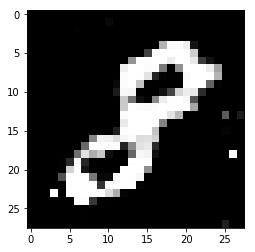

Number batches 468
71(0/468) D: 0.6359, G: 0.9681
71(1/468) D: 0.6232, G: 1.0424
71(2/468) D: 0.5805, G: 1.1131
71(3/468) D: 0.6283, G: 0.8349
71(4/468) D: 0.5851, G: 1.0239
71(5/468) D: 0.6074, G: 1.0305
71(6/468) D: 0.5737, G: 0.9898
71(7/468) D: 0.5459, G: 0.9725
71(8/468) D: 0.5969, G: 1.0306
71(9/468) D: 0.6482, G: 0.9288
71(10/468) D: 0.6255, G: 0.8501
71(11/468) D: 0.5670, G: 1.0763
71(12/468) D: 0.5925, G: 1.0233
71(13/468) D: 0.5838, G: 0.8358
71(14/468) D: 0.6013, G: 0.9964
71(15/468) D: 0.6336, G: 1.0331
71(16/468) D: 0.6113, G: 1.1304
71(17/468) D: 0.6299, G: 1.0269
71(18/468) D: 0.6831, G: 0.8398
71(19/468) D: 0.6383, G: 0.8939
71(20/468) D: 0.5924, G: 1.0156
71(21/468) D: 0.6101, G: 1.0232
71(22/468) D: 0.5842, G: 0.9779
71(23/468) D: 0.5689, G: 1.1608
71(24/468) D: 0.6490, G: 1.1064
71(25/468) D: 0.6186, G: 0.7410
71(26/468) D: 0.6537, G: 1.0225
71(27/468) D: 0.5887, G: 1.0001
71(28/468) D: 0.6321, G: 1.0538
71(29/468) D: 0.5821, G: 0.8462
71(30/468) D: 0.5791, G: 0.8022

71(252/468) D: 0.5997, G: 0.9529
71(253/468) D: 0.5780, G: 1.0527
71(254/468) D: 0.5965, G: 0.9722
71(255/468) D: 0.6723, G: 0.8878
71(256/468) D: 0.6684, G: 1.1288
71(257/468) D: 0.5838, G: 1.1741
71(258/468) D: 0.5869, G: 0.8830
71(259/468) D: 0.6152, G: 0.9562
71(260/468) D: 0.6156, G: 1.0060
71(261/468) D: 0.5919, G: 1.0354
71(262/468) D: 0.6081, G: 0.8640
71(263/468) D: 0.6236, G: 0.8897
71(264/468) D: 0.6612, G: 0.9161
71(265/468) D: 0.5868, G: 0.9380
71(266/468) D: 0.6005, G: 1.0981
71(267/468) D: 0.5657, G: 0.9832
71(268/468) D: 0.5612, G: 0.9586
71(269/468) D: 0.6075, G: 1.1181
71(270/468) D: 0.6717, G: 0.8426
71(271/468) D: 0.6508, G: 0.7779
71(272/468) D: 0.6033, G: 1.0067
71(273/468) D: 0.6309, G: 1.0110
71(274/468) D: 0.5876, G: 0.9439
71(275/468) D: 0.5402, G: 0.9932
71(276/468) D: 0.5915, G: 1.0196
71(277/468) D: 0.6370, G: 1.1722
71(278/468) D: 0.5776, G: 0.9968
71(279/468) D: 0.6544, G: 0.9070
71(280/468) D: 0.5845, G: 0.9966
71(281/468) D: 0.5396, G: 1.0025
71(282/468

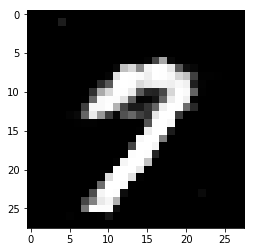

Number batches 468
72(0/468) D: 0.6524, G: 0.6677
72(1/468) D: 0.7394, G: 1.2417
72(2/468) D: 0.6949, G: 0.8501
72(3/468) D: 0.6341, G: 0.9143
72(4/468) D: 0.6192, G: 0.9408
72(5/468) D: 0.5735, G: 0.8436
72(6/468) D: 0.6263, G: 1.0346
72(7/468) D: 0.5856, G: 1.0707
72(8/468) D: 0.6019, G: 0.9329
72(9/468) D: 0.6798, G: 0.8434
72(10/468) D: 0.6265, G: 0.9184
72(11/468) D: 0.6083, G: 1.0214
72(12/468) D: 0.6121, G: 1.0955
72(13/468) D: 0.6556, G: 0.7948
72(14/468) D: 0.6807, G: 0.9915
72(15/468) D: 0.6615, G: 0.9280
72(16/468) D: 0.5915, G: 0.9282
72(17/468) D: 0.6307, G: 0.9595
72(18/468) D: 0.6440, G: 1.0246
72(19/468) D: 0.6209, G: 0.9584
72(20/468) D: 0.6090, G: 1.0580
72(21/468) D: 0.6180, G: 0.9609
72(22/468) D: 0.6117, G: 0.8663
72(23/468) D: 0.5554, G: 1.0252
72(24/468) D: 0.5649, G: 1.0772
72(25/468) D: 0.6562, G: 0.7647
72(26/468) D: 0.6257, G: 0.9941
72(27/468) D: 0.5843, G: 1.1834
72(28/468) D: 0.6198, G: 0.9111
72(29/468) D: 0.5897, G: 0.8625
72(30/468) D: 0.6193, G: 1.0012

72(252/468) D: 0.6127, G: 1.0000
72(253/468) D: 0.6172, G: 0.9896
72(254/468) D: 0.6251, G: 0.8794
72(255/468) D: 0.6578, G: 0.7756
72(256/468) D: 0.6241, G: 1.0010
72(257/468) D: 0.6003, G: 1.1827
72(258/468) D: 0.6041, G: 0.8652
72(259/468) D: 0.6252, G: 1.0015
72(260/468) D: 0.6237, G: 1.0375
72(261/468) D: 0.6164, G: 0.8906
72(262/468) D: 0.6233, G: 0.8122
72(263/468) D: 0.6484, G: 1.0198
72(264/468) D: 0.6227, G: 0.8798
72(265/468) D: 0.5975, G: 0.9715
72(266/468) D: 0.5896, G: 0.9967
72(267/468) D: 0.5925, G: 0.8405
72(268/468) D: 0.5908, G: 0.9007
72(269/468) D: 0.6097, G: 1.0391
72(270/468) D: 0.6153, G: 1.0526
72(271/468) D: 0.6123, G: 0.9755
72(272/468) D: 0.5905, G: 0.8508
72(273/468) D: 0.6406, G: 1.0510
72(274/468) D: 0.5666, G: 0.9517
72(275/468) D: 0.5746, G: 0.9943
72(276/468) D: 0.6102, G: 0.9900
72(277/468) D: 0.5567, G: 1.0551
72(278/468) D: 0.5384, G: 0.9466
72(279/468) D: 0.6070, G: 0.9010
72(280/468) D: 0.6058, G: 1.1550
72(281/468) D: 0.5643, G: 0.9626
72(282/468

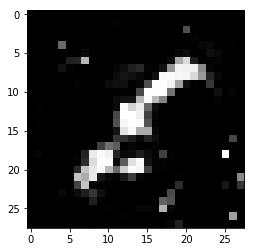

Number batches 468
73(0/468) D: 0.6470, G: 1.0524
73(1/468) D: 0.6288, G: 0.9434
73(2/468) D: 0.6206, G: 0.8785
73(3/468) D: 0.6165, G: 1.1278
73(4/468) D: 0.5763, G: 1.0495
73(5/468) D: 0.6062, G: 0.8839
73(6/468) D: 0.6300, G: 1.1780
73(7/468) D: 0.5426, G: 0.8966
73(8/468) D: 0.5753, G: 1.0547
73(9/468) D: 0.6650, G: 1.0437
73(10/468) D: 0.6273, G: 0.8308
73(11/468) D: 0.6212, G: 0.8299
73(12/468) D: 0.6009, G: 1.1284
73(13/468) D: 0.6408, G: 0.8696
73(14/468) D: 0.6045, G: 0.9122
73(15/468) D: 0.6197, G: 1.1326
73(16/468) D: 0.6160, G: 0.9129
73(17/468) D: 0.6337, G: 0.9868
73(18/468) D: 0.6099, G: 0.8354
73(19/468) D: 0.6269, G: 0.9528
73(20/468) D: 0.6039, G: 1.0572
73(21/468) D: 0.6131, G: 0.9210
73(22/468) D: 0.5989, G: 0.9619
73(23/468) D: 0.5487, G: 1.0162
73(24/468) D: 0.5901, G: 1.0159
73(25/468) D: 0.6429, G: 0.7536
73(26/468) D: 0.6260, G: 0.9873
73(27/468) D: 0.5644, G: 0.9581
73(28/468) D: 0.5688, G: 0.9614
73(29/468) D: 0.5924, G: 1.0323
73(30/468) D: 0.6405, G: 0.8843

73(252/468) D: 0.6359, G: 1.0385
73(253/468) D: 0.5616, G: 1.0519
73(254/468) D: 0.6125, G: 0.9276
73(255/468) D: 0.6853, G: 0.8205
73(256/468) D: 0.6399, G: 0.9781
73(257/468) D: 0.6119, G: 1.2093
73(258/468) D: 0.6404, G: 0.9628
73(259/468) D: 0.6045, G: 0.7766
73(260/468) D: 0.6475, G: 1.0684
73(261/468) D: 0.6271, G: 0.9894
73(262/468) D: 0.6092, G: 0.8371
73(263/468) D: 0.6443, G: 0.9348
73(264/468) D: 0.6238, G: 0.9587
73(265/468) D: 0.6160, G: 1.0207
73(266/468) D: 0.5610, G: 0.9160
73(267/468) D: 0.5924, G: 1.1322
73(268/468) D: 0.5935, G: 0.9238
73(269/468) D: 0.6007, G: 1.0343
73(270/468) D: 0.6170, G: 0.8503
73(271/468) D: 0.6462, G: 0.8226
73(272/468) D: 0.6245, G: 1.0206
73(273/468) D: 0.5881, G: 0.9666
73(274/468) D: 0.5152, G: 0.9243
73(275/468) D: 0.5662, G: 1.1859
73(276/468) D: 0.5712, G: 0.9511
73(277/468) D: 0.5447, G: 0.9950
73(278/468) D: 0.5528, G: 1.1352
73(279/468) D: 0.6881, G: 0.8831
73(280/468) D: 0.6411, G: 0.9372
73(281/468) D: 0.5686, G: 1.1025
73(282/468

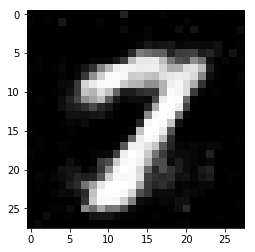

Number batches 468
74(0/468) D: 0.6393, G: 0.7257
74(1/468) D: 0.6605, G: 0.9582
74(2/468) D: 0.6419, G: 0.9642
74(3/468) D: 0.6282, G: 1.0310
74(4/468) D: 0.6026, G: 0.9287
74(5/468) D: 0.6403, G: 1.0335
74(6/468) D: 0.6100, G: 0.9327
74(7/468) D: 0.5748, G: 0.9530
74(8/468) D: 0.6195, G: 1.0040
74(9/468) D: 0.6284, G: 0.9700
74(10/468) D: 0.6283, G: 1.1062
74(11/468) D: 0.5471, G: 1.0072
74(12/468) D: 0.5777, G: 0.8051
74(13/468) D: 0.6560, G: 1.0101
74(14/468) D: 0.6510, G: 0.9463
74(15/468) D: 0.6457, G: 0.8453
74(16/468) D: 0.5974, G: 1.0533
74(17/468) D: 0.6137, G: 0.9516
74(18/468) D: 0.6371, G: 0.9961
74(19/468) D: 0.6500, G: 0.7670
74(20/468) D: 0.6079, G: 0.9741
74(21/468) D: 0.5800, G: 1.0136
74(22/468) D: 0.6011, G: 0.8236
74(23/468) D: 0.5641, G: 1.1518
74(24/468) D: 0.5451, G: 0.9631
74(25/468) D: 0.6508, G: 0.9562
74(26/468) D: 0.6250, G: 1.2237
74(27/468) D: 0.5794, G: 1.0277
74(28/468) D: 0.6126, G: 0.9896
74(29/468) D: 0.6558, G: 1.0955
74(30/468) D: 0.7221, G: 0.9509

74(252/468) D: 0.5986, G: 1.1135
74(253/468) D: 0.5698, G: 1.1986
74(254/468) D: 0.6152, G: 0.8304
74(255/468) D: 0.6705, G: 0.8784
74(256/468) D: 0.6500, G: 1.1210
74(257/468) D: 0.5889, G: 1.1877
74(258/468) D: 0.7087, G: 0.8714
74(259/468) D: 0.5947, G: 0.7872
74(260/468) D: 0.6094, G: 1.0141
74(261/468) D: 0.6091, G: 1.1063
74(262/468) D: 0.6368, G: 0.8555
74(263/468) D: 0.6466, G: 0.8551
74(264/468) D: 0.6614, G: 1.0166
74(265/468) D: 0.5766, G: 0.9298
74(266/468) D: 0.5805, G: 1.0319
74(267/468) D: 0.5566, G: 0.9507
74(268/468) D: 0.5527, G: 1.0262
74(269/468) D: 0.6270, G: 1.0678
74(270/468) D: 0.6041, G: 0.9569
74(271/468) D: 0.6367, G: 0.9387
74(272/468) D: 0.6566, G: 1.2012
74(273/468) D: 0.6063, G: 0.7761
74(274/468) D: 0.5855, G: 1.1223
74(275/468) D: 0.5380, G: 0.9825
74(276/468) D: 0.5780, G: 1.0766
74(277/468) D: 0.5641, G: 1.1108
74(278/468) D: 0.5624, G: 1.0483
74(279/468) D: 0.6207, G: 0.8344
74(280/468) D: 0.6674, G: 1.0395
74(281/468) D: 0.6182, G: 1.0590
74(282/468

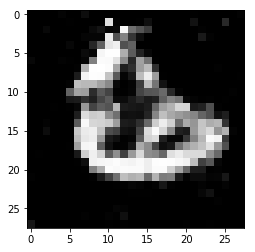

Number batches 468
75(0/468) D: 0.6779, G: 0.8252
75(1/468) D: 0.6306, G: 0.8591
75(2/468) D: 0.5727, G: 1.0560
75(3/468) D: 0.6234, G: 0.9835
75(4/468) D: 0.5970, G: 0.9285
75(5/468) D: 0.6373, G: 0.9317
75(6/468) D: 0.5611, G: 0.9026
75(7/468) D: 0.5753, G: 1.0615
75(8/468) D: 0.5792, G: 0.9251
75(9/468) D: 0.6625, G: 0.8333
75(10/468) D: 0.6347, G: 0.9836
75(11/468) D: 0.5833, G: 1.0576
75(12/468) D: 0.6063, G: 1.0074
75(13/468) D: 0.6215, G: 0.8837
75(14/468) D: 0.6141, G: 1.0314
75(15/468) D: 0.6345, G: 1.0126
75(16/468) D: 0.6109, G: 0.9795
75(17/468) D: 0.6318, G: 0.7913
75(18/468) D: 0.6069, G: 0.9208
75(19/468) D: 0.6207, G: 1.0679
75(20/468) D: 0.6269, G: 0.9456
75(21/468) D: 0.5957, G: 1.0006
75(22/468) D: 0.5892, G: 0.9756
75(23/468) D: 0.5580, G: 0.9362
75(24/468) D: 0.5471, G: 0.9004
75(25/468) D: 0.6141, G: 0.8961
75(26/468) D: 0.6043, G: 1.0210
75(27/468) D: 0.6295, G: 1.2356
75(28/468) D: 0.6491, G: 0.8044
75(29/468) D: 0.6347, G: 0.9479
75(30/468) D: 0.7156, G: 1.1687

75(252/468) D: 0.5985, G: 1.0222
75(253/468) D: 0.6181, G: 1.0066
75(254/468) D: 0.6319, G: 0.8658
75(255/468) D: 0.6834, G: 0.8704
75(256/468) D: 0.6180, G: 1.1687
75(257/468) D: 0.5830, G: 1.0811
75(258/468) D: 0.6674, G: 0.7758
75(259/468) D: 0.6416, G: 1.0301
75(260/468) D: 0.6445, G: 1.0375
75(261/468) D: 0.6149, G: 0.8188
75(262/468) D: 0.6241, G: 0.8492
75(263/468) D: 0.6444, G: 0.9514
75(264/468) D: 0.7005, G: 0.9420
75(265/468) D: 0.5842, G: 0.8746
75(266/468) D: 0.6154, G: 0.9431
75(267/468) D: 0.5893, G: 1.0678
75(268/468) D: 0.6192, G: 0.9369
75(269/468) D: 0.6218, G: 1.1166
75(270/468) D: 0.6259, G: 0.7075
75(271/468) D: 0.6224, G: 0.8599
75(272/468) D: 0.6118, G: 0.9320
75(273/468) D: 0.6170, G: 1.0279
75(274/468) D: 0.5621, G: 1.0625
75(275/468) D: 0.5856, G: 0.9568
75(276/468) D: 0.6459, G: 0.9141
75(277/468) D: 0.5590, G: 0.9413
75(278/468) D: 0.5714, G: 1.1437
75(279/468) D: 0.6107, G: 0.9979
75(280/468) D: 0.6400, G: 0.9554
75(281/468) D: 0.5762, G: 0.9663
75(282/468

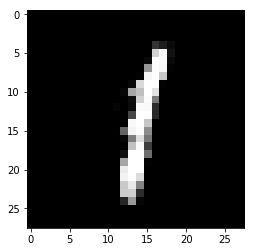

Number batches 468
76(0/468) D: 0.6710, G: 0.7518
76(1/468) D: 0.6718, G: 0.9861
76(2/468) D: 0.6153, G: 1.1375
76(3/468) D: 0.6365, G: 0.8619
76(4/468) D: 0.5955, G: 0.8724
76(5/468) D: 0.6069, G: 1.0436
76(6/468) D: 0.5792, G: 0.8551
76(7/468) D: 0.5602, G: 1.1013
76(8/468) D: 0.6118, G: 0.8918
76(9/468) D: 0.6132, G: 0.9430
76(10/468) D: 0.6087, G: 1.0380
76(11/468) D: 0.6195, G: 1.0108
76(12/468) D: 0.5849, G: 0.8701
76(13/468) D: 0.6077, G: 0.9295
76(14/468) D: 0.6121, G: 1.0572
76(15/468) D: 0.6439, G: 0.9083
76(16/468) D: 0.6124, G: 1.0765
76(17/468) D: 0.5782, G: 1.0341
76(18/468) D: 0.5943, G: 0.9427
76(19/468) D: 0.6506, G: 0.8258
76(20/468) D: 0.6037, G: 0.9659
76(21/468) D: 0.6201, G: 0.9326
76(22/468) D: 0.6321, G: 0.8897
76(23/468) D: 0.5839, G: 1.0086
76(24/468) D: 0.5577, G: 0.9903
76(25/468) D: 0.6358, G: 0.9101
76(26/468) D: 0.6365, G: 1.1450
76(27/468) D: 0.5990, G: 0.9013
76(28/468) D: 0.5917, G: 0.9499
76(29/468) D: 0.5734, G: 1.1167
76(30/468) D: 0.6140, G: 0.9951

76(252/468) D: 0.6060, G: 1.0492
76(253/468) D: 0.5925, G: 1.0475
76(254/468) D: 0.6484, G: 0.9458
76(255/468) D: 0.7025, G: 0.8110
76(256/468) D: 0.6383, G: 1.0156
76(257/468) D: 0.5781, G: 1.0052
76(258/468) D: 0.6537, G: 0.9153
76(259/468) D: 0.5722, G: 0.8361
76(260/468) D: 0.6307, G: 0.8750
76(261/468) D: 0.6094, G: 0.9239
76(262/468) D: 0.6460, G: 0.9122
76(263/468) D: 0.6184, G: 0.9155
76(264/468) D: 0.5873, G: 1.0212
76(265/468) D: 0.5900, G: 0.9971
76(266/468) D: 0.6222, G: 1.0273
76(267/468) D: 0.5379, G: 0.9394
76(268/468) D: 0.5778, G: 0.8660
76(269/468) D: 0.5608, G: 1.0198
76(270/468) D: 0.6846, G: 1.0027
76(271/468) D: 0.6382, G: 0.9811
76(272/468) D: 0.6147, G: 0.8412
76(273/468) D: 0.6370, G: 0.9929
76(274/468) D: 0.6194, G: 0.8740
76(275/468) D: 0.5761, G: 1.0827
76(276/468) D: 0.6318, G: 0.9940
76(277/468) D: 0.6072, G: 0.9996
76(278/468) D: 0.5701, G: 1.0763
76(279/468) D: 0.6044, G: 0.8529
76(280/468) D: 0.5971, G: 1.0654
76(281/468) D: 0.5738, G: 1.1435
76(282/468

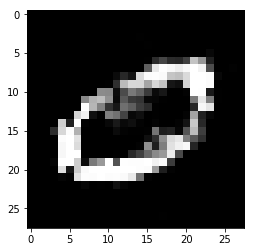

Number batches 468
77(0/468) D: 0.6511, G: 0.7985
77(1/468) D: 0.6822, G: 0.9437
77(2/468) D: 0.6438, G: 0.9842
77(3/468) D: 0.5942, G: 1.0967
77(4/468) D: 0.5646, G: 0.9143
77(5/468) D: 0.6204, G: 0.9614
77(6/468) D: 0.5545, G: 1.1071
77(7/468) D: 0.5263, G: 1.1159
77(8/468) D: 0.6049, G: 0.9889
77(9/468) D: 0.6952, G: 1.0710
77(10/468) D: 0.6884, G: 1.0821
77(11/468) D: 0.5766, G: 0.9041
77(12/468) D: 0.6163, G: 1.0722
77(13/468) D: 0.6517, G: 0.9501
77(14/468) D: 0.6159, G: 0.8456
77(15/468) D: 0.6696, G: 0.9222
77(16/468) D: 0.6107, G: 1.0266
77(17/468) D: 0.6184, G: 0.9258
77(18/468) D: 0.5712, G: 0.7988
77(19/468) D: 0.6347, G: 0.9479
77(20/468) D: 0.5774, G: 1.0778
77(21/468) D: 0.6255, G: 0.9301
77(22/468) D: 0.6223, G: 0.8858
77(23/468) D: 0.5615, G: 0.9589
77(24/468) D: 0.5650, G: 0.9219
77(25/468) D: 0.7015, G: 0.9909
77(26/468) D: 0.6513, G: 1.0162
77(27/468) D: 0.6250, G: 0.9925
77(28/468) D: 0.6363, G: 1.0419
77(29/468) D: 0.6257, G: 1.0116
77(30/468) D: 0.6287, G: 0.7657

77(253/468) D: 0.6165, G: 0.9727
77(254/468) D: 0.6320, G: 0.8995
77(255/468) D: 0.6560, G: 0.8590
77(256/468) D: 0.6024, G: 1.1126
77(257/468) D: 0.5969, G: 1.2044
77(258/468) D: 0.6476, G: 0.7875
77(259/468) D: 0.5981, G: 0.8511
77(260/468) D: 0.6391, G: 1.1927
77(261/468) D: 0.6577, G: 0.9886
77(262/468) D: 0.6174, G: 0.7695
77(263/468) D: 0.6347, G: 1.0416
77(264/468) D: 0.6702, G: 1.1036
77(265/468) D: 0.6502, G: 0.8866
77(266/468) D: 0.6216, G: 0.9983
77(267/468) D: 0.5981, G: 1.0941
77(268/468) D: 0.5762, G: 0.8479
77(269/468) D: 0.6496, G: 0.9339
77(270/468) D: 0.6286, G: 0.8896
77(271/468) D: 0.6358, G: 0.8957
77(272/468) D: 0.6018, G: 0.8962
77(273/468) D: 0.6662, G: 0.9773
77(274/468) D: 0.5866, G: 0.9875
77(275/468) D: 0.5463, G: 0.8511
77(276/468) D: 0.6269, G: 1.0705
77(277/468) D: 0.5633, G: 0.9843
77(278/468) D: 0.5678, G: 0.9243
77(279/468) D: 0.6232, G: 0.9459
77(280/468) D: 0.5861, G: 0.9337
77(281/468) D: 0.5466, G: 1.0082
77(282/468) D: 0.6173, G: 1.0876
77(283/468

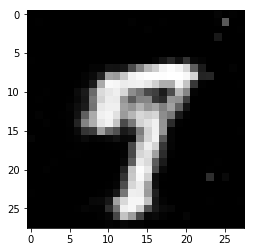

Number batches 468
78(0/468) D: 0.6728, G: 0.9237
78(1/468) D: 0.6802, G: 0.9404
78(2/468) D: 0.5988, G: 0.8257
78(3/468) D: 0.6662, G: 1.0822
78(4/468) D: 0.5792, G: 1.1345
78(5/468) D: 0.6331, G: 0.7230
78(6/468) D: 0.6006, G: 0.8564
78(7/468) D: 0.5962, G: 1.1666
78(8/468) D: 0.6186, G: 0.9519
78(9/468) D: 0.6594, G: 0.8436
78(10/468) D: 0.6597, G: 1.0158
78(11/468) D: 0.5993, G: 1.0554
78(12/468) D: 0.5783, G: 0.9159
78(13/468) D: 0.6538, G: 0.9848
78(14/468) D: 0.6185, G: 1.1064
78(15/468) D: 0.6278, G: 0.9090
78(16/468) D: 0.6495, G: 0.9889
78(17/468) D: 0.6177, G: 0.8896
78(18/468) D: 0.5807, G: 0.9770
78(19/468) D: 0.6412, G: 1.0014
78(20/468) D: 0.6281, G: 0.9091
78(21/468) D: 0.6029, G: 0.8928
78(22/468) D: 0.6239, G: 0.9425
78(23/468) D: 0.5733, G: 0.9478
78(24/468) D: 0.6136, G: 1.0764
78(25/468) D: 0.6567, G: 0.8822
78(26/468) D: 0.5881, G: 1.0070
78(27/468) D: 0.6000, G: 1.0804
78(28/468) D: 0.5628, G: 0.9569
78(29/468) D: 0.6014, G: 1.0853
78(30/468) D: 0.6463, G: 0.9962

78(253/468) D: 0.5961, G: 1.0922
78(254/468) D: 0.5815, G: 0.8953
78(255/468) D: 0.6637, G: 0.9343
78(256/468) D: 0.5884, G: 1.0278
78(257/468) D: 0.5725, G: 1.2412
78(258/468) D: 0.6213, G: 0.9491
78(259/468) D: 0.6016, G: 0.9336
78(260/468) D: 0.5851, G: 0.9422
78(261/468) D: 0.6311, G: 1.1100
78(262/468) D: 0.6103, G: 0.8981
78(263/468) D: 0.6465, G: 0.8277
78(264/468) D: 0.6133, G: 1.0633
78(265/468) D: 0.6397, G: 1.0067
78(266/468) D: 0.6079, G: 0.8378
78(267/468) D: 0.5747, G: 1.0296
78(268/468) D: 0.6089, G: 1.0110
78(269/468) D: 0.5772, G: 0.9455
78(270/468) D: 0.6065, G: 1.0318
78(271/468) D: 0.6588, G: 0.9618
78(272/468) D: 0.6330, G: 1.0117
78(273/468) D: 0.6451, G: 0.9136
78(274/468) D: 0.5556, G: 1.0702
78(275/468) D: 0.6053, G: 1.0633
78(276/468) D: 0.6104, G: 0.8836
78(277/468) D: 0.6110, G: 1.1784
78(278/468) D: 0.5784, G: 1.0693
78(279/468) D: 0.6294, G: 0.7890
78(280/468) D: 0.5666, G: 1.0520
78(281/468) D: 0.5469, G: 0.9123
78(282/468) D: 0.6659, G: 1.0037
78(283/468

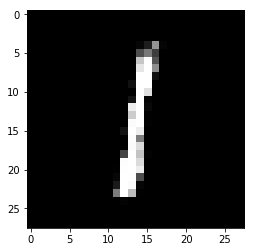

Number batches 468
79(0/468) D: 0.6307, G: 0.8145
79(1/468) D: 0.6572, G: 0.9486
79(2/468) D: 0.5963, G: 0.9692
79(3/468) D: 0.6132, G: 0.9653
79(4/468) D: 0.5941, G: 0.8966
79(5/468) D: 0.6122, G: 0.9546
79(6/468) D: 0.6230, G: 1.0495
79(7/468) D: 0.5812, G: 0.9494
79(8/468) D: 0.6013, G: 0.9116
79(9/468) D: 0.6683, G: 1.0644
79(10/468) D: 0.6577, G: 0.9472
79(11/468) D: 0.6150, G: 0.9605
79(12/468) D: 0.5790, G: 0.8948
79(13/468) D: 0.6405, G: 1.0930
79(14/468) D: 0.6150, G: 0.9754
79(15/468) D: 0.6749, G: 0.9524
79(16/468) D: 0.5947, G: 0.9668
79(17/468) D: 0.6354, G: 0.9896
79(18/468) D: 0.5815, G: 0.9636
79(19/468) D: 0.6394, G: 0.8677
79(20/468) D: 0.5940, G: 1.0245
79(21/468) D: 0.6414, G: 0.9284
79(22/468) D: 0.6033, G: 0.8563
79(23/468) D: 0.5570, G: 0.9722
79(24/468) D: 0.5535, G: 1.0369
79(25/468) D: 0.6385, G: 0.7858
79(26/468) D: 0.5926, G: 0.9699
79(27/468) D: 0.6093, G: 1.1175
79(28/468) D: 0.6027, G: 0.9174
79(29/468) D: 0.5968, G: 0.9194
79(30/468) D: 0.6519, G: 0.9748

79(252/468) D: 0.6132, G: 0.8200
79(253/468) D: 0.6014, G: 1.2394
79(254/468) D: 0.7147, G: 0.8269
79(255/468) D: 0.7035, G: 0.8108
79(256/468) D: 0.6413, G: 1.1047
79(257/468) D: 0.5588, G: 0.9750
79(258/468) D: 0.6215, G: 0.7848
79(259/468) D: 0.6164, G: 1.0273
79(260/468) D: 0.6020, G: 0.9915
79(261/468) D: 0.5746, G: 0.8932
79(262/468) D: 0.6313, G: 0.8695
79(263/468) D: 0.6877, G: 1.0369
79(264/468) D: 0.6660, G: 0.9618
79(265/468) D: 0.6080, G: 0.9102
79(266/468) D: 0.5712, G: 1.0151
79(267/468) D: 0.5789, G: 0.9806
79(268/468) D: 0.6018, G: 0.8559
79(269/468) D: 0.6089, G: 1.0769
79(270/468) D: 0.6582, G: 0.9950
79(271/468) D: 0.6302, G: 0.9294
79(272/468) D: 0.6588, G: 0.9468
79(273/468) D: 0.6147, G: 0.9835
79(274/468) D: 0.5882, G: 1.0011
79(275/468) D: 0.5502, G: 0.9011
79(276/468) D: 0.5965, G: 1.0760
79(277/468) D: 0.5870, G: 1.1178
79(278/468) D: 0.5875, G: 0.7900
79(279/468) D: 0.6787, G: 1.0893
79(280/468) D: 0.6021, G: 1.0456
79(281/468) D: 0.5728, G: 0.9478
79(282/468

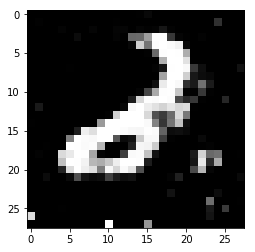

Number batches 468
80(0/468) D: 0.6802, G: 0.7347
80(1/468) D: 0.6546, G: 0.8889
80(2/468) D: 0.6313, G: 1.0267
80(3/468) D: 0.5890, G: 0.8931
80(4/468) D: 0.6249, G: 1.0113
80(5/468) D: 0.6502, G: 1.0187
80(6/468) D: 0.6233, G: 0.8343
80(7/468) D: 0.5740, G: 1.0165
80(8/468) D: 0.6148, G: 0.9792
80(9/468) D: 0.6628, G: 0.9507
80(10/468) D: 0.6547, G: 0.9448
80(11/468) D: 0.5895, G: 1.0544
80(12/468) D: 0.5807, G: 0.9286
80(13/468) D: 0.6416, G: 0.8301
80(14/468) D: 0.5973, G: 1.0001
80(15/468) D: 0.6489, G: 0.9803
80(16/468) D: 0.5851, G: 0.9606
80(17/468) D: 0.5711, G: 1.0031
80(18/468) D: 0.6179, G: 0.8826
80(19/468) D: 0.6324, G: 0.9167
80(20/468) D: 0.5859, G: 1.1145
80(21/468) D: 0.6357, G: 0.8567
80(22/468) D: 0.6036, G: 0.7802
80(23/468) D: 0.5887, G: 1.2376
80(24/468) D: 0.5650, G: 1.0579
80(25/468) D: 0.6411, G: 0.6617
80(26/468) D: 0.6562, G: 1.2172
80(27/468) D: 0.6107, G: 0.9850
80(28/468) D: 0.6012, G: 0.8147
80(29/468) D: 0.5980, G: 1.0533
80(30/468) D: 0.5906, G: 0.9417

80(252/468) D: 0.6093, G: 1.1056
80(253/468) D: 0.6051, G: 1.0214
80(254/468) D: 0.6346, G: 1.0339
80(255/468) D: 0.6655, G: 0.7284
80(256/468) D: 0.6247, G: 0.9967
80(257/468) D: 0.5457, G: 1.2211
80(258/468) D: 0.5986, G: 0.9144
80(259/468) D: 0.5325, G: 0.9084
80(260/468) D: 0.6034, G: 1.0636
80(261/468) D: 0.6259, G: 1.0804
80(262/468) D: 0.6321, G: 0.8172
80(263/468) D: 0.6058, G: 0.9399
80(264/468) D: 0.6313, G: 1.0466
80(265/468) D: 0.5812, G: 0.9147
80(266/468) D: 0.5893, G: 0.9934
80(267/468) D: 0.5794, G: 1.1013
80(268/468) D: 0.5964, G: 1.0702
80(269/468) D: 0.6071, G: 0.7931
80(270/468) D: 0.6427, G: 1.2052
80(271/468) D: 0.6582, G: 0.8516
80(272/468) D: 0.6006, G: 0.9324
80(273/468) D: 0.5869, G: 1.0190
80(274/468) D: 0.5749, G: 0.8898
80(275/468) D: 0.5800, G: 1.0669
80(276/468) D: 0.6076, G: 0.8827
80(277/468) D: 0.5929, G: 1.0903
80(278/468) D: 0.5981, G: 0.9745
80(279/468) D: 0.6660, G: 0.9734
80(280/468) D: 0.5774, G: 0.9810
80(281/468) D: 0.5688, G: 0.9324
80(282/468

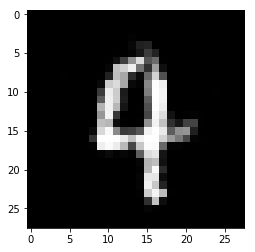

Number batches 468
81(0/468) D: 0.6183, G: 0.7620
81(1/468) D: 0.7078, G: 1.2533
81(2/468) D: 0.6566, G: 0.9633
81(3/468) D: 0.6404, G: 0.9598
81(4/468) D: 0.6432, G: 0.9939
81(5/468) D: 0.6348, G: 0.9118
81(6/468) D: 0.5976, G: 0.8435
81(7/468) D: 0.5764, G: 0.9699
81(8/468) D: 0.6055, G: 0.9509
81(9/468) D: 0.6544, G: 1.0192
81(10/468) D: 0.6917, G: 1.0496
81(11/468) D: 0.6124, G: 1.0013
81(12/468) D: 0.6254, G: 1.0100
81(13/468) D: 0.6439, G: 0.9202
81(14/468) D: 0.6450, G: 0.9687
81(15/468) D: 0.6618, G: 0.9279
81(16/468) D: 0.6323, G: 0.9508
81(17/468) D: 0.5817, G: 0.8945
81(18/468) D: 0.5992, G: 0.8972
81(19/468) D: 0.6371, G: 0.8614
81(20/468) D: 0.5931, G: 0.9770
81(21/468) D: 0.5996, G: 0.9498
81(22/468) D: 0.5989, G: 0.8828
81(23/468) D: 0.5466, G: 0.9209
81(24/468) D: 0.6118, G: 1.0611
81(25/468) D: 0.6360, G: 0.7711
81(26/468) D: 0.6107, G: 1.0457
81(27/468) D: 0.5686, G: 1.0072
81(28/468) D: 0.6015, G: 0.9558
81(29/468) D: 0.5986, G: 0.8399
81(30/468) D: 0.6279, G: 0.9505

81(252/468) D: 0.6073, G: 0.8737
81(253/468) D: 0.6111, G: 0.9862
81(254/468) D: 0.5973, G: 0.9361
81(255/468) D: 0.6553, G: 0.6677
81(256/468) D: 0.6616, G: 1.0140
81(257/468) D: 0.5419, G: 1.1544
81(258/468) D: 0.6501, G: 0.7455
81(259/468) D: 0.6392, G: 1.2027
81(260/468) D: 0.6418, G: 0.9877
81(261/468) D: 0.6115, G: 0.9077
81(262/468) D: 0.6109, G: 0.8336
81(263/468) D: 0.6396, G: 1.0392
81(264/468) D: 0.6344, G: 0.8291
81(265/468) D: 0.5886, G: 0.9736
81(266/468) D: 0.5957, G: 1.0679
81(267/468) D: 0.6271, G: 0.8954
81(268/468) D: 0.6192, G: 0.8116
81(269/468) D: 0.5957, G: 1.0476
81(270/468) D: 0.6364, G: 0.9925
81(271/468) D: 0.6687, G: 0.9610
81(272/468) D: 0.5891, G: 0.8714
81(273/468) D: 0.6579, G: 1.0354
81(274/468) D: 0.6157, G: 0.9715
81(275/468) D: 0.5776, G: 0.9484
81(276/468) D: 0.6246, G: 0.9824
81(277/468) D: 0.6104, G: 1.0584
81(278/468) D: 0.6097, G: 1.0551
81(279/468) D: 0.6166, G: 0.9498
81(280/468) D: 0.6311, G: 1.0325
81(281/468) D: 0.5785, G: 1.1739
81(282/468

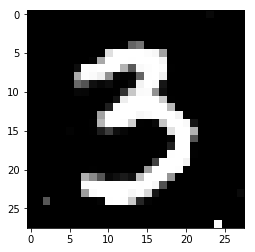

Number batches 468
82(0/468) D: 0.6365, G: 0.8854
82(1/468) D: 0.6703, G: 0.9734
82(2/468) D: 0.6831, G: 1.0643
82(3/468) D: 0.6283, G: 0.9249
82(4/468) D: 0.6169, G: 0.8913
82(5/468) D: 0.6135, G: 1.0031
82(6/468) D: 0.5933, G: 1.1348
82(7/468) D: 0.5938, G: 1.0946
82(8/468) D: 0.6106, G: 0.9291
82(9/468) D: 0.6769, G: 0.8742
82(10/468) D: 0.6657, G: 1.0842
82(11/468) D: 0.5518, G: 1.0081
82(12/468) D: 0.5604, G: 0.9725
82(13/468) D: 0.6733, G: 0.8105
82(14/468) D: 0.6133, G: 0.9381
82(15/468) D: 0.6570, G: 1.2179
82(16/468) D: 0.6386, G: 0.8155
82(17/468) D: 0.6155, G: 0.9542
82(18/468) D: 0.6268, G: 1.0420
82(19/468) D: 0.6402, G: 0.8714
82(20/468) D: 0.6286, G: 1.0609
82(21/468) D: 0.6064, G: 0.9926
82(22/468) D: 0.5697, G: 0.9249
82(23/468) D: 0.5252, G: 0.9040
82(24/468) D: 0.5419, G: 1.0194
82(25/468) D: 0.6423, G: 1.0757
82(26/468) D: 0.5989, G: 0.9223
82(27/468) D: 0.5884, G: 0.9309
82(28/468) D: 0.5786, G: 1.0118
82(29/468) D: 0.5936, G: 1.0358
82(30/468) D: 0.6136, G: 0.8074

82(252/468) D: 0.5984, G: 0.9684
82(253/468) D: 0.5712, G: 1.0786
82(254/468) D: 0.6376, G: 0.9356
82(255/468) D: 0.6424, G: 0.9270
82(256/468) D: 0.6219, G: 0.9743
82(257/468) D: 0.5640, G: 1.0915
82(258/468) D: 0.6603, G: 0.9638
82(259/468) D: 0.6375, G: 0.9893
82(260/468) D: 0.5918, G: 1.0080
82(261/468) D: 0.6162, G: 1.0215
82(262/468) D: 0.6425, G: 0.8134
82(263/468) D: 0.6274, G: 0.8336
82(264/468) D: 0.6470, G: 1.0548
82(265/468) D: 0.6240, G: 0.8664
82(266/468) D: 0.6445, G: 0.9853
82(267/468) D: 0.5757, G: 1.0888
82(268/468) D: 0.5980, G: 0.9610
82(269/468) D: 0.5990, G: 0.9333
82(270/468) D: 0.6242, G: 0.9878
82(271/468) D: 0.6686, G: 0.9033
82(272/468) D: 0.6521, G: 0.9335
82(273/468) D: 0.6163, G: 1.0224
82(274/468) D: 0.6103, G: 0.9792
82(275/468) D: 0.5941, G: 0.9874
82(276/468) D: 0.6596, G: 0.9943
82(277/468) D: 0.6255, G: 1.0273
82(278/468) D: 0.5824, G: 0.9109
82(279/468) D: 0.6612, G: 0.9119
82(280/468) D: 0.5868, G: 0.9656
82(281/468) D: 0.5910, G: 1.0701
82(282/468

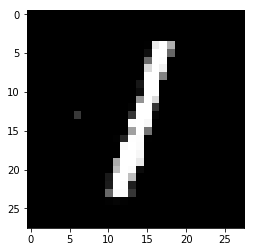

Number batches 468
83(0/468) D: 0.6576, G: 0.8981
83(1/468) D: 0.6619, G: 0.8621
83(2/468) D: 0.6319, G: 0.9510
83(3/468) D: 0.6190, G: 1.0528
83(4/468) D: 0.5702, G: 0.9901
83(5/468) D: 0.5849, G: 0.9127
83(6/468) D: 0.5672, G: 1.0446
83(7/468) D: 0.5890, G: 1.0503
83(8/468) D: 0.6152, G: 0.9318
83(9/468) D: 0.6453, G: 1.0052
83(10/468) D: 0.6557, G: 0.9622
83(11/468) D: 0.5819, G: 0.9084
83(12/468) D: 0.5863, G: 1.0217
83(13/468) D: 0.5732, G: 0.7345
83(14/468) D: 0.6629, G: 0.9797
83(15/468) D: 0.6783, G: 0.9636
83(16/468) D: 0.6042, G: 0.9528
83(17/468) D: 0.6021, G: 0.9793
83(18/468) D: 0.6297, G: 0.8912
83(19/468) D: 0.6280, G: 0.8022
83(20/468) D: 0.6408, G: 0.9483
83(21/468) D: 0.5827, G: 0.9965
83(22/468) D: 0.6149, G: 0.8005
83(23/468) D: 0.5514, G: 0.9731
83(24/468) D: 0.5520, G: 1.0501
83(25/468) D: 0.6436, G: 0.8858
83(26/468) D: 0.6339, G: 1.1896
83(27/468) D: 0.6154, G: 0.9140
83(28/468) D: 0.6437, G: 1.0677
83(29/468) D: 0.5508, G: 0.9222
83(30/468) D: 0.6620, G: 0.9345

83(252/468) D: 0.5873, G: 0.9970
83(253/468) D: 0.5867, G: 1.1451
83(254/468) D: 0.6219, G: 0.8087
83(255/468) D: 0.6699, G: 0.8363
83(256/468) D: 0.6249, G: 1.0263
83(257/468) D: 0.5582, G: 1.1969
83(258/468) D: 0.6392, G: 0.9214
83(259/468) D: 0.6292, G: 0.9759
83(260/468) D: 0.6186, G: 1.0274
83(261/468) D: 0.6068, G: 0.9075
83(262/468) D: 0.6036, G: 0.8095
83(263/468) D: 0.6254, G: 0.9029
83(264/468) D: 0.6330, G: 0.9611
83(265/468) D: 0.6087, G: 1.0221
83(266/468) D: 0.5979, G: 0.9765
83(267/468) D: 0.5638, G: 0.9816
83(268/468) D: 0.5738, G: 0.9038
83(269/468) D: 0.5853, G: 1.1516
83(270/468) D: 0.6429, G: 0.7601
83(271/468) D: 0.6409, G: 0.8805
83(272/468) D: 0.6534, G: 1.0685
83(273/468) D: 0.6545, G: 0.9055
83(274/468) D: 0.6199, G: 0.9511
83(275/468) D: 0.5856, G: 0.9323
83(276/468) D: 0.6090, G: 0.8547
83(277/468) D: 0.5772, G: 1.0747
83(278/468) D: 0.5707, G: 0.9872
83(279/468) D: 0.6110, G: 0.8615
83(280/468) D: 0.6081, G: 1.0344
83(281/468) D: 0.5696, G: 1.0360
83(282/468

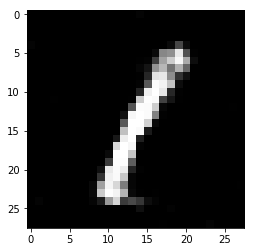

Number batches 468
84(0/468) D: 0.7028, G: 0.8829
84(1/468) D: 0.6079, G: 0.8910
84(2/468) D: 0.6183, G: 0.9746
84(3/468) D: 0.6243, G: 0.9215
84(4/468) D: 0.6075, G: 0.9399
84(5/468) D: 0.5815, G: 0.9145
84(6/468) D: 0.5977, G: 1.1151
84(7/468) D: 0.5786, G: 1.1063
84(8/468) D: 0.5764, G: 0.8043
84(9/468) D: 0.6572, G: 0.9365
84(10/468) D: 0.6661, G: 1.1159
84(11/468) D: 0.5884, G: 0.8960
84(12/468) D: 0.5490, G: 0.7647
84(13/468) D: 0.6185, G: 0.9141
84(14/468) D: 0.5726, G: 1.1014
84(15/468) D: 0.6542, G: 0.9063
84(16/468) D: 0.5947, G: 0.9747
84(17/468) D: 0.5890, G: 1.0611
84(18/468) D: 0.5960, G: 0.9041
84(19/468) D: 0.6276, G: 0.8931
84(20/468) D: 0.5673, G: 0.9274
84(21/468) D: 0.5948, G: 0.9184
84(22/468) D: 0.6206, G: 0.8168
84(23/468) D: 0.5678, G: 0.9855
84(24/468) D: 0.5743, G: 1.1031
84(25/468) D: 0.6367, G: 0.7079
84(26/468) D: 0.6645, G: 1.1299
84(27/468) D: 0.6132, G: 0.9615
84(28/468) D: 0.5856, G: 0.8396
84(29/468) D: 0.6318, G: 0.9538
84(30/468) D: 0.6194, G: 0.9435

84(252/468) D: 0.6340, G: 1.0122
84(253/468) D: 0.6150, G: 1.0684
84(254/468) D: 0.6134, G: 0.8781
84(255/468) D: 0.6672, G: 0.8509
84(256/468) D: 0.6192, G: 1.0069
84(257/468) D: 0.5631, G: 1.0425
84(258/468) D: 0.5995, G: 0.7535
84(259/468) D: 0.6428, G: 0.9339
84(260/468) D: 0.6230, G: 1.0174
84(261/468) D: 0.5918, G: 1.0164
84(262/468) D: 0.6742, G: 0.9384
84(263/468) D: 0.6473, G: 0.8972
84(264/468) D: 0.6092, G: 0.9005
84(265/468) D: 0.6149, G: 0.9361
84(266/468) D: 0.6031, G: 0.9396
84(267/468) D: 0.5710, G: 1.0334
84(268/468) D: 0.5757, G: 1.0142
84(269/468) D: 0.5994, G: 1.0730
84(270/468) D: 0.6558, G: 1.0037
84(271/468) D: 0.6269, G: 0.8548
84(272/468) D: 0.6387, G: 0.9567
84(273/468) D: 0.6467, G: 1.0167
84(274/468) D: 0.5986, G: 1.0466
84(275/468) D: 0.5488, G: 1.0215
84(276/468) D: 0.5867, G: 0.8225
84(277/468) D: 0.5422, G: 1.1081
84(278/468) D: 0.5520, G: 1.0357
84(279/468) D: 0.6527, G: 0.7891
84(280/468) D: 0.5866, G: 1.0527
84(281/468) D: 0.5383, G: 1.0422
84(282/468

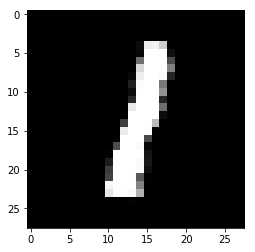

Number batches 468
85(0/468) D: 0.6662, G: 0.7860
85(1/468) D: 0.6769, G: 0.8038
85(2/468) D: 0.6124, G: 1.1148
85(3/468) D: 0.6033, G: 0.9093
85(4/468) D: 0.5824, G: 0.9063
85(5/468) D: 0.6197, G: 0.9219
85(6/468) D: 0.6036, G: 1.0974
85(7/468) D: 0.5310, G: 0.9318
85(8/468) D: 0.6296, G: 0.8883
85(9/468) D: 0.6930, G: 1.0485
85(10/468) D: 0.6323, G: 0.9135
85(11/468) D: 0.6169, G: 0.9169
85(12/468) D: 0.6512, G: 0.9809
85(13/468) D: 0.6312, G: 0.9222
85(14/468) D: 0.6019, G: 0.8270
85(15/468) D: 0.6991, G: 0.9869
85(16/468) D: 0.5897, G: 0.9924
85(17/468) D: 0.6205, G: 0.9850
85(18/468) D: 0.6438, G: 0.9602
85(19/468) D: 0.6776, G: 0.8313
85(20/468) D: 0.5942, G: 0.9848
85(21/468) D: 0.6036, G: 0.9997
85(22/468) D: 0.6182, G: 0.8811
85(23/468) D: 0.5630, G: 0.8960
85(24/468) D: 0.5809, G: 1.0257
85(25/468) D: 0.6266, G: 0.9443
85(26/468) D: 0.6058, G: 0.8559
85(27/468) D: 0.5795, G: 1.1212
85(28/468) D: 0.5676, G: 0.9639
85(29/468) D: 0.6010, G: 0.9485
85(30/468) D: 0.6522, G: 0.8578

85(252/468) D: 0.5947, G: 1.0516
85(253/468) D: 0.5801, G: 1.0683
85(254/468) D: 0.6085, G: 0.8827
85(255/468) D: 0.6711, G: 0.8680
85(256/468) D: 0.6206, G: 0.9767
85(257/468) D: 0.5830, G: 1.0498
85(258/468) D: 0.6593, G: 0.9912
85(259/468) D: 0.6257, G: 0.9980
85(260/468) D: 0.6100, G: 0.9085
85(261/468) D: 0.6407, G: 0.9607
85(262/468) D: 0.6220, G: 0.9209
85(263/468) D: 0.6180, G: 0.8051
85(264/468) D: 0.6596, G: 0.9796
85(265/468) D: 0.5943, G: 1.0177
85(266/468) D: 0.6254, G: 1.0788
85(267/468) D: 0.6229, G: 1.0743
85(268/468) D: 0.6307, G: 0.9653
85(269/468) D: 0.5908, G: 0.8442
85(270/468) D: 0.6247, G: 1.0871
85(271/468) D: 0.6736, G: 0.8339
85(272/468) D: 0.6120, G: 0.8208
85(273/468) D: 0.6574, G: 0.9796
85(274/468) D: 0.5617, G: 0.9485
85(275/468) D: 0.5965, G: 0.9982
85(276/468) D: 0.6102, G: 0.8643
85(277/468) D: 0.5593, G: 1.1484
85(278/468) D: 0.5584, G: 1.0263
85(279/468) D: 0.6365, G: 0.7270
85(280/468) D: 0.6054, G: 1.0931
85(281/468) D: 0.5225, G: 1.0412
85(282/468

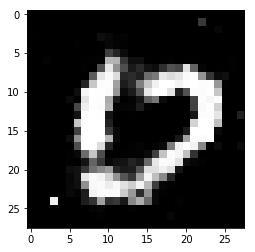

Number batches 468
86(0/468) D: 0.6126, G: 0.8256
86(1/468) D: 0.6322, G: 0.9975
86(2/468) D: 0.6811, G: 0.9898
86(3/468) D: 0.6418, G: 0.8956
86(4/468) D: 0.6504, G: 1.1209
86(5/468) D: 0.6048, G: 0.8128
86(6/468) D: 0.6118, G: 0.8609
86(7/468) D: 0.5868, G: 1.0621
86(8/468) D: 0.6093, G: 0.9334
86(9/468) D: 0.6307, G: 0.7787
86(10/468) D: 0.6159, G: 0.9810
86(11/468) D: 0.5761, G: 1.1329
86(12/468) D: 0.5831, G: 0.9685
86(13/468) D: 0.6150, G: 0.9575
86(14/468) D: 0.6491, G: 1.0381
86(15/468) D: 0.6541, G: 1.0370
86(16/468) D: 0.6392, G: 0.9895
86(17/468) D: 0.6272, G: 1.1419
86(18/468) D: 0.5986, G: 0.7900
86(19/468) D: 0.6579, G: 0.9479
86(20/468) D: 0.6420, G: 0.9374
86(21/468) D: 0.5994, G: 0.9120
86(22/468) D: 0.6046, G: 0.9414
86(23/468) D: 0.5488, G: 0.9889
86(24/468) D: 0.6005, G: 1.0339
86(25/468) D: 0.6122, G: 0.9225
86(26/468) D: 0.6265, G: 0.9227
86(27/468) D: 0.6248, G: 1.0526
86(28/468) D: 0.6359, G: 1.0277
86(29/468) D: 0.6061, G: 0.8555
86(30/468) D: 0.6319, G: 0.8408

86(252/468) D: 0.6183, G: 0.9503
86(253/468) D: 0.6208, G: 1.1730
86(254/468) D: 0.6334, G: 0.8623
86(255/468) D: 0.6703, G: 0.8834
86(256/468) D: 0.6155, G: 0.9941
86(257/468) D: 0.5736, G: 1.1527
86(258/468) D: 0.6765, G: 0.9798
86(259/468) D: 0.6326, G: 0.8062
86(260/468) D: 0.6673, G: 0.9676
86(261/468) D: 0.6295, G: 0.8949
86(262/468) D: 0.6290, G: 0.8940
86(263/468) D: 0.6569, G: 0.8712
86(264/468) D: 0.6554, G: 0.9478
86(265/468) D: 0.5902, G: 0.9270
86(266/468) D: 0.5905, G: 1.0966
86(267/468) D: 0.6410, G: 0.9783
86(268/468) D: 0.6108, G: 0.7999
86(269/468) D: 0.5982, G: 0.9829
86(270/468) D: 0.6156, G: 1.0116
86(271/468) D: 0.5852, G: 0.8988
86(272/468) D: 0.6367, G: 1.0064
86(273/468) D: 0.6055, G: 0.8627
86(274/468) D: 0.5949, G: 0.9195
86(275/468) D: 0.5730, G: 1.1109
86(276/468) D: 0.6410, G: 0.8909
86(277/468) D: 0.5834, G: 0.8351
86(278/468) D: 0.5645, G: 1.0105
86(279/468) D: 0.6343, G: 0.9183
86(280/468) D: 0.5891, G: 0.9664
86(281/468) D: 0.5374, G: 1.0461
86(282/468

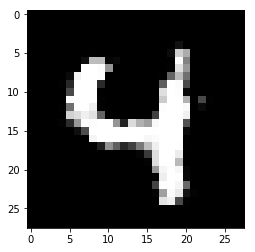

Number batches 468
87(0/468) D: 0.6815, G: 0.7729
87(1/468) D: 0.6411, G: 0.8983
87(2/468) D: 0.6388, G: 1.0973
87(3/468) D: 0.6725, G: 1.0620
87(4/468) D: 0.5849, G: 0.8685
87(5/468) D: 0.6487, G: 0.7933
87(6/468) D: 0.5761, G: 0.9673
87(7/468) D: 0.5785, G: 0.9409
87(8/468) D: 0.6777, G: 1.0644
87(9/468) D: 0.6761, G: 0.9880
87(10/468) D: 0.6407, G: 0.8732
87(11/468) D: 0.6111, G: 0.9616
87(12/468) D: 0.6045, G: 0.9423
87(13/468) D: 0.6384, G: 1.0209
87(14/468) D: 0.5935, G: 1.0077
87(15/468) D: 0.6418, G: 0.8870
87(16/468) D: 0.6174, G: 0.9199
87(17/468) D: 0.6125, G: 1.0126
87(18/468) D: 0.5825, G: 0.8228
87(19/468) D: 0.6655, G: 0.8245
87(20/468) D: 0.6148, G: 1.0383
87(21/468) D: 0.6204, G: 0.9436
87(22/468) D: 0.6071, G: 0.8973
87(23/468) D: 0.5108, G: 0.9345
87(24/468) D: 0.5904, G: 0.9438
87(25/468) D: 0.6058, G: 0.7925
87(26/468) D: 0.6439, G: 1.0217
87(27/468) D: 0.6025, G: 0.9255
87(28/468) D: 0.6015, G: 0.8301
87(29/468) D: 0.6141, G: 0.8629
87(30/468) D: 0.6305, G: 1.0115

87(252/468) D: 0.6417, G: 0.9043
87(253/468) D: 0.6226, G: 1.1320
87(254/468) D: 0.5967, G: 0.8879
87(255/468) D: 0.6703, G: 0.8220
87(256/468) D: 0.6151, G: 1.1109
87(257/468) D: 0.6177, G: 1.1010
87(258/468) D: 0.6475, G: 0.8076
87(259/468) D: 0.6099, G: 0.9044
87(260/468) D: 0.6165, G: 1.1249
87(261/468) D: 0.5892, G: 0.9401
87(262/468) D: 0.6198, G: 0.8218
87(263/468) D: 0.6538, G: 0.9669
87(264/468) D: 0.6271, G: 0.9250
87(265/468) D: 0.5820, G: 0.9314
87(266/468) D: 0.5700, G: 0.9864
87(267/468) D: 0.5677, G: 1.0877
87(268/468) D: 0.5928, G: 0.8550
87(269/468) D: 0.6207, G: 0.9601
87(270/468) D: 0.6098, G: 0.9561
87(271/468) D: 0.6541, G: 1.1019
87(272/468) D: 0.6221, G: 0.8043
87(273/468) D: 0.6420, G: 0.8858
87(274/468) D: 0.5595, G: 0.9648
87(275/468) D: 0.5574, G: 0.9591
87(276/468) D: 0.5919, G: 1.0103
87(277/468) D: 0.5860, G: 1.1599
87(278/468) D: 0.5879, G: 0.9436
87(279/468) D: 0.6538, G: 0.8585
87(280/468) D: 0.5999, G: 1.0436
87(281/468) D: 0.5633, G: 0.8911
87(282/468

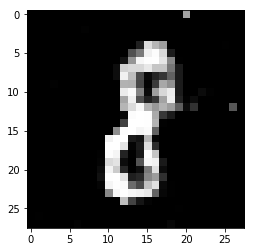

Number batches 468
88(0/468) D: 0.6654, G: 0.7589
88(1/468) D: 0.6536, G: 0.8572
88(2/468) D: 0.6274, G: 1.2372
88(3/468) D: 0.6457, G: 1.0080
88(4/468) D: 0.5933, G: 0.8115
88(5/468) D: 0.6346, G: 1.0147
88(6/468) D: 0.5918, G: 0.9550
88(7/468) D: 0.5214, G: 0.9465
88(8/468) D: 0.5880, G: 1.0233
88(9/468) D: 0.6873, G: 0.9354
88(10/468) D: 0.6676, G: 0.8902
88(11/468) D: 0.6235, G: 1.0647
88(12/468) D: 0.5977, G: 0.9720
88(13/468) D: 0.6262, G: 0.8393
88(14/468) D: 0.6317, G: 1.0521
88(15/468) D: 0.6879, G: 0.9611
88(16/468) D: 0.5947, G: 0.8335
88(17/468) D: 0.6261, G: 1.0183
88(18/468) D: 0.6388, G: 0.8930
88(19/468) D: 0.6111, G: 0.7695
88(20/468) D: 0.5924, G: 1.0592
88(21/468) D: 0.5733, G: 1.0149
88(22/468) D: 0.5905, G: 0.7249
88(23/468) D: 0.5193, G: 0.9715
88(24/468) D: 0.5665, G: 1.1271
88(25/468) D: 0.6727, G: 0.8927
88(26/468) D: 0.6377, G: 1.2274
88(27/468) D: 0.5890, G: 0.9478
88(28/468) D: 0.6268, G: 0.9630
88(29/468) D: 0.5811, G: 0.9323
88(30/468) D: 0.6437, G: 0.9706

88(253/468) D: 0.6072, G: 1.1298
88(254/468) D: 0.6248, G: 0.8584
88(255/468) D: 0.6802, G: 0.9109
88(256/468) D: 0.6548, G: 1.1602
88(257/468) D: 0.5871, G: 1.1300
88(258/468) D: 0.6409, G: 0.8142
88(259/468) D: 0.5682, G: 0.9002
88(260/468) D: 0.6180, G: 1.1730
88(261/468) D: 0.6178, G: 0.9371
88(262/468) D: 0.6486, G: 0.9093
88(263/468) D: 0.6378, G: 1.0565
88(264/468) D: 0.6244, G: 0.8974
88(265/468) D: 0.5724, G: 1.0180
88(266/468) D: 0.5664, G: 0.9832
88(267/468) D: 0.5723, G: 1.1264
88(268/468) D: 0.6246, G: 0.9837
88(269/468) D: 0.6292, G: 1.1683
88(270/468) D: 0.6429, G: 0.9306
88(271/468) D: 0.6625, G: 1.0163
88(272/468) D: 0.6008, G: 0.7907
88(273/468) D: 0.5926, G: 0.9229
88(274/468) D: 0.5641, G: 0.9922
88(275/468) D: 0.5407, G: 1.0168
88(276/468) D: 0.5890, G: 0.9015
88(277/468) D: 0.6220, G: 1.1994
88(278/468) D: 0.6079, G: 1.0701
88(279/468) D: 0.6422, G: 0.8926
88(280/468) D: 0.5750, G: 0.9699
88(281/468) D: 0.5791, G: 0.9892
88(282/468) D: 0.6492, G: 0.8758
88(283/468

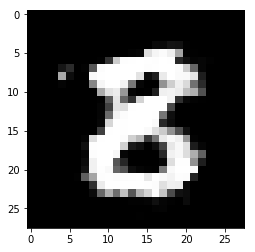

Number batches 468
89(0/468) D: 0.6882, G: 0.9196
89(1/468) D: 0.6346, G: 0.9953
89(2/468) D: 0.6618, G: 0.9262
89(3/468) D: 0.6398, G: 0.9326
89(4/468) D: 0.6369, G: 0.9645
89(5/468) D: 0.6259, G: 0.9631
89(6/468) D: 0.5809, G: 0.8238
89(7/468) D: 0.5599, G: 0.9649
89(8/468) D: 0.5861, G: 0.9878
89(9/468) D: 0.6865, G: 0.8533
89(10/468) D: 0.6457, G: 0.9795
89(11/468) D: 0.5995, G: 1.0417
89(12/468) D: 0.5873, G: 0.9727
89(13/468) D: 0.6219, G: 0.8292
89(14/468) D: 0.5844, G: 1.0023
89(15/468) D: 0.5979, G: 0.7690
89(16/468) D: 0.6592, G: 1.2272
89(17/468) D: 0.6013, G: 0.9440
89(18/468) D: 0.6029, G: 0.8424
89(19/468) D: 0.6325, G: 0.9563
89(20/468) D: 0.5726, G: 1.0107
89(21/468) D: 0.5901, G: 0.9341
89(22/468) D: 0.5918, G: 0.9874
89(23/468) D: 0.5862, G: 0.9824
89(24/468) D: 0.6058, G: 0.9429
89(25/468) D: 0.6319, G: 0.8993
89(26/468) D: 0.6100, G: 0.9997
89(27/468) D: 0.6104, G: 1.1057
89(28/468) D: 0.6287, G: 0.8877
89(29/468) D: 0.6573, G: 1.0817
89(30/468) D: 0.6445, G: 0.8984

89(252/468) D: 0.6692, G: 1.0514
89(253/468) D: 0.5681, G: 0.9962
89(254/468) D: 0.5953, G: 0.9335
89(255/468) D: 0.6407, G: 0.9612
89(256/468) D: 0.6000, G: 0.9809
89(257/468) D: 0.5734, G: 1.1426
89(258/468) D: 0.6461, G: 0.8996
89(259/468) D: 0.5810, G: 0.8771
89(260/468) D: 0.6407, G: 1.0253
89(261/468) D: 0.6374, G: 0.9960
89(262/468) D: 0.6529, G: 0.8315
89(263/468) D: 0.6718, G: 0.9643
89(264/468) D: 0.6534, G: 0.9147
89(265/468) D: 0.5746, G: 0.9995
89(266/468) D: 0.5977, G: 0.9538
89(267/468) D: 0.5615, G: 0.9470
89(268/468) D: 0.6185, G: 0.9775
89(269/468) D: 0.6146, G: 0.8887
89(270/468) D: 0.6322, G: 0.9976
89(271/468) D: 0.6287, G: 0.9000
89(272/468) D: 0.6369, G: 0.8422
89(273/468) D: 0.6302, G: 0.9658
89(274/468) D: 0.5932, G: 0.8884
89(275/468) D: 0.5925, G: 1.0402
89(276/468) D: 0.6514, G: 0.9341
89(277/468) D: 0.5796, G: 0.9794
89(278/468) D: 0.5627, G: 1.0400
89(279/468) D: 0.6001, G: 0.8724
89(280/468) D: 0.6052, G: 1.0153
89(281/468) D: 0.5638, G: 0.9210
89(282/468

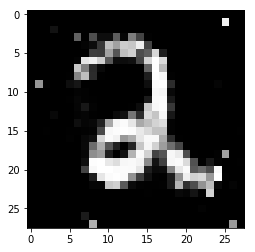

Number batches 468
90(0/468) D: 0.6045, G: 0.8130
90(1/468) D: 0.6639, G: 0.9813
90(2/468) D: 0.6306, G: 1.0034
90(3/468) D: 0.6290, G: 1.0532
90(4/468) D: 0.5777, G: 0.9288
90(5/468) D: 0.6258, G: 0.9361
90(6/468) D: 0.5810, G: 1.0012
90(7/468) D: 0.5227, G: 0.8915
90(8/468) D: 0.6361, G: 1.0564
90(9/468) D: 0.6329, G: 0.8745
90(10/468) D: 0.6195, G: 0.9018
90(11/468) D: 0.5830, G: 1.0376
90(12/468) D: 0.6389, G: 0.9411
90(13/468) D: 0.6331, G: 0.8810
90(14/468) D: 0.6253, G: 0.8681
90(15/468) D: 0.6820, G: 1.0552
90(16/468) D: 0.6099, G: 0.8821
90(17/468) D: 0.6863, G: 0.9763
90(18/468) D: 0.6147, G: 0.9233
90(19/468) D: 0.5932, G: 0.7145
90(20/468) D: 0.6200, G: 0.9122
90(21/468) D: 0.6076, G: 0.9568
90(22/468) D: 0.6176, G: 0.9527
90(23/468) D: 0.5860, G: 0.8903
90(24/468) D: 0.5842, G: 0.9167
90(25/468) D: 0.6268, G: 0.8858
90(26/468) D: 0.6088, G: 1.0861
90(27/468) D: 0.5392, G: 0.9686
90(28/468) D: 0.5816, G: 0.9669
90(29/468) D: 0.6247, G: 1.1151
90(30/468) D: 0.6184, G: 0.9802

90(252/468) D: 0.6458, G: 1.1208
90(253/468) D: 0.6073, G: 1.1169
90(254/468) D: 0.6245, G: 0.8328
90(255/468) D: 0.6579, G: 0.8855
90(256/468) D: 0.6021, G: 1.0055
90(257/468) D: 0.6470, G: 1.2800
90(258/468) D: 0.6522, G: 0.8419
90(259/468) D: 0.6030, G: 0.8618
90(260/468) D: 0.6319, G: 1.0066
90(261/468) D: 0.6387, G: 0.9051
90(262/468) D: 0.6083, G: 0.8791
90(263/468) D: 0.6348, G: 0.9316
90(264/468) D: 0.6437, G: 0.7756
90(265/468) D: 0.5906, G: 0.9350
90(266/468) D: 0.5936, G: 1.0454
90(267/468) D: 0.6069, G: 0.9004
90(268/468) D: 0.6160, G: 0.9690
90(269/468) D: 0.6191, G: 0.9995
90(270/468) D: 0.6821, G: 0.9094
90(271/468) D: 0.6254, G: 0.8680
90(272/468) D: 0.6485, G: 0.9667
90(273/468) D: 0.6241, G: 0.8636
90(274/468) D: 0.5849, G: 0.9540
90(275/468) D: 0.5683, G: 0.9355
90(276/468) D: 0.6193, G: 0.9749
90(277/468) D: 0.5803, G: 1.0714
90(278/468) D: 0.6117, G: 0.9555
90(279/468) D: 0.6475, G: 0.7623
90(280/468) D: 0.5813, G: 0.9434
90(281/468) D: 0.5878, G: 0.9537
90(282/468

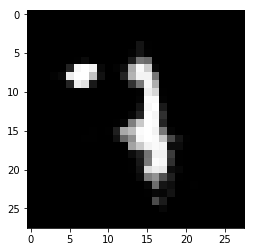

Number batches 468
91(0/468) D: 0.6758, G: 0.7806
91(1/468) D: 0.6638, G: 1.0314
91(2/468) D: 0.6156, G: 1.1235
91(3/468) D: 0.6328, G: 0.8826
91(4/468) D: 0.5782, G: 0.9689
91(5/468) D: 0.6343, G: 1.0123
91(6/468) D: 0.5873, G: 0.9179
91(7/468) D: 0.5677, G: 0.9351
91(8/468) D: 0.6625, G: 0.8754
91(9/468) D: 0.6551, G: 0.9166
91(10/468) D: 0.6495, G: 0.9246
91(11/468) D: 0.5665, G: 1.0219
91(12/468) D: 0.6036, G: 0.9101
91(13/468) D: 0.6112, G: 0.9637
91(14/468) D: 0.6230, G: 1.0088
91(15/468) D: 0.6369, G: 0.9847
91(16/468) D: 0.6140, G: 1.0098
91(17/468) D: 0.6323, G: 0.9594
91(18/468) D: 0.6263, G: 0.8233
91(19/468) D: 0.5920, G: 0.9096
91(20/468) D: 0.6076, G: 0.9931
91(21/468) D: 0.6182, G: 0.9347
91(22/468) D: 0.5817, G: 0.8503
91(23/468) D: 0.5932, G: 1.1764
91(24/468) D: 0.5901, G: 0.9283
91(25/468) D: 0.6499, G: 0.8151
91(26/468) D: 0.6313, G: 1.1196
91(27/468) D: 0.5952, G: 0.8664
91(28/468) D: 0.6504, G: 1.0619
91(29/468) D: 0.6497, G: 0.9072
91(30/468) D: 0.6051, G: 0.7746

91(252/468) D: 0.6543, G: 0.9919
91(253/468) D: 0.6539, G: 0.9968
91(254/468) D: 0.6404, G: 0.9782
91(255/468) D: 0.6548, G: 0.8134
91(256/468) D: 0.6296, G: 0.9217
91(257/468) D: 0.5534, G: 1.1100
91(258/468) D: 0.6427, G: 0.9072
91(259/468) D: 0.5875, G: 0.8904
91(260/468) D: 0.6120, G: 0.9472
91(261/468) D: 0.5770, G: 0.9059
91(262/468) D: 0.6550, G: 0.8794
91(263/468) D: 0.6482, G: 0.9211
91(264/468) D: 0.6566, G: 1.0038
91(265/468) D: 0.5930, G: 0.9432
91(266/468) D: 0.5933, G: 1.0085
91(267/468) D: 0.5582, G: 0.9337
91(268/468) D: 0.6244, G: 0.9040
91(269/468) D: 0.6119, G: 1.1345
91(270/468) D: 0.6424, G: 0.9019
91(271/468) D: 0.6621, G: 1.0386
91(272/468) D: 0.6392, G: 0.9810
91(273/468) D: 0.6557, G: 0.9286
91(274/468) D: 0.5858, G: 0.9759
91(275/468) D: 0.5524, G: 1.0420
91(276/468) D: 0.6114, G: 0.9732
91(277/468) D: 0.6010, G: 1.0087
91(278/468) D: 0.5950, G: 0.9120
91(279/468) D: 0.6205, G: 0.8059
91(280/468) D: 0.6143, G: 0.9787
91(281/468) D: 0.5717, G: 1.1384
91(282/468

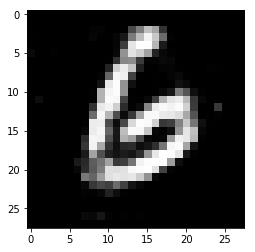

Number batches 468
92(0/468) D: 0.6469, G: 0.8816
92(1/468) D: 0.6631, G: 0.9449
92(2/468) D: 0.6689, G: 0.9657
92(3/468) D: 0.6142, G: 0.8939
92(4/468) D: 0.5987, G: 1.0154
92(5/468) D: 0.5960, G: 0.9235
92(6/468) D: 0.5546, G: 1.0729
92(7/468) D: 0.5737, G: 1.1426
92(8/468) D: 0.6151, G: 0.9415
92(9/468) D: 0.6761, G: 0.8923
92(10/468) D: 0.6497, G: 1.0004
92(11/468) D: 0.5904, G: 1.0306
92(12/468) D: 0.5893, G: 0.8807
92(13/468) D: 0.5937, G: 0.9218
92(14/468) D: 0.6402, G: 1.1650
92(15/468) D: 0.6837, G: 0.8762
92(16/468) D: 0.6639, G: 1.2080
92(17/468) D: 0.6067, G: 1.0033
92(18/468) D: 0.6038, G: 0.7845
92(19/468) D: 0.6575, G: 1.0656
92(20/468) D: 0.5601, G: 1.0623
92(21/468) D: 0.6057, G: 0.8249
92(22/468) D: 0.6622, G: 1.0176
92(23/468) D: 0.5448, G: 1.0515
92(24/468) D: 0.6239, G: 0.9303
92(25/468) D: 0.6126, G: 0.7919
92(26/468) D: 0.6112, G: 1.0345
92(27/468) D: 0.6497, G: 1.0904
92(28/468) D: 0.6158, G: 0.9077
92(29/468) D: 0.6352, G: 0.8922
92(30/468) D: 0.6042, G: 0.9763

92(253/468) D: 0.5690, G: 1.1296
92(254/468) D: 0.6185, G: 0.8217
92(255/468) D: 0.6172, G: 0.8323
92(256/468) D: 0.6262, G: 1.0181
92(257/468) D: 0.5962, G: 1.0927
92(258/468) D: 0.6102, G: 0.9211
92(259/468) D: 0.6080, G: 0.9384
92(260/468) D: 0.6509, G: 0.9546
92(261/468) D: 0.6421, G: 0.9726
92(262/468) D: 0.6522, G: 0.7898
92(263/468) D: 0.6469, G: 0.9745
92(264/468) D: 0.6056, G: 0.8878
92(265/468) D: 0.5823, G: 0.8844
92(266/468) D: 0.5709, G: 1.0496
92(267/468) D: 0.5784, G: 0.9838
92(268/468) D: 0.5773, G: 0.9528
92(269/468) D: 0.6119, G: 0.9973
92(270/468) D: 0.6142, G: 1.0296
92(271/468) D: 0.6434, G: 0.9231
92(272/468) D: 0.6428, G: 0.8250
92(273/468) D: 0.6020, G: 1.1120
92(274/468) D: 0.5819, G: 1.2081
92(275/468) D: 0.5597, G: 0.9426
92(276/468) D: 0.6375, G: 0.8168
92(277/468) D: 0.5642, G: 1.1150
92(278/468) D: 0.5799, G: 0.9768
92(279/468) D: 0.6365, G: 0.7592
92(280/468) D: 0.5814, G: 1.0899
92(281/468) D: 0.5682, G: 0.9268
92(282/468) D: 0.6287, G: 0.9762
92(283/468

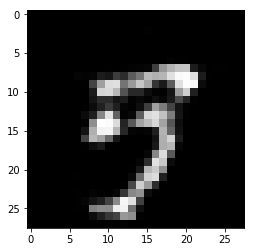

Number batches 468
93(0/468) D: 0.7041, G: 0.7783
93(1/468) D: 0.6900, G: 0.9658
93(2/468) D: 0.6462, G: 1.0098
93(3/468) D: 0.6466, G: 0.8486
93(4/468) D: 0.6179, G: 0.8793
93(5/468) D: 0.6038, G: 0.8833
93(6/468) D: 0.6281, G: 0.9740
93(7/468) D: 0.5545, G: 0.9965
93(8/468) D: 0.6035, G: 0.8438
93(9/468) D: 0.6479, G: 0.9787
93(10/468) D: 0.6244, G: 0.9684
93(11/468) D: 0.6246, G: 0.9674
93(12/468) D: 0.6117, G: 0.8088
93(13/468) D: 0.6572, G: 1.0007
93(14/468) D: 0.6535, G: 0.9624
93(15/468) D: 0.6099, G: 0.8080
93(16/468) D: 0.6415, G: 1.0369
93(17/468) D: 0.6329, G: 1.0491
93(18/468) D: 0.6346, G: 0.7888
93(19/468) D: 0.6429, G: 0.8161
93(20/468) D: 0.5700, G: 1.0092
93(21/468) D: 0.5860, G: 1.0219
93(22/468) D: 0.6184, G: 0.8296
93(23/468) D: 0.5802, G: 1.0143
93(24/468) D: 0.5895, G: 1.0651
93(25/468) D: 0.6378, G: 0.8326
93(26/468) D: 0.6418, G: 1.1912
93(27/468) D: 0.5721, G: 0.9636
93(28/468) D: 0.5856, G: 0.9886
93(29/468) D: 0.5557, G: 0.9497
93(30/468) D: 0.6371, G: 0.9995

93(253/468) D: 0.5693, G: 1.0539
93(254/468) D: 0.6157, G: 0.8746
93(255/468) D: 0.6730, G: 0.7777
93(256/468) D: 0.6667, G: 0.9411
93(257/468) D: 0.5713, G: 1.0777
93(258/468) D: 0.6491, G: 0.9187
93(259/468) D: 0.6066, G: 0.8423
93(260/468) D: 0.6619, G: 1.0993
93(261/468) D: 0.6082, G: 0.9363
93(262/468) D: 0.6417, G: 0.9159
93(263/468) D: 0.6564, G: 0.7868
93(264/468) D: 0.6384, G: 0.9401
93(265/468) D: 0.5764, G: 0.9898
93(266/468) D: 0.5792, G: 1.0464
93(267/468) D: 0.5277, G: 0.8863
93(268/468) D: 0.5907, G: 1.1255
93(269/468) D: 0.6064, G: 1.0191
93(270/468) D: 0.6114, G: 0.8290
93(271/468) D: 0.6609, G: 1.0739
93(272/468) D: 0.6051, G: 0.9133
93(273/468) D: 0.6064, G: 0.9180
93(274/468) D: 0.5281, G: 1.0424
93(275/468) D: 0.6066, G: 1.1217
93(276/468) D: 0.6078, G: 1.0035
93(277/468) D: 0.5727, G: 1.0037
93(278/468) D: 0.5506, G: 0.8821
93(279/468) D: 0.6315, G: 1.0348
93(280/468) D: 0.6566, G: 1.2089
93(281/468) D: 0.5998, G: 0.9417
93(282/468) D: 0.6059, G: 0.9804
93(283/468

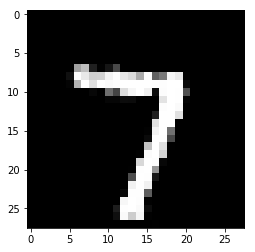

Number batches 468
94(0/468) D: 0.6520, G: 0.7447
94(1/468) D: 0.6174, G: 1.0125
94(2/468) D: 0.6460, G: 1.1936
94(3/468) D: 0.6184, G: 0.8291
94(4/468) D: 0.6009, G: 0.9982
94(5/468) D: 0.6121, G: 1.0304
94(6/468) D: 0.6054, G: 0.8956
94(7/468) D: 0.5470, G: 0.9040
94(8/468) D: 0.6080, G: 1.1179
94(9/468) D: 0.6683, G: 0.9886
94(10/468) D: 0.6405, G: 0.9962
94(11/468) D: 0.5942, G: 0.9022
94(12/468) D: 0.6204, G: 0.9830
94(13/468) D: 0.6438, G: 0.9766
94(14/468) D: 0.6457, G: 1.0484
94(15/468) D: 0.6518, G: 0.9505
94(16/468) D: 0.6188, G: 0.9929
94(17/468) D: 0.5980, G: 0.8847
94(18/468) D: 0.6055, G: 0.9227
94(19/468) D: 0.6117, G: 0.8547
94(20/468) D: 0.5963, G: 0.9792
94(21/468) D: 0.6269, G: 0.9925
94(22/468) D: 0.5904, G: 0.8047
94(23/468) D: 0.5747, G: 0.9032
94(24/468) D: 0.5844, G: 1.1442
94(25/468) D: 0.6594, G: 0.8338
94(26/468) D: 0.6314, G: 0.8682
94(27/468) D: 0.5886, G: 1.2003
94(28/468) D: 0.6147, G: 0.8991
94(29/468) D: 0.5967, G: 0.8269
94(30/468) D: 0.6474, G: 1.0425

94(253/468) D: 0.5808, G: 1.0986
94(254/468) D: 0.6081, G: 1.0947
94(255/468) D: 0.6641, G: 0.8397
94(256/468) D: 0.6396, G: 1.0156
94(257/468) D: 0.5554, G: 1.1562
94(258/468) D: 0.6326, G: 0.9130
94(259/468) D: 0.6152, G: 0.8655
94(260/468) D: 0.6223, G: 0.9102
94(261/468) D: 0.6150, G: 0.8332
94(262/468) D: 0.6246, G: 0.8527
94(263/468) D: 0.6187, G: 1.0611
94(264/468) D: 0.6347, G: 1.0566
94(265/468) D: 0.5982, G: 0.8555
94(266/468) D: 0.5493, G: 0.8555
94(267/468) D: 0.6184, G: 1.0865
94(268/468) D: 0.6115, G: 0.9539
94(269/468) D: 0.6258, G: 0.8731
94(270/468) D: 0.6159, G: 0.8893
94(271/468) D: 0.6179, G: 1.0128
94(272/468) D: 0.6178, G: 0.8494
94(273/468) D: 0.6182, G: 0.9552
94(274/468) D: 0.5554, G: 0.9440
94(275/468) D: 0.5543, G: 0.9676
94(276/468) D: 0.6001, G: 0.8816
94(277/468) D: 0.5932, G: 1.1614
94(278/468) D: 0.6078, G: 0.9947
94(279/468) D: 0.6381, G: 0.7139
94(280/468) D: 0.6429, G: 1.1497
94(281/468) D: 0.5590, G: 0.9786
94(282/468) D: 0.6433, G: 0.8927
94(283/468

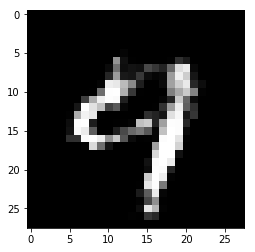

Number batches 468
95(0/468) D: 0.7101, G: 0.9671
95(1/468) D: 0.6303, G: 0.8780
95(2/468) D: 0.6460, G: 0.9332
95(3/468) D: 0.6103, G: 1.0057
95(4/468) D: 0.6270, G: 0.9378
95(5/468) D: 0.6307, G: 1.0541
95(6/468) D: 0.6148, G: 0.9482
95(7/468) D: 0.5975, G: 1.0428
95(8/468) D: 0.6354, G: 0.7912
95(9/468) D: 0.6867, G: 1.0640
95(10/468) D: 0.6576, G: 1.0361
95(11/468) D: 0.6005, G: 0.9021
95(12/468) D: 0.5875, G: 0.7850
95(13/468) D: 0.6166, G: 1.0795
95(14/468) D: 0.6351, G: 0.9929
95(15/468) D: 0.6601, G: 0.8776
95(16/468) D: 0.5921, G: 0.8122
95(17/468) D: 0.6091, G: 1.0823
95(18/468) D: 0.6180, G: 0.9890
95(19/468) D: 0.6375, G: 0.9332
95(20/468) D: 0.5717, G: 0.8909
95(21/468) D: 0.6106, G: 0.9220
95(22/468) D: 0.6216, G: 0.9628
95(23/468) D: 0.5621, G: 0.9890
95(24/468) D: 0.5666, G: 0.9815
95(25/468) D: 0.6525, G: 0.9451
95(26/468) D: 0.5964, G: 0.9218
95(27/468) D: 0.6005, G: 1.1829
95(28/468) D: 0.6076, G: 0.8573
95(29/468) D: 0.6361, G: 1.0051
95(30/468) D: 0.6153, G: 0.9788

95(253/468) D: 0.5880, G: 1.0950
95(254/468) D: 0.6116, G: 0.7854
95(255/468) D: 0.6571, G: 0.8419
95(256/468) D: 0.6128, G: 1.0390
95(257/468) D: 0.5620, G: 1.1180
95(258/468) D: 0.6489, G: 0.8779
95(259/468) D: 0.6258, G: 0.9600
95(260/468) D: 0.6312, G: 1.0037
95(261/468) D: 0.6165, G: 0.9104
95(262/468) D: 0.6657, G: 0.9184
95(263/468) D: 0.6623, G: 0.9655
95(264/468) D: 0.6375, G: 1.0013
95(265/468) D: 0.6184, G: 0.8066
95(266/468) D: 0.6099, G: 1.0113
95(267/468) D: 0.5740, G: 0.9943
95(268/468) D: 0.6087, G: 0.8953
95(269/468) D: 0.6098, G: 1.0840
95(270/468) D: 0.6360, G: 0.8260
95(271/468) D: 0.6286, G: 0.8911
95(272/468) D: 0.6028, G: 0.9925
95(273/468) D: 0.6360, G: 0.9213
95(274/468) D: 0.5976, G: 1.0470
95(275/468) D: 0.5667, G: 1.1120
95(276/468) D: 0.6186, G: 0.7677
95(277/468) D: 0.6001, G: 1.0112
95(278/468) D: 0.5584, G: 1.1313
95(279/468) D: 0.6491, G: 0.8369
95(280/468) D: 0.6363, G: 0.9475
95(281/468) D: 0.5624, G: 0.9855
95(282/468) D: 0.6596, G: 0.9736
95(283/468

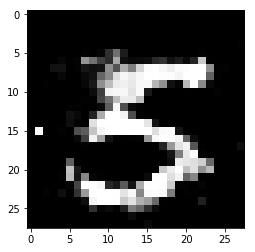

Number batches 468
96(0/468) D: 0.6631, G: 0.8261
96(1/468) D: 0.6557, G: 0.8516
96(2/468) D: 0.6227, G: 1.0260
96(3/468) D: 0.6343, G: 0.8176
96(4/468) D: 0.5888, G: 1.0033
96(5/468) D: 0.5658, G: 0.8955
96(6/468) D: 0.5990, G: 1.0366
96(7/468) D: 0.6076, G: 1.0580
96(8/468) D: 0.6457, G: 1.0136
96(9/468) D: 0.6833, G: 1.0403
96(10/468) D: 0.6891, G: 0.9860
96(11/468) D: 0.6445, G: 0.9819
96(12/468) D: 0.6274, G: 0.9537
96(13/468) D: 0.6204, G: 0.9444
96(14/468) D: 0.6241, G: 1.0710
96(15/468) D: 0.6170, G: 0.9601
96(16/468) D: 0.5945, G: 0.9026
96(17/468) D: 0.6278, G: 1.0960
96(18/468) D: 0.6421, G: 0.8537
96(19/468) D: 0.6324, G: 0.8747
96(20/468) D: 0.5807, G: 0.9636
96(21/468) D: 0.6424, G: 1.0004
96(22/468) D: 0.6323, G: 0.9535
96(23/468) D: 0.6317, G: 1.0547
96(24/468) D: 0.6011, G: 0.9313
96(25/468) D: 0.6214, G: 0.8098
96(26/468) D: 0.6350, G: 1.0039
96(27/468) D: 0.5800, G: 1.1122
96(28/468) D: 0.5701, G: 0.9926
96(29/468) D: 0.6302, G: 0.9034
96(30/468) D: 0.5583, G: 0.9208

96(253/468) D: 0.6320, G: 1.0948
96(254/468) D: 0.6078, G: 0.9959
96(255/468) D: 0.6791, G: 0.8170
96(256/468) D: 0.6115, G: 0.8969
96(257/468) D: 0.5916, G: 1.2871
96(258/468) D: 0.7019, G: 0.9621
96(259/468) D: 0.5664, G: 0.8241
96(260/468) D: 0.6370, G: 1.0319
96(261/468) D: 0.6020, G: 1.0439
96(262/468) D: 0.6516, G: 0.8486
96(263/468) D: 0.6518, G: 0.9504
96(264/468) D: 0.6461, G: 0.9152
96(265/468) D: 0.5865, G: 0.8999
96(266/468) D: 0.5947, G: 0.9160
96(267/468) D: 0.6099, G: 1.0553
96(268/468) D: 0.6155, G: 1.0646
96(269/468) D: 0.6320, G: 0.9892
96(270/468) D: 0.6364, G: 0.8177
96(271/468) D: 0.6359, G: 0.9594
96(272/468) D: 0.6379, G: 1.0876
96(273/468) D: 0.6079, G: 0.9031
96(274/468) D: 0.6000, G: 1.0122
96(275/468) D: 0.5825, G: 1.0098
96(276/468) D: 0.6303, G: 0.9554
96(277/468) D: 0.6167, G: 0.9618
96(278/468) D: 0.5927, G: 0.9573
96(279/468) D: 0.6375, G: 0.8395
96(280/468) D: 0.6027, G: 0.9698
96(281/468) D: 0.5786, G: 0.8683
96(282/468) D: 0.7332, G: 1.0948
96(283/468

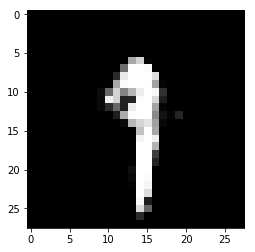

Number batches 468
97(0/468) D: 0.7084, G: 0.8002
97(1/468) D: 0.6663, G: 1.1059
97(2/468) D: 0.6283, G: 1.0074
97(3/468) D: 0.6241, G: 0.9197
97(4/468) D: 0.5876, G: 0.8631
97(5/468) D: 0.6130, G: 0.9001
97(6/468) D: 0.6292, G: 1.0636
97(7/468) D: 0.5673, G: 1.1503
97(8/468) D: 0.6634, G: 0.7895
97(9/468) D: 0.7006, G: 1.0127
97(10/468) D: 0.6953, G: 1.1585
97(11/468) D: 0.6294, G: 0.9136
97(12/468) D: 0.5655, G: 0.8868
97(13/468) D: 0.6230, G: 0.9575
97(14/468) D: 0.5976, G: 0.9513
97(15/468) D: 0.6465, G: 0.9850
97(16/468) D: 0.6353, G: 0.7891
97(17/468) D: 0.6298, G: 0.9202
97(18/468) D: 0.6600, G: 0.8009
97(19/468) D: 0.6229, G: 0.9381
97(20/468) D: 0.6256, G: 1.0313
97(21/468) D: 0.5912, G: 0.8843
97(22/468) D: 0.6391, G: 0.8562
97(23/468) D: 0.5709, G: 0.9287
97(24/468) D: 0.5681, G: 0.9405
97(25/468) D: 0.6170, G: 0.8424
97(26/468) D: 0.6189, G: 1.1293
97(27/468) D: 0.5978, G: 0.9013
97(28/468) D: 0.6175, G: 0.9912
97(29/468) D: 0.6194, G: 1.0279
97(30/468) D: 0.6226, G: 0.9095

97(252/468) D: 0.6215, G: 0.9775
97(253/468) D: 0.5995, G: 1.1521
97(254/468) D: 0.6310, G: 0.9687
97(255/468) D: 0.6607, G: 0.8515
97(256/468) D: 0.6497, G: 0.9987
97(257/468) D: 0.5540, G: 1.1143
97(258/468) D: 0.6201, G: 1.0182
97(259/468) D: 0.6253, G: 0.8596
97(260/468) D: 0.6478, G: 0.8484
97(261/468) D: 0.6424, G: 1.2223
97(262/468) D: 0.6605, G: 0.9130
97(263/468) D: 0.6117, G: 0.7891
97(264/468) D: 0.6652, G: 1.0992
97(265/468) D: 0.5798, G: 0.9632
97(266/468) D: 0.6140, G: 1.0641
97(267/468) D: 0.6105, G: 0.9651
97(268/468) D: 0.6535, G: 0.8864
97(269/468) D: 0.5829, G: 0.9166
97(270/468) D: 0.6332, G: 0.9935
97(271/468) D: 0.6549, G: 0.9226
97(272/468) D: 0.6354, G: 0.9704
97(273/468) D: 0.6691, G: 0.8603
97(274/468) D: 0.5741, G: 1.0578
97(275/468) D: 0.5796, G: 1.0805
97(276/468) D: 0.6328, G: 0.9293
97(277/468) D: 0.5718, G: 1.0011
97(278/468) D: 0.5868, G: 1.0135
97(279/468) D: 0.6279, G: 0.8218
97(280/468) D: 0.5790, G: 0.9782
97(281/468) D: 0.5323, G: 0.9883
97(282/468

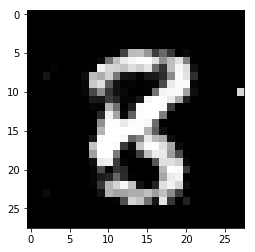

Number batches 468
98(0/468) D: 0.6529, G: 1.1054
98(1/468) D: 0.6107, G: 0.8050
98(2/468) D: 0.6292, G: 0.9541
98(3/468) D: 0.6060, G: 0.8456
98(4/468) D: 0.5860, G: 0.8186
98(5/468) D: 0.6284, G: 1.0440
98(6/468) D: 0.5687, G: 0.9626
98(7/468) D: 0.5791, G: 1.0108
98(8/468) D: 0.5746, G: 0.9495
98(9/468) D: 0.6285, G: 0.8813
98(10/468) D: 0.6475, G: 0.9373
98(11/468) D: 0.5965, G: 1.1926
98(12/468) D: 0.6013, G: 0.7956
98(13/468) D: 0.6308, G: 0.9630
98(14/468) D: 0.6279, G: 1.0812
98(15/468) D: 0.6608, G: 0.9412
98(16/468) D: 0.6395, G: 0.9799
98(17/468) D: 0.6419, G: 0.9584
98(18/468) D: 0.6157, G: 0.7840
98(19/468) D: 0.6389, G: 0.8719
98(20/468) D: 0.5939, G: 1.1161
98(21/468) D: 0.5772, G: 0.9184
98(22/468) D: 0.6215, G: 0.8954
98(23/468) D: 0.5961, G: 1.0222
98(24/468) D: 0.5694, G: 0.9785
98(25/468) D: 0.6283, G: 0.8673
98(26/468) D: 0.6143, G: 1.0602
98(27/468) D: 0.5773, G: 0.9416
98(28/468) D: 0.6127, G: 0.9851
98(29/468) D: 0.5954, G: 1.0129
98(30/468) D: 0.6326, G: 0.9482

98(252/468) D: 0.6459, G: 0.9122
98(253/468) D: 0.5823, G: 1.0528
98(254/468) D: 0.6552, G: 1.0193
98(255/468) D: 0.6507, G: 0.7826
98(256/468) D: 0.6221, G: 0.9388
98(257/468) D: 0.5343, G: 1.0879
98(258/468) D: 0.6084, G: 0.9394
98(259/468) D: 0.6115, G: 0.9651
98(260/468) D: 0.6342, G: 1.0279
98(261/468) D: 0.6347, G: 0.9023
98(262/468) D: 0.6255, G: 0.8418
98(263/468) D: 0.6482, G: 1.1104
98(264/468) D: 0.6563, G: 0.9054
98(265/468) D: 0.6063, G: 0.9209
98(266/468) D: 0.5515, G: 0.9886
98(267/468) D: 0.5671, G: 0.9432
98(268/468) D: 0.5878, G: 0.8973
98(269/468) D: 0.6226, G: 1.0381
98(270/468) D: 0.6096, G: 1.0505
98(271/468) D: 0.6078, G: 1.0613
98(272/468) D: 0.6401, G: 0.9335
98(273/468) D: 0.6120, G: 0.9412
98(274/468) D: 0.5724, G: 0.9734
98(275/468) D: 0.5735, G: 1.0013
98(276/468) D: 0.5976, G: 0.9659
98(277/468) D: 0.5744, G: 0.9822
98(278/468) D: 0.5855, G: 1.0307
98(279/468) D: 0.6184, G: 0.9086
98(280/468) D: 0.6125, G: 1.0149
98(281/468) D: 0.5640, G: 0.9418
98(282/468

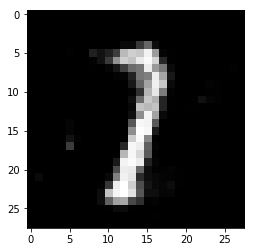

Number batches 468
99(0/468) D: 0.6800, G: 0.9396
99(1/468) D: 0.6141, G: 0.8680
99(2/468) D: 0.6282, G: 0.9129
99(3/468) D: 0.6445, G: 1.0085
99(4/468) D: 0.5781, G: 0.8600
99(5/468) D: 0.6420, G: 0.8389
99(6/468) D: 0.5622, G: 0.9449
99(7/468) D: 0.5593, G: 1.0267
99(8/468) D: 0.5851, G: 0.9868
99(9/468) D: 0.6943, G: 1.0262
99(10/468) D: 0.6361, G: 0.9584
99(11/468) D: 0.6093, G: 0.9618
99(12/468) D: 0.6345, G: 0.9105
99(13/468) D: 0.6486, G: 0.8466
99(14/468) D: 0.6055, G: 1.0435
99(15/468) D: 0.6455, G: 0.9767
99(16/468) D: 0.6255, G: 0.9180
99(17/468) D: 0.6279, G: 0.9963
99(18/468) D: 0.6060, G: 0.8788
99(19/468) D: 0.6216, G: 0.9824
99(20/468) D: 0.6153, G: 0.9350
99(21/468) D: 0.5853, G: 0.8158
99(22/468) D: 0.6287, G: 0.9457
99(23/468) D: 0.5596, G: 1.0535
99(24/468) D: 0.5762, G: 0.8918
99(25/468) D: 0.6358, G: 0.8825
99(26/468) D: 0.5900, G: 1.0916
99(27/468) D: 0.5967, G: 1.0323
99(28/468) D: 0.6273, G: 0.8727
99(29/468) D: 0.6281, G: 1.0393
99(30/468) D: 0.6111, G: 0.8592

99(252/468) D: 0.6323, G: 1.0054
99(253/468) D: 0.6375, G: 1.0263
99(254/468) D: 0.6110, G: 0.8667
99(255/468) D: 0.7042, G: 0.9011
99(256/468) D: 0.6035, G: 0.9403
99(257/468) D: 0.6095, G: 1.1405
99(258/468) D: 0.6446, G: 0.9714
99(259/468) D: 0.6029, G: 0.9061
99(260/468) D: 0.6097, G: 0.9688
99(261/468) D: 0.6049, G: 0.8770
99(262/468) D: 0.6134, G: 0.9052
99(263/468) D: 0.6205, G: 0.8566
99(264/468) D: 0.6393, G: 1.0317
99(265/468) D: 0.6534, G: 0.9423
99(266/468) D: 0.5985, G: 0.9008
99(267/468) D: 0.6197, G: 1.0301
99(268/468) D: 0.6008, G: 1.0246
99(269/468) D: 0.5959, G: 0.9335
99(270/468) D: 0.6659, G: 0.8772
99(271/468) D: 0.6364, G: 0.9455
99(272/468) D: 0.6340, G: 0.9130
99(273/468) D: 0.5876, G: 0.9734
99(274/468) D: 0.5556, G: 1.0751
99(275/468) D: 0.5327, G: 0.9019
99(276/468) D: 0.6169, G: 0.9545
99(277/468) D: 0.5752, G: 1.0608
99(278/468) D: 0.5533, G: 0.9880
99(279/468) D: 0.6318, G: 0.9080
99(280/468) D: 0.5969, G: 1.0498
99(281/468) D: 0.5511, G: 1.0301
99(282/468

In [12]:
# 6. Train the Model 
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        # A training iteration
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Contains the real and fake images.
        X = np.concatenate([generated_images, real_images])
        
        # Labels if the sample is real (1) or not real (0). 
        y = np.concatenate([np.zeros(generated_images.shape[0]), np.ones(real_images.shape[0])])

        # Train the discriminator using the generated images and the real images.
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))

        # Get the g_loss
        g_loss = gd.train_on_batch(noise, np.ones(noise.shape[0]))
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))
                